In [58]:
# Imports
import pandas as pd
import requests
import re
import time
import csv
import ast
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#API Key and URL
API_KEY = ""
PRODUCT_URL = "https://www.pricecharting.com/api/product"


In [4]:
#Import the kaggle 'historic' data set as a dataframe
df = pd.read_csv('historic.csv')

In [9]:
#Add a name column to the dataframe
df['name']= None

In [10]:
df.head()

,id,Ungraded,PSA7,PSA8,PSA9,BGS9.5,PSA10,volume,name
0,959087,"[[1609484400000, 186], [1612162800000, 176], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",None
1,2158357,"[[1619848800000, 99], [1622527200000, 99], [16...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 1], [1622527200000, 0], [1625...",None
2,959090,"[[1609484400000, 195], [1612162800000, 195], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",None
3,959073,"[[1609484400000, 0], [1612162800000, 128], [16...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 1], [1614582000000, 0], [1617...",None
4,959089,"[[1609484400000, 176], [1612162800000, 171], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",None


The code below uses the pricecharting.com api to grab the actual name of the card.  It has over 38,000 cards to get names for and this takes several hours to do.

In [22]:
for idx, row in df.iterrows():
    try:
        product_id = int(row['id'])  # Safely get product_id
        url = f"https://www.pricecharting.com/api/product?t={API_KEY}&id={product_id}"
        response = requests.get(url)
        time.sleep(0.5)  # Be kind to the API

        if response.status_code == 200:
            data = response.json()
            product_name = data.get('product-name', '')
            df.at[idx, 'name'] = product_name
            print(f" ID Added {product_id}: {product_name}")
        else:
            print(f"ID Not Found {product_id}: API Error {response.status_code}")
            df.at[idx, 'name'] = 'API Error'

    except Exception as e:
        print(f" ID Error {row['id']}: Exception {e}")
        df.at[idx, 'name'] = f'Error: {e}'

✔️ ID 959087: Ace Trainer #69
✔️ ID 2158357: Beldum #47
✔️ ID 959090: Energy Recycler #72
✔️ ID 959073: Cottonee #55
✔️ ID 959089: Eco Arm #71
✔️ ID 5963749: Ace Trainer [Regional Championships Staff] #69
✔️ ID 959028: Combee #9
✔️ ID 959072: Gardevoir #54
✔️ ID 959071: Kirlia #53
✔️ ID 959054: Golurk #35
✔️ ID 959060: Golurk #41
✔️ ID 959131: Entei [Reverse Holo] #15
✔️ ID 959047: M Ampharos EX #28
✔️ ID 959179: Faded Town [Reverse Holo] #73
✔️ ID 959053: Golett #34
✔️ ID 959044: Kyurem EX #25
✔️ ID 959093: Hex Maniac #75
✔️ ID 959046: Ampharos EX #27
✔️ ID 959021: Gloom #2
✔️ ID 959094: Level Ball #76
✔️ ID 959040: Gyarados #21
✔️ ID 959100: Dangerous Energy #82
✔️ ID 959050: Baltoy #31
✔️ ID 959130: Entei [Reverse Holo] #14
✔️ ID 959117: Energy Retrieval #99
✔️ ID 959045: Jolteon #26
✔️ ID 959088: Ampharos Spirit Link #70
✔️ ID 959035: Larvesta #16
✔️ ID 959092: Forest of Giant Plants #74
✔️ ID 959064: Inkay #45
✔️ ID 7084351: Hoopa EX [Jumbo] #36
✔️ ID 959056: Machamp EX #37
✔️ ID 

✔️ ID 2293907: Hypno [Reverse Holo] #16
✔️ ID 2294010: Darkness Cube 01 [Reverse Holo] #119
✔️ ID 5400915: Scizor [Box Topper] #7
✔️ ID 2293938: Flaaffy [Reverse Holo] #47
✔️ ID 887940: Hypno #H12
✔️ ID 887939: Houndoom #H11
✔️ ID 887935: Kingdra #148
✔️ ID 842546: Jynx #18
✔️ ID 842609: Kangaskhan #88
✔️ ID 842544: Hypno #16
✔️ ID 959148: Golurk [Reverse Holo] #35
✔️ ID 842545: Jumpluff #17
✔️ ID 2293971: Growlithe [Reverse Holo] #80
✔️ ID 2293978: Houndour [Reverse Holo] #87
✔️ ID 959032: Flareon #13
✔️ ID 2293911: Lanturn [Reverse Holo] #20
✔️ ID 2293910: Kingdra [Reverse Holo] #19
✔️ ID 842547: Kingdra #19
✔️ ID 959141: Jolteon [Reverse Holo] #26
✔️ ID 959165: Goomy [Reverse Holo] #58
✔️ ID 887941: Jumpluff #H13
✔️ ID 959147: Golett [Reverse Holo] #34
✔️ ID 959178: Energy Recycler [Reverse Holo] #72
✔️ ID 842610: Larvitar #89
✔️ ID 959055: Hoopa EX #36
✔️ ID 959163: Cottonee [Reverse Holo] #55
✔️ ID 2293908: Jumpluff [Reverse Holo] #17
✔️ ID 959125: Combee [Reverse Holo] #9
✔️ ID 9

✔️ ID 2294038: Warp Energy [Reverse Holo] #147
✔️ ID 925722: Arceus #AR4
✔️ ID 2294023: Psychic Cube 01 [Reverse Holo] #132
✔️ ID 2293932: Umbreon [Reverse Holo] #41
✔️ ID 842593: Wooper #66
✔️ ID 842657: Weakness Guard #141
✔️ ID 842592: Weepinbell #65
✔️ ID 925743: Aerodactyl [Reverse Holo] #13
✔️ ID 2293933: Victreebel [Reverse Holo] #42
✔️ ID 2294031: Water Cube 01 [Reverse Holo] #140
✔️ ID 925714: Arceus LV. X #95
✔️ ID 925672: Beedrill G #53
✔️ ID 2294028: Traveling Salesman [Reverse Holo] #137
✔️ ID 887956: Togetic #H27
✔️ ID 842663: Warp Energy #147
✔️ ID 925782: Bagon [Reverse Holo] #52
✔️ ID 842571: Zapdos #44
✔️ ID 925713: Arceus LV. X #94
✔️ ID 842628: Smeargle #109
✔️ ID 925727: Arceus #AR9
✔️ ID 887962: Zapdos #H32
✔️ ID 887957: Tyranitar #H28
✔️ ID 842568: Umbreon #41
✔️ ID 842652: Town Volunteers #136
✔️ ID 925763: Bronzong [Reverse Holo] #33
✔️ ID 842591: Voltorb #64
✔️ ID 842570: Vileplume #43
✔️ ID 925784: Bronzor [Reverse Holo] #54
✔️ ID 925632: Aerodactyl #13
✔️ ID

✔️ ID 3489756: Bergmite [Reverse Holo] #47
✔️ ID 3508417: Bea #TG25
✔️ ID 925670: Wormadam #51
✔️ ID 3489808: Bronzor [Reverse Holo] #111
✔️ ID 3489680: Adaman #181
✔️ ID 925809: Treecko [Reverse Holo] #79
✔️ ID 3489545: Bergmite #47
✔️ ID 3489809: Bronzong [Reverse Holo] #112
✔️ ID 3508403: Bronzong #TG11 [HOLO]
✔️ ID 3508394: Abomasnow #TG01
✔️ ID 3489637: Cyllene #138
✔️ ID 3489700: Choy #200
✔️ ID 3489638: Dark Patch #139
✔️ ID 925781: Wormadam [Reverse Holo] #51
✔️ ID 3489533: Barboach #35
✔️ ID 925778: Shelgon [Reverse Holo] #48
✔️ ID 3489699: Adaman #199
✔️ ID 925647: Rapidash #28
✔️ ID 3489615: Bisharp #116
✔️ ID 3489565: Azelf #67
✔️ ID 3489830: Choy [Reverse Holo] #137
✔️ ID 3489521: Cyndaquil #23
✔️ ID 3489701: Cyllene #201
✔️ ID 925760: Sceptile [Reverse Holo] #30
✔️ ID 4313985: Darkrai VSTAR [Jumbo] #99
✔️ ID 3489780: Cranidos [Reverse Holo] #76
✔️ ID 3489636: Choy #137
✔️ ID 3489509: Combee #11
✔️ ID 3489561: Drifloon #63
✔️ ID 925777: Rapidash [Reverse Holo] #47
✔️ ID 35

✔️ ID 3489764: Misdreavus [Reverse Holo] #58
✔️ ID 3489695: Kleavor VSTAR #196
✔️ ID 3508419: Milo #TG27
✔️ ID 3489556: Misdreavus #58
✔️ ID 3489559: Kirlia #61
✔️ ID 3489532: Mantine #34
✔️ ID 3489557: Mismagius #59
✔️ ID 3489508: Kricketune #10
✔️ ID 3489803: Magneton [Reverse Holo] #106
✔️ ID 3489531: Mamoswine #33
✔️ ID 3489667: Luxray V #168
✔️ ID 3489816: Noctowl [Reverse Holo] #121
✔️ ID 3489599: Hisuian Samurott #100
✔️ ID 3489564: Mesprit #66
✔️ ID 3489821: Miltank [Reverse Holo] #126
✔️ ID 3489787: Kleavor [Reverse Holo] #85
✔️ ID 3489507: Kricketot #9
✔️ ID 3489685: Irida #186
✔️ ID 3489538: Origin Forme Palkia VSTAR #40
✔️ ID 3489692: Hisuian Typhlosion VSTAR #193
✔️ ID 3489678: Oranguru V #179
✔️ ID 3489602: Nickit #103
✔️ ID 3489552: Hisuian Typhlosion VSTAR #54
✔️ ID 3489691: Origin Forme Palkia VSTAR #192
✔️ ID 3489605: Magneton #106
✔️ ID 3489614: Pawniard #115
✔️ ID 3489708: Origin Forme Palkia VSTAR #208
✔️ ID 3489625: Miltank #126
✔️ ID 3508479: Piers #TG28
✔️ ID 34

✔️ ID 959630: Golduck [Reverse Holo] #17
✔️ ID 959541: Drowzee #50
✔️ ID 959508: Golduck #17
✔️ ID 959698: Fighting Fury Belt [Reverse Holo] #99
✔️ ID 959591: Great Ball #100
✔️ ID 959699: Great Ball [Reverse Holo] #100
✔️ ID 959552: Doublade #61
✔️ ID 959692: Glameow [Reverse Holo] #93
✔️ ID 6392471: Greninja [3rd Place League] #40
✔️ ID 5705291: Greninja [1st Place League] #40
✔️ ID 959529: Froakie #38
✔️ ID 3489630: Rufflet #131
✔️ ID 6396932: Greninja [2nd Place League] #40
✔️ ID 959584: Glameow #93
✔️ ID 959571: Ferrothorn #80
✔️ ID 959505: Emboar EX #14
✔️ ID 959681: Ferroseed [Reverse Holo] #79
✔️ ID 959543: Espeon EX #52
✔️ ID 959651: Electivire [Reverse Holo] #43
✔️ ID 959624: Growlithe [Reverse Holo] #10
✔️ ID 7222063: Greninja [Cracked Ice Holo] #40
✔️ ID 959592: Gyarados Spirit Link #101
✔️ ID 959690: Dunsparce [Reverse Holo] #90
✔️ ID 959533: Electabuzz #42
✔️ ID 959551: Honedge #60
✔️ ID 959493: Bayleef #2
✔️ ID 959625: Arcanine [Reverse Holo] #11
✔️ ID 959532: Greninja B

✔️ ID 959299: Fraxure #110
✔️ ID 959361: Chespin [Reverse Holo] #8
✔️ ID 959476: Float Stone [Reverse Holo] #137
✔️ ID 959416: Elgyem [Reverse Holo] #73
✔️ ID 959450: Fraxure [Reverse Holo] #110
✔️ ID 959234: Froakie #46
✔️ ID 959323: Brigette #134
✔️ ID 959293: Florges BREAK #104
✔️ ID 959436: Bronzor [Reverse Holo] #95
✔️ ID 959291: Floette #102
✔️ ID 959213: Fennekin #25
✔️ ID 959456: Dodrio [Reverse Holo] #117
✔️ ID 959285: Bronzong #96
✔️ ID 959516: Staryu #25
✔️ ID 959235: Frogadier #47
✔️ ID 959474: Buddy-Buddy Rescue [Reverse Holo] #135
✔️ ID 959317: Chatot #128
✔️ ID 959444: Florges [Reverse Holo] #103
✔️ ID 959326: Float Stone #137
✔️ ID 959214: Braixen #26
✔️ ID 959304: Doduo #115
✔️ ID 959340: Burning Energy #151
✔️ ID 959290: Flabebe #101
✔️ ID 959247: Gastly #58
✔️ ID 959325: Fisherman #136
✔️ ID 959440: Granbull [Reverse Holo] #99
✔️ ID 959417: Beheeyem [Reverse Holo] #74
✔️ ID 959369: Gogoat [Reverse Holo] #17
✔️ ID 959273: Gallade [Holo] #84
✔️ ID 959478: Glalie Spirit

✔️ ID 959422: Swinub [Reverse Holo] #80
✔️ ID 959471: Noibat [Reverse Holo] #132
✔️ ID 959232: Vanillish #44
✔️ ID 959208: Typhlosion #20
✔️ ID 959435: Yveltal [Reverse Holo] #94
✔️ ID 959281: Zoroark BREAK #92
✔️ ID 959231: Vanillite #43
✔️ ID 959433: Zoroark [Reverse Holo] #91
✔️ ID 959283: Yveltal #94
✔️ ID 959410: Wobbuffet [Reverse Holo] #67
✔️ ID 959390: Simipour [Reverse Holo] #42
✔️ ID 959217: Staryu #29
✔️ ID 630456: Abra #43
✔️ ID 959244: Stunfisk #56
✔️ ID 959212: Simisear #24
✔️ ID 959414: Woobat [Reverse Holo] #71
✔️ ID 959447: Xerneas [Reverse Holo] #107
✔️ ID 959278: Zorua #89
✔️ ID 959280: Zoroark #91
✔️ ID 959279: Zorua #90
✔️ ID 959432: Zorua [Reverse Holo] #90
✔️ ID 959256: Wobbuffet #67
✔️ ID 959260: Woobat #71
✔️ ID 959339: Town Map #150
✔️ ID 959461: Ursaring [Reverse Holo] #122
✔️ ID 959419: Sandslash [Reverse Holo] #76
✔️ ID 959431: Zorua [Reverse Holo] #89
✔️ ID 715590: Alakazam [1st Edition] #1
✔️ ID 959269: Swinub #80
✔️ ID 959489: Town Map [Reverse Holo] #15

✔️ ID 715688: Grass Energy [1st Edition] #99
✔️ ID 630469: Onix #56
✔️ ID 630442: Haunter #29
✔️ ID 630464: Koffing #51
✔️ ID 7517687: Ninetales [1999-2000] #12
✔️ ID 4602501: Lass [Shadowless] #75
✔️ ID 630512: Grass Energy #99
✔️ ID 715600: Nidoking [1st Edition] #11
✔️ ID 715748: Pidgey [Shadowless] #57
✔️ ID 2386882: Ninetales [Black Flame] #12
✔️ ID 715647: Pikachu [1st Edition] #58
✔️ ID 630444: Jynx #31
✔️ ID 2021480: Pikachu [E3 Red Cheeks] #58
✔️ ID 715701: Mewtwo [Shadowless] #10
✔️ ID 715601: Ninetales [1st Edition] #12
✔️ ID 630445: Kadabra #32
✔️ ID 1089418: Pikachu [1st Edition Red Cheeks] #58
✔️ ID 7736523: Pokedex [1999-2000] #87
✔️ ID 2386884: Pidgey [Trainer Deck B] #57
✔️ ID 630448: Magikarp #35
✔️ ID 630489: Pokemon Breeder #76
✔️ ID 630471: Pikachu #58
✔️ ID 715728: Nidorino [Shadowless] #37
✔️ ID 715749: Pikachu [Shadowless] #58
✔️ ID 715676: Pokedex [1st Edition] #87
✔️ ID 6663726: Pokemon Breeder [Shadowless] #76
✔️ ID 715724: Kakuna [Shadowless] #33
✔️ ID 38394

✔️ ID 641815: Nidoqueen #12
✔️ ID 7308960: Venusaur [1999-2000] #15
✔️ ID 641814: Nidoking #11
✔️ ID 630491: Scoop Up #78
✔️ ID 641848: Jynx #45
✔️ ID 641881: Machop #78
✔️ ID 641855: Marowak #52
✔️ ID 641838: Charmeleon #35
✔️ ID 641813: Mewtwo #10
✔️ ID 641829: Kangaskhan #26
✔️ ID 641908: Pokemon Trader #106
✔️ ID 641887: Paras #85
✔️ ID 641837: Butterfree #34
✔️ ID 641886: Onix #84
✔️ ID 641915: PlusPower #113
✔️ ID 641923: Poke Ball #121
✔️ ID 630515: Water Energy #102
✔️ ID 715758: Voltorb [Shadowless] #67
✔️ ID 641931: Psychic Energy #129
✔️ ID 641819: Raichu #16
✔️ ID 641816: Ninetales #13
✔️ ID 630419: Gyarados #6
✔️ ID 641888: Pidgey #86
✔️ ID 641857: Nidorino #54
✔️ ID 715733: Wartortle [Shadowless] #42
✔️ ID 641893: Sandshrew #91
✔️ ID 641861: Raticate #58
✔️ ID 641891: Rattata #89
✔️ ID 715759: Vulpix [Shadowless] #68
✔️ ID 641844: Fearow #41
✔️ ID 641909: Scoop Up #107
✔️ ID 641863: Seaking #60
✔️ ID 641885: Nidoran #82
✔️ ID 641854: Magmar #51
✔️ ID 641864: Seel #61
✔️ I

✔️ ID 1673276: Houndoom #96
✔️ ID 1673187: Kricketune V #6
✔️ ID 1673359: Houndoom #179
✔️ ID 1673257: Mienshao #77
✔️ ID 1673280: Mawile #100
✔️ ID 1725055: Mienfoo [Reverse Holo] #76
✔️ ID 1673223: Jellicent #42
✔️ ID 1673278: Morpeko #98
✔️ ID 1673243: Necrozma V #63
✔️ ID 1673273: Murkrow #93
✔️ ID 1673214: Kingdra #33
✔️ ID 1725021: Octillery [Reverse Holo] #37
✔️ ID 1673248: Onix #68
✔️ ID 5334237: Octillery [Prize Pack 1] #37
✔️ ID 1725099: Phoebe [Reverse Holo] #130
✔️ ID 1673358: Octillery #178
✔️ ID 1725045: Mankey [Reverse Holo] #66
✔️ ID 1725046: Primeape [Reverse Holo] #67
✔️ ID 1725008: Pignite [Reverse Holo] #24
✔️ ID 1725042: Meowstic [Reverse Holo] #61
✔️ ID 1673329: Necrozma V #149
✔️ ID 1725077: Honedge [Reverse Holo] #105
✔️ ID 1673245: Orbeetle #65
✔️ ID 1673256: Mienfoo #76
✔️ ID 1673296: Purugly #116
✔️ ID 1725075: Pawniard [Reverse Holo] #103
✔️ ID 1673283: Pawniard #103
✔️ ID 1725047: Onix [Reverse Holo] #68
✔️ ID 1673310: Phoebe #130
✔️ ID 1673341: Phoebe #161

✔️ ID 2978641: Dark Venusaur #7
✔️ ID 806456: Gurdurr [Reverse Holo] #60
✔️ ID 1725081: Spearow [Reverse Holo] #111
✔️ ID 806389: Herdier #82
✔️ ID 806383: Klink #74
✔️ ID 806385: Klinklang #76
✔️ ID 806484: Bouffalant [Reverse Holo] #90
✔️ ID 886707: Darumaka [Reverse Holo] #24
✔️ ID 2978632: Electabuzz #1
✔️ ID 806453: Duosion [Reverse Holo] #56
✔️ ID 806373: Krokorok #64
✔️ ID 806461: Krookodile [Reverse Holo] #65
✔️ ID 7047618: Fighting Energy [Holo] #110
✔️ ID 886693: Joltik #45
✔️ ID 1725106: Tower of Darkness [Reverse Holo] #137
✔️ ID 806476: Herdier [Reverse Holo] #82
✔️ ID 806442: Joltik [Reverse Holo] #44
✔️ ID 886711: Alomomola [Reverse Holo] #39
✔️ ID 806419: Lilligant [Reverse Holo] #10
✔️ ID 886717: Lillipup [Reverse Holo] #81
✔️ ID 806388: Lillipup #80
✔️ ID 806463: Liepard [Reverse Holo] #67
✔️ ID 806382: Mandibuzz #73
✔️ ID 806358: Munna #48
✔️ ID 806469: Mandibuzz [Reverse Holo] #73
✔️ ID 806333: Maractus #11
✔️ ID 2677930: Lightning Energy #108
✔️ ID 886703: Maractus

✔️ ID 956555: Dewott #40
✔️ ID 956614: Flygon #99
✔️ ID 956786: Aspertia City Gym [Reverse Holo] #127
✔️ ID 956726: Duskull [Reverse Holo] #61
✔️ ID 956541: Emboar #26
✔️ ID 956775: Buneary [Reverse Holo] #116
✔️ ID 956596: Gliscor #81
✔️ ID 956667: Altaria #152
✔️ ID 956567: Electrode #52
✔️ ID 956708: Ducklett [Reverse Holo] #42
✔️ ID 956559: Frillish #44
✔️ ID 956569: Electivire #54
✔️ ID 956658: Cresselia EX #143
✔️ ID 956535: Charizard #20
✔️ ID 956742: Gligar [Reverse Holo] #80
✔️ ID 956773: Delcatty [Reverse Holo] #114
✔️ ID 956767: Ditto [Reverse Holo] #108
✔️ ID 956631: Buneary #116
✔️ ID 956622: Farfetch'd #107
✔️ ID 956787: Energy Search [Reverse Holo] #128
✔️ ID 956687: Charizard [Reverse Holo] #20
✔️ ID 956599: Dwebble #84
✔️ ID 956728: Dusknoir [Reverse Holo] #63
✔️ ID 956643: Energy Search #128
✔️ ID 956557: Ducklett #42
✔️ ID 956704: Delibird [Reverse Holo] #38
✔️ ID 956534: Charmeleon #19
✔️ ID 956760: Flygon [Reverse Holo] #99
✔️ ID 956595: Gligar #80
✔️ ID 956785: Au

✔️ ID 3188397: Arceus VSTAR #184
✔️ ID 3188346: Arceus V #122
✔️ ID 6714695: Arceus VSTAR [League Promo] #123
✔️ ID 956778: Watchog [Reverse Holo] #119
✔️ ID 5114585: Boss's Orders [Regional Championships] #132
✔️ ID 3219458: Axew [Reverse Holo] #110
✔️ ID 956554: Oshawott #39
✔️ ID 3188390: Arceus V #166
✔️ ID 956769: Togepi [Reverse Holo] #110
✔️ ID 5114586: Boss's Orders [Regional Championships Staff] #132
✔️ ID 3219468: Bibarel [Reverse Holo] #121
✔️ ID 956618: White Kyurem EX #103
✔️ ID 3188391: Barry #167
✔️ ID 3188401: Boltund V #TG13
✔️ ID 4136129: Bibarel #121
✔️ ID 3188400: Ariados #TG09
✔️ ID 3188263: Buizel #38
✔️ ID 3188347: Arceus VSTAR #123
✔️ ID 4134548: Boss's Orders #132
✔️ ID 3219463: Castform [Reverse Holo] #116
✔️ ID 956607: Vullaby #92
✔️ ID 3219476: Boss's Orders [Reverse Holo] #132
✔️ ID 3188354: Barry #130
✔️ ID 3219404: Beartic [Reverse Holo] #43
✔️ ID 4135426: Charizard VSTAR [Jumbo] #18
✔️ ID 3219380: Burmy [Reverse Holo] #9
✔️ ID 956634: Watchog #119
✔️ ID 

✔️ ID 6658423: Manaphy [Prize Pack] #41
✔️ ID 3188328: Klinklang #104
✔️ ID 3219427: Nosepass [Reverse Holo] #73
✔️ ID 3188280: Mewtwo #56
✔️ ID 3219489: Magma Basin [Reverse Holo] #144
✔️ ID 3216327: Mustard #TG28
✔️ ID 3219390: Monferno [Reverse Holo] #25
✔️ ID 3188370: Pot Helmet #146
✔️ ID 3228699: Mimikyu VMAX #TG17
✔️ ID 3219447: Grimmsnarl [Reverse Holo] #94
✔️ ID 3216317: Houndoom #TG10
✔️ ID 6135594: Moltres [Cosmos Holo] #21
✔️ ID 3219450: Heatran [Reverse Holo] #100
✔️ ID 3188348: Minccino #124
✔️ ID 3219424: Milcery [Reverse Holo] #70
✔️ ID 3219398: Prinplup [Reverse Holo] #36
✔️ ID 3216308: Magma Basin #185
✔️ ID 3219449: Probopass [Reverse Holo] #99
✔️ ID 3219402: Manaphy [Reverse Holo] #41
✔️ ID 3188327: Klang #103
✔️ ID 3219433: Lucario [Reverse Holo] #79
✔️ ID 3188319: Morpeko V #95
✔️ ID 3188261: Prinplup #36
✔️ ID 3188381: Pikachu V #157
✔️ ID 3188236: Mothim #11
✔️ ID 3219415: Mewtwo [Reverse Holo] #56
✔️ ID 3188292: Mimikyu V #68
✔️ ID 3219490: Marnie's Pride [Reve

✔️ ID 3216312: Vaporeon #TG02
✔️ ID 960964: Heracross [Reverse Holo] #11
✔️ ID 960794: Ledian #10
✔️ ID 961035: Kirlia [Reverse Holo] #92
✔️ ID 960793: Ledyba #9
✔️ ID 960982: Gyarados [Reverse Holo] #33
✔️ ID 960813: Horsea #29
✔️ ID 960795: Heracross #11
✔️ ID 960873: Inkay #89
✔️ ID 960829: Eelektrik #45
✔️ ID 960990: Electabuzz [Reverse Holo] #42
✔️ ID 960815: Kingdra #31
✔️ ID 2425200: Kirlia #92a
✔️ ID 4020808: Lycanroc [Cracked Ice] #76
✔️ ID 960991: Electivire [Reverse Holo] #43
✔️ ID 961057: Kiawe [Reverse Holo] #116
✔️ ID 961014: Lunatone [Reverse Holo] #68
✔️ ID 960943: Gardevoir GX #159
✔️ ID 960934: Charizard GX #150
✔️ ID 960915: Ho-Oh GX #131
✔️ ID 960818: Gyarados #33
✔️ ID 961022: Lycanroc [Reverse Holo] #76
✔️ ID 960900: Kiawe #116
✔️ ID 960920: Lycanroc GX #136
✔️ ID 960826: Electabuzz #42
✔️ ID 960836: Dusclops #52
✔️ ID 960898: Escape Rope #114
✔️ ID 961033: Malamar [Reverse Holo] #90
✔️ ID 960981: Magikarp [Reverse Holo] #32
✔️ ID 961020: Crabominable [Reverse Hol

✔️ ID 926350: Dialga #SL2
✔️ ID 926291: Bayleef #40
✔️ ID 926381: Cleffa [Reverse Holo] #24
✔️ ID 6377622: Fighting Energy [Play] #93
✔️ ID 960833: Wobbuffet #49
✔️ ID 926363: Groudon [Reverse Holo] #6
✔️ ID 926362: Forretress [Reverse Holo] #5
✔️ ID 926399: Donphan [Reverse Holo] #42
✔️ ID 926364: Gyarados [Reverse Holo] #7
✔️ ID 926256: Forretress #5
✔️ ID 926276: Feraligatr #25
✔️ ID 960800: Wimpod #16
✔️ ID 926339: Grass Energy #88
✔️ ID 926258: Gyarados #7
✔️ ID 926353: Ho-Oh #SL5
✔️ ID 926415: Hitmonlee [Reverse Holo] #58
✔️ ID 926414: Hitmonchan [Reverse Holo] #57
✔️ ID 926436: Interviewer's Questions [Reverse Holo] #79
✔️ ID 926275: Cleffa #24
✔️ ID 4677966: Fire Energy [Play] #89
✔️ ID 926261: Houndoom #10
✔️ ID 926309: Hitmonlee #58
✔️ ID 926367: Houndoom [Reverse Holo] #10
✔️ ID 926368: Jirachi [Reverse Holo] #11
✔️ ID 926369: Kyogre [Reverse Holo] #12
✔️ ID 926330: Interviewer's Questions #79
✔️ ID 926264: Leafeon #13
✔️ ID 926263: Kyogre #12
✔️ ID 926311: Koffing #60
✔️ ID

✔️ ID 962162: Donphan [Reverse Holo] #73
✔️ ID 962035: Delcatty #121
✔️ ID 962014: Celesteela #100
✔️ ID 962158: Deoxys [Reverse Holo] #69
✔️ ID 962117: Dhelmise [Reverse Holo] #22
✔️ ID 962157: Deoxys [Reverse Holo] #68
✔️ ID 2618153: Surfing Pikachu V #8
✔️ ID 2618171: Venusaur #15
✔️ ID 962024: Dunsparce #110
✔️ ID 2618154: Surfing Pikachu VMAX #9
✔️ ID 962191: Dunsparce [Reverse Holo] #110
✔️ ID 962208: Copycat [Reverse Holo] #127
✔️ ID 926346: Metal Energy #95
✔️ ID 961965: Electrike #51
✔️ ID 962168: Claydol [Reverse Holo] #79
✔️ ID 961981: Deoxys #67
✔️ ID 961942: Blaziken GX #28
✔️ ID 962042: Energy Recycle System #128
✔️ ID 962209: Energy Recycle System [Reverse Holo] #128
✔️ ID 926395: Weezing [Reverse Holo] #38
✔️ ID 962076: Copycat #163
✔️ ID 962114: Cacnea [Reverse Holo] #19
✔️ ID 962207: Bill's Maintenance [Reverse Holo] #126
✔️ ID 962045: Friend Ball #131
✔️ ID 926287: Tyrogue #36
✔️ ID 962033: Exploud #119
✔️ ID 962211: Fisherman [Reverse Holo] #130
✔️ ID 961987: Donpha

✔️ ID 961972: Swalot #58
✔️ ID 962060: Switch #147
✔️ ID 962229: Tate & Liza [Reverse Holo] #148
✔️ ID 962180: Metang [Reverse Holo] #94
✔️ ID 961935: Tropius #21
✔️ ID 962147: Swalot [Reverse Holo] #58
✔️ ID 962089: Stakataka GX #176
✔️ ID 961940: Torchic #26
✔️ ID 962104: Treecko [Reverse Holo] #8
✔️ ID 962079: Tate & Liza #166
✔️ ID 961939: Torchic #25
✔️ ID 962063: Underground Expedition #150
✔️ ID 961922: Treecko #8
✔️ ID 962120: Torchic [Reverse Holo] #25
✔️ ID 961983: Deoxys #69
✔️ ID 961949: Swampert #35
✔️ ID 5427868: Treecko [Stamped] #8
✔️ ID 961953: Wailmer #39
✔️ ID 962082: Shiftry GX #169
✔️ ID 962123: Torkoal [Reverse Holo] #29
✔️ ID 962140: Voltorb [Reverse Holo] #47
✔️ ID 962231: Underground Expedition [Reverse Holo] #150
✔️ ID 962121: Torchic [Reverse Holo] #26
✔️ ID 962110: Surskit [Reverse Holo] #15
✔️ ID 962153: Shuppet [Reverse Holo] #63
✔️ ID 961954: Wailord #40
✔️ ID 962003: Steelix #89
✔️ ID 962194: Vigoroth [Reverse Holo] #114
✔️ ID 961921: Treecko #7
✔️ ID 96

✔️ ID 2253938: Crushing Gloves #133
✔️ ID 2253826: Blaziken V #20
✔️ ID 2254005: Blaziken VMAX #201
✔️ ID 2254091: Cresselia [Reverse Holo] #64
✔️ ID 2253890: Crabominable #85
✔️ ID 2253838: Delibird #32
✔️ ID 2253834: Cinderace #28
✔️ ID 4653751: Cobalion #114
✔️ ID 2254108: Crabominable [Reverse Holo] #85
✔️ ID 2254112: Clobbopus [Reverse Holo] #91
✔️ ID 2253919: Cobalion [Holo] #114
✔️ ID 2254045: Deerling [Reverse Holo] #11
✔️ ID 2253987: Blissey V #183
✔️ ID 2254063: Delibird [Reverse Holo] #32
✔️ ID 2253881: Diglett #76
✔️ ID 2253828: Castform Sunny Form #22
✔️ ID 4441263: Delibird [Snowflake Stamp] #32
✔️ ID 2254129: Cobalion [Reverse Holo] #114
✔️ ID 2253848: Drizzile #42
✔️ ID 2254073: Drizzile [Reverse Holo] #42
✔️ ID 2253939: Doctor #134
✔️ ID 2254102: Dugtrio [Reverse Holo] #77
✔️ ID 2253895: Clobbopus #91
✔️ ID 2254058: Cinderace [Reverse Holo] #28
✔️ ID 2254145: Crushing Gloves [Reverse Holo] #133
✔️ ID 2254101: Diglett [Reverse Holo] #76
✔️ ID 2254027: Bronzong #223
✔️ I

✔️ ID 2254120: Seviper [Reverse Holo] #102
✔️ ID 2253907: Seviper #102
✔️ ID 2254159: Old Cemetery [Reverse Holo] #147
✔️ ID 2254084: Haunter [Reverse Holo] #56
✔️ ID 2254036: Psychic Energy #232
✔️ ID 2254109: Rockruff [Reverse Holo] #86
✔️ ID 2254012: Metagross VMAX #208
✔️ ID 2253975: Shadow Rider Calyrex V #171
✔️ ID 2253950: Melony #146
✔️ ID 2253912: Scolipede #107
✔️ ID 2253891: Rockruff #86
✔️ ID 2254166: Single Strike Scroll of Piercing [Reverse Holo] #154
✔️ ID 2253880: Shadow Rider Calyrex VMAX #75
✔️ ID 2254011: Slowking VMAX #207
✔️ ID 2253979: Sandaconda V #175
✔️ ID 2254139: Skwovet [Reverse Holo] #127
✔️ ID 2254160: Path to the Peak [Reverse Holo] #148
✔️ ID 2254131: Porygon [Reverse Holo] #116
✔️ ID 2254089: Shuppet [Reverse Holo] #62
✔️ ID 2253841: Snorunt #35
✔️ ID 2253879: Shadow Rider Calyrex V #74
✔️ ID 2254007: Shadow Rider Calyrex VMAX #204
✔️ ID 2254164: Rugged Helmet [Reverse Holo] #152
✔️ ID 2254061: Sneasel [Reverse Holo] #30
✔️ ID 2254066: Snorunt [Reverse 

✔️ ID 964452: Blastoise & Piplup GX #214
✔️ ID 964659: Eevee [Reverse Holo] #166
✔️ ID 964322: Dusclops #84
✔️ ID 964271: Emboar #33
✔️ ID 964389: Floette #151
✔️ ID 1453697: Flabebe [Reverse Holo] #149
✔️ ID 964531: Flareon [Reverse Holo] #25
✔️ ID 964614: Excadrill [Reverse Holo] #115
✔️ ID 964390: Florges #152
✔️ ID 2182986: Flabebe #150
✔️ ID 964621: Crabominable [Reverse Holo] #122
✔️ ID 964534: Entei [Reverse Holo] #28
✔️ ID 964649: Florges [Reverse Holo] #152
✔️ ID 964509: Draw Energy #271
✔️ ID 964266: Entei #28
✔️ ID 964309: Chinchou #71
✔️ ID 964263: Flareon #25
✔️ ID 964583: Gallade [Reverse Holo] #82
✔️ ID 964484: Excadrill #246
✔️ ID 964590: Golett [Reverse Holo] #89
✔️ ID 964426: Clay #188
✔️ ID 964342: Blacephalon #104
✔️ ID 964348: Flygon GX #110
✔️ ID 3177480: Flabebe [Reverse Holo] #150
✔️ ID 964279: Golduck #41
✔️ ID 964249: Cradily #11
✔️ ID 964644: Cottonee [Reverse Holo] #147
✔️ ID 964482: Gallade #244
✔️ ID 964591: Golurk [Reverse Holo] #90
✔️ ID 964385: Cottonee

✔️ ID 964285: Snorunt #47
✔️ ID 964497: Reshiram & Zekrom GX #259
✔️ ID 964640: Solgaleo [Reverse Holo] #142
✔️ ID 964494: Flygon GX #256
✔️ ID 964329: Skrelp #91
✔️ ID 6810233: Stoutland [Holo] #176
✔️ ID 964603: Marshadow [Reverse Holo] #103
✔️ ID 5704540: Solgaleo [Stamped] #142
✔️ ID 964288: Spheal #50
✔️ ID 964254: Sawsbuck #16
✔️ ID 964246: Sunflora #8
✔️ ID 964553: Spheal [Reverse Holo] #50
✔️ ID 964554: Sealeo [Reverse Holo] #51
✔️ ID 964473: Roller Skater #235
✔️ ID 964500: Silvally GX #262
✔️ ID 964532: Slugma [Reverse Holo] #26
✔️ ID 964669: Stoutland [Reverse Holo] #176
✔️ ID 964552: Spheal [Reverse Holo] #49
✔️ ID 964492: Solgaleo & Lunala GX #254
✔️ ID 964441: Roller Skater #203
✔️ ID 964298: Swanna #60
✔️ ID 964377: Steelix #139
✔️ ID 964380: Solgaleo #142
✔️ ID 964245: Sunkern #7
✔️ ID 964505: Lillie's Poke Doll #267
✔️ ID 964275: Pyroar #37
✔️ ID 964439: Professor Oak's Setup #201
✔️ ID 964515: Sunflora [Reverse Holo] #8
✔️ ID 964313: Solgaleo & Lunala GX #75
✔️ ID 964

✔️ ID 961214: Aggron #67
✔️ ID 961261: Alolan Golem GX #113
✔️ ID 961305: Haunter [Reverse Holo] #37
✔️ ID 961251: Guzzlord GX #105
✔️ ID 961255: Gladion #109
✔️ ID 961165: Gyarados GX #18
✔️ ID 961260: Guzzlord GX #116
✔️ ID 961357: Gladion [Reverse Holo] #95
✔️ ID 961328: Hydreigon [Reverse Holo] #62
✔️ ID 961205: Houndour #58
✔️ ID 2390425: Guzzlord GX #63a
✔️ ID 961247: Gyarados GX #101
✔️ ID 961325: Houndoom [Reverse Holo] #59
✔️ ID 6870164: Gengar #38
✔️ ID 961310: Grumpig [Reverse Holo] #42
✔️ ID 961334: Escavalier [Reverse Holo] #69
✔️ ID 964273: Volcarona GX #35
✔️ ID 961259: Gyarados GX #112
✔️ ID 961221: Jangmo-o #75
✔️ ID 961331: Lairon [Reverse Holo] #66
✔️ ID 961263: Kartana GX #117
✔️ ID 961303: Emolga [Reverse Holo] #35
✔️ ID 961306: Gengar [Reverse Holo] #38
✔️ ID 961210: Guzzlord GX #63
✔️ ID 961206: Houndoom #59
✔️ ID 961161: Camerupt #14
✔️ ID 961226: Altaria #80
✔️ ID 961340: Kommo-o [Reverse Holo] #77
✔️ ID 961217: Jigglypuff #71
✔️ ID 961183: Gastly #36
✔️ ID 961

✔️ ID 4637004: Eevee V #108
✔️ ID 4637173: Girafarig [Reverse Holo] #61
✔️ ID 4637170: Exeggcute [Reverse Holo] #57
✔️ ID 4637227: Friends in Sinnoh [Reverse Holo] #131
✔️ ID 4636964: Graveler #68
✔️ ID 4637228: Great Ball [Reverse Holo] #132
✔️ ID 4636917: Entei #21
✔️ ID 4637101: Deoxys VMAX #GG45
✔️ ID 4637195: Galarian Perrserker [Reverse Holo] #85
✔️ ID 4637105: Drapion V #GG49
✔️ ID 4637014: Gumshoos #118
✔️ ID 4636999: Duraludon V #103
✔️ ID 4637244: Glaceon V #38
✔️ ID 961337: Xerneas [Reverse Holo] #73
✔️ ID 4637126: Arceus VSTAR #GG70
✔️ ID 4636981: Galarian Perrserker #85
✔️ ID 6869864: Friends In Hisui [Top 8] #130
✔️ ID 4637139: Grubbin [Reverse Holo] #15
✔️ ID 4636899: Gloom #2
✔️ ID 4637064: Electivire #GG08
✔️ ID 4637028: Great Ball #132
✔️ ID 4637049: Fire Energy [Holo] #153
✔️ ID 4637057: Hisuian Voltorb #GG01
✔️ ID 4637107: Hisuian Samurott V #GG51
✔️ ID 4636907: Cherubi #11
✔️ ID 4637042: Elesa's Sparkle #147
✔️ ID 4636944: Helioptile #49
✔️ ID 4637084: Duskull #GG2

✔️ ID 4637146: Volcanion [Reverse Holo] #26
✔️ ID 4636992: Zacian VSTAR #96
✔️ ID 4636928: Wailord #32
✔️ ID 4637013: Yungoos #117
✔️ ID 4637145: Volcarona [Reverse Holo] #25
✔️ ID 4637205: Zamazenta [Reverse Holo] #97
✔️ ID 4637242: Ultra Ball [Reverse Holo] #146
✔️ ID 4637104: Zacian V #GG48
✔️ ID 4636993: Zamazenta #97
✔️ ID 4637168: Zeraora [Reverse Holo] #52
✔️ ID 4637017: Wooloo #121
✔️ ID 4637181: Riolu [Reverse Holo] #71
✔️ ID 4636998: Rayquaza VMAX #102
✔️ ID 4637002: Tauros #106
✔️ ID 4637134: Yanma [Reverse Holo] #8
✔️ ID 4636916: Radiant Charizard #20
✔️ ID 889431: Aron [Reverse Holo] #44
✔️ ID 4636949: Zeraora VMAX #54
✔️ ID 4637214: Yungoos [Reverse Holo] #117
✔️ ID 4637204: Zacian [Reverse Holo] #94
✔️ ID 4637005: Snorlax #109
✔️ ID 4637140: Zarude [Reverse Holo] #16
✔️ ID 4636927: Wailmer #31
✔️ ID 4636948: Zeraora V #53
✔️ ID 4636902: Tangrowth #5
✔️ ID 4636990: Zacian #94
✔️ ID 4637100: Mewtwo VSTAR #GG44
✔️ ID 4637152: Wailord [Reverse Holo] #32
✔️ ID 4637036: Raihan

✔️ ID 889371: Warp Point #84
✔️ ID 6239898: Venusaur [Holo] #28
✔️ ID 956127: Chansey #81
✔️ ID 956125: Bisharp #79
✔️ ID 956051: Carnivine #5
✔️ ID 956233: Chansey [Reverse Holo] #80
✔️ ID 889351: Squirtle #64
✔️ ID 956118: Bisharp #72
✔️ ID 956126: Chansey #80
✔️ ID 956166: Crustle [Reverse Holo] #8
✔️ ID 889298: Swalot #11
✔️ ID 956163: Carnivine [Reverse Holo] #5
✔️ ID 889326: Nuzleaf #39
✔️ ID 956173: Combusken [Reverse Holo] #16
✔️ ID 956207: Cofagrigus [Reverse Holo] #52
✔️ ID 889470: Warp Point [Reverse Holo] #84
✔️ ID 956054: Crustle #8
✔️ ID 956244: Dark Claw [Reverse Holo] #92
✔️ ID 889872: Torchic [Reverse Holo] #65
✔️ ID 889471: Windstorm [Reverse Holo] #85
✔️ ID 889453: Treecko [Reverse Holo] #67
✔️ ID 4913641: Bulbasaur [Build A Bear] #1
✔️ ID 956234: Chansey [Reverse Holo] #81
✔️ ID 956159: Bulbasaur [Reverse Holo] #1
✔️ ID 956101: Drilbur #55
✔️ ID 956131: Chatot #85
✔️ ID 956238: Chatot [Reverse Holo] #85
✔️ ID 6234582: Venusaur [Regional Championships] #28
✔️ ID 9561

✔️ ID 887319: Beartic [Reverse Holo] #49
✔️ ID 956253: Twist Mountain [Reverse Holo] #101
✔️ ID 887276: Big Parasol #199
✔️ ID 887289: Bounsweet [Reverse Holo] #14
✔️ ID 956226: Vullaby [Reverse Holo] #73
✔️ ID 887203: Aron #121
✔️ ID 956161: Venusaur [Reverse Holo] #3
✔️ ID 887088: Butterfree VMAX #2
✔️ ID 887415: Bird Keeper [Reverse Holo] #159
✔️ ID 956197: Joltik [Reverse Holo] #42
✔️ ID 887143: Ampharos #57
✔️ ID 956070: Slowbro #24
✔️ ID 887280: Carnivine [Reverse Holo] #5
✔️ ID 887188: Ariados #103
✔️ ID 836720: Capture Energy #201
✔️ ID 25228: Corviknight [Pre-release] #156
✔️ ID 887120: Centiskorch VMAX #34
✔️ ID 887238: Cape of Toughness #160
✔️ ID 887213: Copperajah #132
✔️ ID 887152: Arctozolt #66
✔️ ID 887268: Butterfree VMAX #190
✔️ ID 956190: Vanillish [Reverse Holo] #34
✔️ ID 887390: Copperajah [Reverse Holo] #132
✔️ ID 887234: Corviknight #156
✔️ ID 4951609: Darkrai [Cosmos Holo] #105
✔️ ID 4400702: Beartic [Snowflake Stamp] #49
✔️ ID 887212: Cufant #131
✔️ ID 887406: 

✔️ ID 887310: Relicanth [Reverse Holo] #40
✔️ ID 887247: Rose Tower #169
✔️ ID 887208: Klang #126
✔️ ID 887097: Rowlet #11
✔️ ID 887425: Rose Tower [Reverse Holo] #169
✔️ ID 887278: Paras [Reverse Holo] #3
✔️ ID 836636: Rhyperior V #95
✔️ ID 5428255: Polteageist [Thank You] #83
✔️ ID 887286: Rowlet [Reverse Holo] #11
✔️ ID 887423: Rare Fossil [Reverse Holo] #167
✔️ ID 887126: Relicanth #40
✔️ ID 887215: Sentret #135
✔️ ID 836685: Salamence VMAX #144
✔️ ID 887372: Liepard [Reverse Holo] #107
✔️ ID 887261: Scizor V #183
✔️ ID 887230: Skwovet #152
✔️ ID 887321: Mareanie [Reverse Holo] #51
✔️ ID 887166: Shiinotic #80
✔️ ID 887312: Simipour [Reverse Holo] #42
✔️ ID 887299: Simisear [Reverse Holo] #27
✔️ ID 887422: Pokemon Breeder's Nurturing [Reverse Holo] #166
✔️ ID 887190: Purrloin #106
✔️ ID 887355: Pupitar [Reverse Holo] #87
✔️ ID 887232: Rookidee #154
✔️ ID 887432: Powerful Energy [Reverse Holo] #176
✔️ ID 887113: Simisear #27
✔️ ID 887156: Snubbull #70
✔️ ID 887364: Passimian [Reverse

✔️ ID 888847: Holon's Voltorb [Reverse Holo] #71
✔️ ID 888867: Holon Farmer [Reverse Holo] #91
✔️ ID 888729: Drowzee #67
✔️ ID 888709: Kirlia #47
✔️ ID 888865: Dual Ball [Reverse Holo] #89
✔️ ID 888732: Holon's Magnemite #70
✔️ ID 888771: Jolteon EX #109
✔️ ID 888780: Espeon [Reverse Holo] #4
✔️ ID 888707: Illumise #45
✔️ ID 4768813: Larvitar [Donald Duck] #73
✔️ ID 888723: Ditto Charmander #61
✔️ ID 887282: Simisage [Reverse Holo] #7
✔️ ID 888851: Makuhita [Reverse Holo] #75
✔️ ID 888733: Holon's Voltorb #71
✔️ ID 888799: Hypno [Reverse Holo] #23
✔️ ID 888848: Koffing [Reverse Holo] #72
✔️ ID 888853: Meowth [Reverse Holo] #77
✔️ ID 888883: Metal Energy [Reverse Holo] #107
✔️ ID 888825: Metang [Reverse Holo] #49
✔️ ID 888766: Holon Energy FF #104
✔️ ID 888669: Jolteon #7
✔️ ID 888739: Meowth #77
✔️ ID 888735: Larvitar #73
✔️ ID 888774: Kyogre [Gold Star] #112
✔️ ID 6219751: Metang [Prerelease] #49
✔️ ID 888775: Metagross [Gold Star] #113
✔️ ID 888785: Latios [Reverse Holo] #9
✔️ ID 888

✔️ ID 888034: Ninjask #13
✔️ ID 888090: Poochyena #70
✔️ ID 888170: Nosepass [Reverse Holo] #42
✔️ ID 888042: Pelipper #21
✔️ ID 888718: Volbeat #56
✔️ ID 888121: Manectric EX #101
✔️ ID 888033: Mightyena #12
✔️ ID 888062: Nosepass #42
✔️ ID 888198: Poochyena [Reverse Holo] #70
✔️ ID 6073929: Manectric [Prerelease] #38
✔️ ID 888084: Magikarp #64
✔️ ID 888171: Nuzleaf [Reverse Holo] #43
✔️ ID 888195: Nincada [Reverse Holo] #67
✔️ ID 888192: Magikarp [Reverse Holo] #64
✔️ ID 888137: Jirachi [Reverse Holo] #9
✔️ ID 888196: Numel [Reverse Holo] #68
✔️ ID 3365959: Rayquaza [Gym Challenge Promo] #22
✔️ ID 888088: Numel #68
✔️ ID 888126: Latios [Gold Star] #106
✔️ ID 888172: Plusle [Reverse Holo] #44
✔️ ID 888191: Lotad [Reverse Holo] #63
✔️ ID 888046: Shiftry #25
✔️ ID 888152: Seaking [Reverse Holo] #24
✔️ ID 888065: Shelgon #45
✔️ ID 888151: Sableye [Reverse Holo] #23
✔️ ID 888041: Magcargo #20
✔️ ID 888218: Professor Cozmo's Discovery [Reverse Holo] #90
✔️ ID 888136: Gyarados [Reverse Holo

✔️ ID 763237: Combee [Reverse Holo] #79
✔️ ID 763067: Machamp #31
✔️ ID 5428222: Manaphy [Stamped] #9
✔️ ID 763068: Medicham #32
✔️ ID 763246: Marill [Reverse Holo] #88
✔️ ID 763123: Magnemite #87
✔️ ID 763182: Drifblim [Reverse Holo] #24
✔️ ID 763143: Energy Switch #107
✔️ ID 763082: Drifloon #46
✔️ ID 763248: Mime Jr. [Reverse Holo] #90
✔️ ID 763063: Gengar #27
✔️ ID 763213: Mantyke [Reverse Holo] #55
✔️ ID 763066: Lopunny #30
✔️ ID 4360786: Monferno [Stamped] #56
✔️ ID 763249: Misdreavus [Reverse Holo] #91
✔️ ID 763041: Infernape #5
✔️ ID 763125: Meditite #89
✔️ ID 763192: Noctowl [Reverse Holo] #34
✔️ ID 763191: Munchlax [Reverse Holo] #33
✔️ ID 763187: Hippowdon [Reverse Holo] #29
✔️ ID 763046: Mismagius #10
✔️ ID 763166: Magnezone [Reverse Holo] #8
✔️ ID 763093: Nuzleaf #57
✔️ ID 763044: Magnezone #8
✔️ ID 763070: Noctowl #34
✔️ ID 763214: Monferno [Reverse Holo] #56
✔️ ID 763242: Goldeen [Reverse Holo] #84
✔️ ID 763190: Medicham [Reverse Holo] #32
✔️ ID 763215: Nuzleaf [Reverse 

✔️ ID 6331560: Absol [Holo] #1
✔️ ID 849502: Bagon [Reverse Holo] #23
✔️ ID 958766: Team Magma's Lairon #13
✔️ ID 2492552: Altaria #2
✔️ ID 849405: Combusken #25
✔️ ID 958772: Team Magma's Mightyena #19
✔️ ID 849562: Buffer Piece [Reverse Holo] #83
✔️ ID 958782: Team Magma Admin #29
✔️ ID 958764: Team Magma's Claydol #11
✔️ ID 849404: Camerupt #24
✔️ ID 849482: Crawdaunt [Reverse Holo] #3
✔️ ID 849429: Bagon #49
✔️ ID 849532: Corphish [Reverse Holo] #53
✔️ ID 849461: Balloon Berry #82
✔️ ID 849492: Crawdaunt [Reverse Holo] #13
✔️ ID 849478: Charmeleon #99
✔️ ID 849493: Dragonair [Reverse Holo] #14
✔️ ID 958784: Team Magma's Great Ball #31
✔️ ID 958763: Team Magma's Baltoy #10
✔️ ID 849434: Corphish #54
✔️ ID 4126742: Charmander [City Championships] #98
✔️ ID 849393: Crawdaunt #13
✔️ ID 849433: Corphish #53
✔️ ID 849383: Crawdaunt #3
✔️ ID 958768: Team Magma's Groudon EX #15
✔️ ID 849432: Corphish #52
✔️ ID 849531: Corphish [Reverse Holo] #52
✔️ ID 849468: Ampharos EX #89
✔️ ID 849505: 

✔️ ID 889592: Jynx [Reverse Holo] #17
✔️ ID 889607: Kirlia [Reverse Holo] #32
✔️ ID 889505: Horsea #31
✔️ ID 889491: Jynx #17
✔️ ID 889490: Gligar #16
✔️ ID 889606: Horsea [Reverse Holo] #31
✔️ ID 889504: Flaaffy #30
✔️ ID 889550: Island Hermit #76
✔️ ID 889661: Holon Energy WP [Reverse Holo] #86
✔️ ID 889620: Cyndaquil [Reverse Holo] #45
✔️ ID 889577: Feraligatr [Reverse Holo] #2
✔️ ID 889527: Ledyba #53
✔️ ID 889477: Heracross #3
✔️ ID 889591: Gligar [Reverse Holo] #16
✔️ ID 889662: Boost Energy [Reverse Holo] #87
✔️ ID 889626: Larvitar [Reverse Holo] #51
✔️ ID 889559: Holon Energy GL #85
✔️ ID 889489: Dewgong #15
✔️ ID 889590: Dewgong [Reverse Holo] #15
✔️ ID 889492: Ledian #18
✔️ ID 889625: Horsea [Reverse Holo] #50
✔️ ID 889593: Ledian [Reverse Holo] #18
✔️ ID 889649: Holon Legacy [Reverse Holo] #74
✔️ ID 889608: Kirlia [Reverse Holo] #33
✔️ ID 889524: Horsea #50
✔️ ID 889506: Kirlia #32
✔️ ID 849392: Torkoal #12
✔️ ID 889548: Holon Legacy #74
✔️ ID 889578: Heracross [Reverse Holo

✔️ ID 962278: Salamence GX #44
✔️ ID 962264: Phione #30
✔️ ID 962253: Magikarp #19
✔️ ID 962287: Hakamo-o #53
✔️ ID 962248: Salazzle #14
✔️ ID 962353: Kyurem [Reverse Holo] #47
✔️ ID 962251: Seadra #17
✔️ ID 962246: Litten #12
✔️ ID 962316: Torchic [Reverse Holo] #4
✔️ ID 889598: Tropius [Reverse Holo] #23
✔️ ID 962330: Lapras [Reverse Holo] #21
✔️ ID 962257: Croconaw #23
✔️ ID 962249: Horsea #15
✔️ ID 962277: Shelgon #43
✔️ ID 962296: Switch Raft #62
✔️ ID 962355: Turtonator [Reverse Holo] #50
✔️ ID 962260: Quagsire #26
✔️ ID 962305: Reshiram GX #71
✔️ ID 962323: Salandit [Reverse Holo] #13
✔️ ID 962367: Wela Volcano Park [Reverse Holo] #63
✔️ ID 962361: Swablu [Reverse Holo] #56
✔️ ID 962259: Wooper #25
✔️ ID 962346: Vibrava [Reverse Holo] #38
✔️ ID 962241: Victini Prism Star #7
✔️ ID 962256: Totodile #22
✔️ ID 962265: Wishiwashi #31
✔️ ID 962327: Seadra [Reverse Holo] #17
✔️ ID 962282: White Kyurem GX #48
✔️ ID 962331: Totodile [Reverse Holo] #22
✔️ ID 962255: Lapras #21
✔️ ID 96232

✔️ ID 956365: Rufflet #111
✔️ ID 956441: Marowak [Reverse Holo] #61
✔️ ID 956395: Roselia [Reverse Holo] #13
✔️ ID 956282: Milotic #28
✔️ ID 956445: Roggenrola [Reverse Holo] #65
✔️ ID 956377: Rayquaza EX #123
✔️ ID 956336: Probopass #82
✔️ ID 956270: Maractus #16
✔️ ID 956486: Rufflet [Reverse Holo] #111
✔️ ID 956380: Reuniclus #126
✔️ ID 956373: Ho-Oh EX #119
✔️ ID 956449: Sawk [Reverse Holo] #69
✔️ ID 956302: Shedinja #48
✔️ ID 956394: Roselia [Reverse Holo] #12
✔️ ID 956284: Sealeo #30
✔️ ID 956256: Skiploom #2
✔️ ID 956417: Seismitoad [Reverse Holo] #36
✔️ ID 956389: Silcoon [Reverse Holo] #7
✔️ ID 956326: Murkrow #72
✔️ ID 956456: Skuntank [Reverse Holo] #77
✔️ ID 956379: Serperior #125
✔️ ID 956411: Sealeo [Reverse Holo] #30
✔️ ID 956384: Skiploom [Reverse Holo] #2
✔️ ID 956478: Slaking [Reverse Holo] #103
✔️ ID 956265: Ninjask #11
✔️ ID 956479: Swablu [Reverse Holo] #104
✔️ ID 956428: Shedinja [Reverse Holo] #48
✔️ ID 956335: Registeel EX #81
✔️ ID 956396: Roserade [Reverse Hol

✔️ ID 888265: Swalot #40
✔️ ID 888414: Professor Birch [Reverse Holo] #82
✔️ ID 888416: Scott [Reverse Holo] #84
✔️ ID 888374: Volbeat [Reverse Holo] #42
✔️ ID 888413: Pokenav [Reverse Holo] #81
✔️ ID 888400: Taillow [Reverse Holo] #68
✔️ ID 888233: Milotic #8
✔️ ID 888360: Grovyle [Reverse Holo] #28
✔️ ID 888399: Spoink [Reverse Holo] #66
✔️ ID 888325: Registeel EX #100
✔️ ID 888350: Relicanth [Reverse Holo] #18
✔️ ID 888266: Swellow #41
✔️ ID 888236: Swampert #11
✔️ ID 888243: Relicanth #18
✔️ ID 888267: Volbeat #42
✔️ ID 955606: Audino [Reverse Holo] #83
✔️ ID 888328: Water Energy [Holo] #103
✔️ ID 888246: Zangoose #21
✔️ ID 888412: Oran Berry [Reverse Holo] #80
✔️ ID 888405: Whismur [Reverse Holo] #73
✔️ ID 888296: Voltorb #71
✔️ ID 888298: Whismur #73
✔️ ID 888397: Spoink [Reverse Holo] #65
✔️ ID 888404: Vulpix [Reverse Holo] #72
✔️ ID 888285: Pikachu #60
✔️ ID 888415: Rare Candy [Reverse Holo] #83
✔️ ID 888398: Swablu [Reverse Holo] #67
✔️ ID 888234: Rayquaza #9
✔️ ID 888351: Rhy

✔️ ID 955493: Zoroark #67
✔️ ID 960358: Chansey #70
✔️ ID 955559: Woobat [Reverse Holo] #36
✔️ ID 960400: Charmeleon [Reverse Holo] #10
✔️ ID 955524: Tornadus #98
✔️ ID 955446: Simisear #19
✔️ ID 955462: Woobat #36
✔️ ID 2038364: Charizard [Prerelease] #11
✔️ ID 2038365: Charizard [Prerelease Staff] #11
✔️ ID 960447: Chansey [Reverse Holo] #70
✔️ ID 960291: Caterpie #3
✔️ ID 955492: Zorua #66
✔️ ID 960306: Arcanine #18
✔️ ID 955589: Zorua [Reverse Holo] #66
✔️ ID 960363: Charizard Spirit Link #75
✔️ ID 960378: Double Colorless Energy #90
✔️ ID 955484: Throh #58
✔️ ID 960405: Arcanine [Reverse Holo] #18
✔️ ID 960466: Double Colorless Energy [Reverse Holo] #90
✔️ ID 960446: Doduo [Reverse Holo] #69
✔️ ID 955444: Virizion #17
✔️ ID 4134671: Darkness Energy [Reverse Holo] #97
✔️ ID 6808996: Double Colorless Energy [Top 8 Latin America] #90
✔️ ID 955528: Sewaddle [Reverse Holo] #4
✔️ ID 960362: Brock's Grit #74
✔️ ID 960309: Blastoise EX #21
✔️ ID 6245978: Dragonite EX [Jumbo] #72
✔️ ID 960

✔️ ID 960433: Mew [Reverse Holo] #53
✔️ ID 2513151: Braviary [Reverse Holo] #137
✔️ ID 2512953: Boost Shake #142
✔️ ID 960443: Rattata [Reverse Holo] #66
✔️ ID 2513157: Copycat [Reverse Holo] #143
✔️ ID 960463: Super Potion [Reverse Holo] #87
✔️ ID 960314: Slowbro EX #26
✔️ ID 2512855: Bergmite #44
✔️ ID 2512846: Carvanha #35
✔️ ID 2513103: Cutiefly [Reverse Holo] #78
✔️ ID 960374: Slowbro Spirit Link #86
✔️ ID 960326: Magneton #38
✔️ ID 2513156: Boost Shake [Reverse Holo] #142
✔️ ID 2512948: Braviary #137
✔️ ID 2512925: Deino #113
✔️ ID 2513009: Copycat #200
✔️ ID 2512889: Cutiefly #78
✔️ ID 960342: Sandshrew #54
✔️ ID 2158340: Water Energy #93
✔️ ID 960464: Switch [Reverse Holo] #88
✔️ ID 2513126: Bagon [Reverse Holo] #107
✔️ ID 2513130: Deino [Reverse Holo] #113
✔️ ID 2512823: Crustle #12
✔️ ID 2512898: Boldore #87
✔️ ID 2512954: Copycat #143
✔️ ID 960421: Voltorb [Reverse Holo] #39
✔️ ID 2512869: Dracozolt V #58
✔️ ID 5864061: Dialga [Prize Pack] #112
✔️ ID 960395: Weedle [Reverse 

✔️ ID 2513064: Psyduck [Reverse Holo] #24
✔️ ID 2513013: Leafeon VMAX #204
✔️ ID 2513123: Nickit [Reverse Holo] #104
✔️ ID 2512935: Regidrago #124
✔️ ID 4699110: Regidrago [Cosmos Holo] #124
✔️ ID 2512996: Medicham V #186
✔️ ID 2512871: Regieleki #60
✔️ ID 2513101: Pumpkaboo [Reverse Holo] #76
✔️ ID 5864060: Regidrago [Prize Pack] #124
✔️ ID 5065135: Rayquaza VMAX [Prize Pack: Series 1] #111
✔️ ID 2513068: Lotad [Reverse Holo] #32
✔️ ID 2513090: Regieleki [Reverse Holo] #60
✔️ ID 2513003: Noivern V #195
✔️ ID 2513117: Nuzleaf [Reverse Holo] #96
✔️ ID 2513138: Regidrago [Reverse Holo] #124
✔️ ID 2513002: Rayquaza V #194
✔️ ID 2512966: Ribbon Badge #155
✔️ ID 4658548: Rayquaza V [Series 1] #110
✔️ ID 2512923: Rayquaza VMAX #111
✔️ ID 2513004: Noivern V #196
✔️ ID 2513104: Ribombee [Reverse Holo] #79
✔️ ID 2513120: Scrafty [Reverse Holo] #99
✔️ ID 2512894: Medicham V #83
✔️ ID 2512965: Rescue Carrier #154
✔️ ID 2513109: Hippowdon [Reverse Holo] #85
✔️ ID 2512921: Salamence [Holo] #109
✔️ 

✔️ ID 887886: Clefable #41
✔️ ID 842421: Butterfree #5
✔️ ID 842479: Cyndaquil #104
✔️ ID 2266991: Copycat [Reverse Holo] #138
✔️ ID 2266957: Cyndaquil [Reverse Holo] #104
✔️ ID 3362177: Darkness Energy [Reverse Holo] #158
✔️ ID 842422: Charizard #6
✔️ ID 842510: Copycat #138
✔️ ID 842477: Corsola #102
✔️ ID 2266927: Croconaw [Reverse Holo] #74
✔️ ID 842420: Blastoise #4
✔️ ID 887917: Charmander #98
✔️ ID 2266956: Cubone [Reverse Holo] #103
✔️ ID 2266954: Chikorita [Reverse Holo] #100
✔️ ID 2266861: Charizard [Reverse Holo] #6
✔️ ID 842452: Croconaw #74
✔️ ID 842480: Diglett #106
✔️ ID 2266859: Blastoise [Reverse Holo] #4
✔️ ID 2266863: Cloyster [Reverse Holo] #8
✔️ ID 2266855: Charizard [Reverse Holo] #40
✔️ ID 2266958: Cyndaquil [Reverse Holo] #105
✔️ ID 4081656: Dugtrio [For Position Only] #44
✔️ ID 887890: Fearow #45
✔️ ID 887888: Dragonite #43
✔️ ID 2266952: Chikorita [Reverse Holo] #99
✔️ ID 2266959: Diglett [Reverse Holo] #106
✔️ ID 842511: Dual Ball #139
✔️ ID 842481: Dratini #

✔️ ID 2266943: Pupitar [Reverse Holo] #90
✔️ ID 887906: Raichu #61
✔️ ID 887908: Skarmory #63
✔️ ID 842441: Raichu #25
✔️ ID 2266985: Squirtle [Reverse Holo] #132
✔️ ID 2266883: Typhlosion [Reverse Holo] #28
✔️ ID 2267004: Super Scoop Up [Reverse Holo] #151
✔️ ID 842522: Strength Charm #150
✔️ ID 2266917: Typhlosion [Reverse Holo] #64
✔️ ID 887910: Typhlosion #65
✔️ ID 2266918: Typhlosion [Reverse Holo] #65
✔️ ID 842469: Quilava #91
✔️ ID 2266885: Venusaur [Reverse Holo] #30
✔️ ID 887912: Venusaur #67
✔️ ID 887920: Squirtle #132
✔️ ID 2266881: Rapidash [Reverse Holo] #26
✔️ ID 2266920: Venusaur [Reverse Holo] #67
✔️ ID 887913: Venusaur #68
✔️ ID 2266982: Shellder [Reverse Holo] #129
✔️ ID 887907: Rapidash #62
✔️ ID 2266989: Vulpix [Reverse Holo] #136
✔️ ID 2266921: Venusaur [Reverse Holo] #68
✔️ ID 2266922: Vileplume [Reverse Holo] #69
✔️ ID 2266886: Vileplume [Reverse Holo] #31
✔️ ID 842445: Tyranitar #29
✔️ ID 2266945: Wartortle [Reverse Holo] #92
✔️ ID 887905: Poliwrath #60
✔️ ID 22

✔️ ID 960076: Team Rocket's Handiwork [Reverse Holo] #112
✔️ ID 960041: Whimsicott [Reverse Holo] #71
✔️ ID 960003: Rotom [Reverse Holo] #24
✔️ ID 960029: Tyranitar [Reverse Holo] #56
✔️ ID 960010: Solosis [Reverse Holo] #33
✔️ ID 959903: Riolu #46
✔️ ID 960039: Snubbull [Reverse Holo] #68
✔️ ID 959864: Serperior #7
✔️ ID 959928: Whimsicott #71
✔️ ID 959970: Ultra Ball #113
✔️ ID 960020: Wormadam [Reverse Holo] #44
✔️ ID 960070: Old Amber Aerodactyl [Reverse Holo] #106
✔️ ID 959912: Umbreon EX #55
✔️ ID 959899: Pupitar #42
✔️ ID 960032: Wormadam [Reverse Holo] #59
✔️ ID 960037: Wigglytuff [Reverse Holo] #66
✔️ ID 959901: Wormadam #44
✔️ ID 960006: Mew [Reverse Holo] #29
✔️ ID 959985: Wormadam [Reverse Holo] #3
✔️ ID 960077: Ultra Ball [Reverse Holo] #113
✔️ ID 959913: Tyranitar #56
✔️ ID 960000: White Kyurem [Reverse Holo] #21
✔️ ID 959916: Wormadam #59
✔️ ID 960027: Zygarde [Reverse Holo] #52
✔️ ID 959987: Snivy [Reverse Holo] #5
✔️ ID 960047: Whismur [Reverse Holo] #80
✔️ ID 959914: 

✔️ ID 850010: Parasect #43
✔️ ID 850067: VS Seeker #100
✔️ ID 850110: Primeape [Reverse Holo] #28
✔️ ID 850008: Nidorino #41
✔️ ID 850167: Voltorb [Reverse Holo] #85
✔️ ID 850019: Wigglytuff #52
💥 ID 850040.0: Exception ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))
✔️ ID 957899: Barbaracle [Reverse Holo] #49
✔️ ID 850050: Squirtle #83
✔️ ID 957898: Binacle [Reverse Holo] #48
✔️ ID 850100: Victreebel [Reverse Holo] #17
✔️ ID 849997: Tangela #30
✔️ ID 850018: Weepinbell #51
✔️ ID 957883: Bergmite [Reverse Holo] #30
✔️ ID 849983: Tauros #16
✔️ ID 850063: PokeDex Handy909 #96
✔️ ID 850051: Venonat #84
✔️ ID 850112: Tangela [Reverse Holo] #30
✔️ ID 850134: Wigglytuff [Reverse Holo] #52
✔️ ID 957796: Barbaracle #49
✔️ ID 850168: Weedle [Reverse Holo] #86
✔️ ID 850099: Tauros [Reverse Holo] #

✔️ ID 957846: Ultra Ball #99
✔️ ID 961693: Avalugg #30
✔️ ID 961691: Aurorus #28
✔️ ID 961837: Avalugg [Reverse Holo] #30
✔️ ID 957797: Sneasel #50
✔️ ID 957879: Walrein [Reverse Holo] #26
✔️ ID 961765: Beast Ring #102
✔️ ID 957771: Spheal #24
✔️ ID 957799: Weavile #52
✔️ ID 961692: Bergmite #29
✔️ ID 961821: Alolan Marowak [Reverse Holo] #12
✔️ ID 957845: Trick Shovel #98
✔️ ID 961730: Barbaracle #67
✔️ ID 961836: Bergmite [Reverse Holo] #29
✔️ ID 961766: Bonnie #103
✔️ ID 961855: Aegislash [Reverse Holo] #49
✔️ ID 961780: Beast Energy #117
✔️ ID 961871: Binacle [Reverse Holo] #66
✔️ ID 961804: Beast Ring #141
✔️ ID 961835: Aurorus [Reverse Holo] #28
✔️ ID 961811: Alolan Exeggutor [Reverse Holo] #2
✔️ ID 961760: Bunnelby #97
✔️ ID 961901: Bonnie [Reverse Holo] #103
✔️ ID 961729: Binacle #66
✔️ ID 957905: Skuntank [Reverse Holo] #55
✔️ ID 961706: Azelf #43
✔️ ID 961675: Alolan Marowak #12
✔️ ID 961825: Braixen [Reverse Holo] #16
✔️ ID 961688: Clauncher #25
✔️ ID 957801: Stunky #54
✔️ I

✔️ ID 961794: Ultra Recon Squad #131
✔️ ID 961812: Snover [Reverse Holo] #3
✔️ ID 961809: Unit Energy FDF #146
✔️ ID 961790: Ultra Necrozma-GX #127
✔️ ID 961817: Vivillon [Reverse Holo] #8
✔️ ID 961750: Sylveon #87
✔️ ID 961694: Volcanion #31
✔️ ID 961703: Rotom #40
✔️ ID 961739: Lycanroc #76
✔️ ID 961704: Uxie #41
✔️ ID 961734: Zygarde #71
✔️ ID 961779: Unidentified Fossil #116
✔️ ID 961702: Xurkitree #39
✔️ ID 961848: Mesprit [Reverse Holo] #42
✔️ ID 961671: Vivillon #8
✔️ ID 961732: Tyrantrum #69
✔️ ID 961777: Ultra Recon Squad #114
✔️ ID 961847: Uxie [Reverse Holo] #41
✔️ ID 961914: Unit Energy [Reverse Holo] #118
✔️ ID 961786: Zygarde-GX #123
✔️ ID 961818: Skiddo [Reverse Holo] #9
✔️ ID 961753: Xerneas-GX #90
✔️ ID 961877: Zygarde [Reverse Holo] #72
✔️ ID 6916444: Aerodactyl [1999-2000] #16
✔️ ID 961758: Ultra Necrozma-GX #95
✔️ ID 961789: Xerneas-GX #126
✔️ ID 961816: Spewpa [Reverse Holo] #7
✔️ ID 961802: Xerneas-GX #139
✔️ ID 961876: Zygarde [Reverse Holo] #71
✔️ ID 1099525: Ar

✔️ ID 958053: Clefairy #70
✔️ ID 958091: Dragonite EX #108
✔️ ID 958145: Hariyama [Reverse Holo] #52
✔️ ID 958133: Gothorita [Reverse Holo] #40
✔️ ID 958075: Fossil Researcher #92
✔️ ID 643402: Ekans #46
✔️ ID 958122: Electabuzz [Reverse Holo] #29
✔️ ID 958181: Fossil Researcher [Reverse Holo] #92
✔️ ID 958046: Hawlucha [Holo] #63
✔️ ID 958134: Gothitelle [Reverse Holo] #41
✔️ ID 958033: Breloom #50
✔️ ID 958006: Clauncher #23
✔️ ID 957987: Heracross EX #4
✔️ ID 958141: Hitmonchan [Reverse Holo] #48
✔️ ID 958005: Beartic #22
✔️ ID 958132: Gothita [Reverse Holo] #39
✔️ ID 643424: Moltres #12
✔️ ID 5390475: Zapdos [Corrected] #15
✔️ ID 958086: Herbal Energy #103
✔️ ID 958032: Hitmontop #49
✔️ ID 958192: Herbal Energy [Reverse Holo] #103
✔️ ID 958062: Lickilicky #79
✔️ ID 958022: Gothita #39
✔️ ID 958149: Landorus [Reverse Holo] #58
✔️ ID 958136: Golurk [Reverse Holo] #43
✔️ ID 958118: Amaura [Reverse Holo] #25
✔️ ID 958130: Jynx [Reverse Holo] #37
✔️ ID 958047: Hawlucha EX #64
✔️ ID 9580

✔️ ID 2771077: Centiskorch #48
✔️ ID 2771394: Charjabug [Reverse Holo] #100
✔️ ID 2771441: Clobbopus [Reverse Holo] #152
✔️ ID 2771273: Chandelure V #247
✔️ ID 2771109: Chewtle #80
✔️ ID 2771104: Clawitzer #75
✔️ ID 2771074: Cinderace VMAX #45
✔️ ID 2771477: Copperajah [Reverse Holo] #192
✔️ ID 2771246: Corvisquire #220
✔️ ID 2771181: Clobbopus #152
✔️ ID 2771509: Chili & Cilan & Cress [Reverse Holo] #227
✔️ ID 2771502: Corvisquire [Reverse Holo] #220
✔️ ID 958174: Watchog [Reverse Holo] #85
✔️ ID 2771377: Clawitzer [Reverse Holo] #75
✔️ ID 2771486: Blissey [Reverse Holo] #203
✔️ ID 2771512: Cross Switcher [Reverse Holo] #230
✔️ ID 2771194: Croagunk #165
✔️ ID 2771284: Chili & Cilan & Cress #258
✔️ ID 2771105: Crabominable V #76
✔️ ID 2771216: Corviknight #190
✔️ ID 2771475: Corviknight [Reverse Holo] #190
✔️ ID 2771256: Cross Switcher #230
✔️ ID 2771364: Clamperl [Reverse Holo] #65
✔️ ID 2771507: Battle VIP Pass [Reverse Holo] #225
✔️ ID 2771217: Cufant #191
✔️ ID 2771299: Chili & Cil

✔️ ID 2771474: Melmetal [Reverse Holo] #189
✔️ ID 2771214: Meltan #188
✔️ ID 2771488: Kangaskhan [Reverse Holo] #204
✔️ ID 2771459: Mandibuzz [Reverse Holo] #173
✔️ ID 2771484: Meowth [Reverse Holo] #199
✔️ ID 2771393: Heliolisk [Reverse Holo] #99
✔️ ID 2771220: Latios #194
✔️ ID 2771139: Jigglypuff #110
✔️ ID 2771276: Mew V #250
✔️ ID 5551724: Mew VMAX [Play] #114
✔️ ID 2771312: Metapod [Reverse Holo] #2
✔️ ID 2771031: Metapod #2
✔️ ID 2771087: Marill #58
✔️ ID 2771281: Genesect V #255
✔️ ID 2771151: Musharna #122
✔️ ID 2771473: Meltan [Reverse Holo] #188
✔️ ID 2771437: Landorus [Reverse Holo] #148
✔️ ID 2771205: Morpeko #179
✔️ ID 2771404: Jynx [Reverse Holo] #112
✔️ ID 2771353: Lapras [Reverse Holo] #54
✔️ ID 2771143: Mew VMAX #114
✔️ ID 2771428: Onix [Reverse Holo] #138
✔️ ID 2771175: Lucario V #146
✔️ ID 2771336: Ninetales [Reverse Holo] #31
✔️ ID 2771463: Morgrem [Reverse Holo] #177
✔️ ID 2771357: Marill [Reverse Holo] #58
✔️ ID 2771362: Marshtomp [Reverse Holo] #63
✔️ ID 2771071

✔️ ID 2864132: Caterpie [Reverse Holo] #3
✔️ ID 2771472: Togedemaru [Reverse Holo] #187
✔️ ID 2771429: Steelix [Reverse Holo] #139
✔️ ID 959737: Articuno #25
✔️ ID 2771308: Training Court #282
✔️ ID 2771354: Totodile [Reverse Holo] #55
✔️ ID 2425559: Butterfree [Reverse Holo] #5
✔️ ID 959717: Butterfree #5
✔️ ID 2978691: Clefable [Reverse Holo] #51
✔️ ID 2771454: Trubbish [Reverse Holo] #168
✔️ ID 2978668: Cloyster [Reverse Holo] #20
✔️ ID 959715: Caterpie #3
✔️ ID 2978698: Crushing Hammer [Reverse Holo] #60
✔️ ID 2368843: Darkness Energy #81
✔️ ID 959762: Clefairy #50
✔️ ID 959771: Clemont #59
✔️ ID 2771398: Toxel [Reverse Holo] #106
✔️ ID 2771236: Skitty #210
✔️ ID 2771525: Spongy Gloves [Reverse Holo] #243
✔️ ID 959772: Crushing Hammer #60
✔️ ID 3179767: Clefairy [Toys R Us] #50
✔️ ID 2978695: Dodrio [Reverse Holo] #56
✔️ ID 959796: Dedenne #RC10
✔️ ID 2978680: Diglett [Reverse Holo] #38
✔️ ID 2771056: Zarude #27
✔️ ID 959750: Diglett #38
✔️ ID 959808: Diancie #RC22
✔️ ID 2771113: S

✔️ ID 3667061: Charizard [Reverse Holo] #10
✔️ ID 3667054: Ivysaur [Reverse Holo] #2
✔️ ID 3667038: Conkeldurr V #74
✔️ ID 3666972: Charmander #8
✔️ ID 3667046: Blanche #82
✔️ ID 959785: Team Flare Grunt #73
✔️ ID 3666998: Lunatone #34
✔️ ID 3666990: Golisopod [Holo] #26
✔️ ID 3667086: Larvitar [Reverse Holo] #37
✔️ ID 3667017: Ditto [Holo] #53
✔️ ID 2674765: Team Flare Grunt [Reverse Holo] #73
✔️ ID 3666966: Ivysaur #2
✔️ ID 3667045: Dragonite VSTAR #81
✔️ ID 3666981: Blastoise [Holo] #17
✔️ ID 2975523: Zubat [Reverse Holo] #30
✔️ ID 3667094: Melmetal [Reverse Holo] #46
✔️ ID 3667083: Lunatone [Reverse Holo] #34
✔️ ID 959742: Zubat #30
✔️ ID 3667073: Gyarados [Reverse Holo] #22
✔️ ID 3667072: Magikarp [Reverse Holo] #21
✔️ ID 959813: Wally #RC27
✔️ ID 3667077: Golisopod [Reverse Holo] #26
✔️ ID 3667009: Meltan #45
✔️ ID 3667074: Lapras [Reverse Holo] #23
✔️ ID 3667039: Melmetal V #75
✔️ ID 3667040: Dragonite V #76
✔️ ID 3667044: Melmetal VMAX #80
✔️ ID 3667051: Egg Incubator #87
✔️ ID

✔️ ID 921233: Mankey #79
✔️ ID 921359: Leftovers [Reverse Holo] #99
✔️ ID 921309: Porygon 2 [Reverse Holo] #49
✔️ ID 921235: Porygon #81
✔️ ID 921303: Linoone [Reverse Holo] #43
✔️ ID 921202: Pelipper #48
✔️ ID 921362: Rare Candy [Reverse Holo] #102
✔️ ID 921174: Kingler #20
✔️ ID 921360: Moonlight Stadium [Reverse Holo] #100
✔️ ID 921256: Rare Candy #102
✔️ ID 921205: Relicanth #51
✔️ ID 921267: Rotom [Reverse Holo] #7
✔️ ID 921204: Purugly #50
✔️ ID 921310: Purugly [Reverse Holo] #50
✔️ ID 921206: Seviper #52
✔️ ID 921329: Houndour [Reverse Holo] #69
✔️ ID 921307: Metapod [Reverse Holo] #47
✔️ ID 921283: Latios [Reverse Holo] #23
✔️ ID 921288: Slowking [Reverse Holo] #28
✔️ ID 921160: Rotom #7
✔️ ID 921282: Latias [Reverse Holo] #22
✔️ ID 921340: Mudkip [Reverse Holo] #80
✔️ ID 921313: Skarmory [Reverse Holo] #53
✔️ ID 921236: Slowpoke #82
✔️ ID 921203: Porygon 2 #49
✔️ ID 921266: Porygon-Z [Reverse Holo] #6
✔️ ID 921287: Primeape [Reverse Holo] #27
✔️ ID 921311: Relicanth [Reverse H

✔️ ID 960656: Kommo-o GX #159
✔️ ID 960509: Lampent #12
✔️ ID 960642: Mallow #145
✔️ ID 960591: Goomy #94
✔️ ID 960621: Enhanced Hammer #124
✔️ ID 960779: Field Blower [Reverse Holo] #125
✔️ ID 960713: Gothita [Reverse Holo] #52
✔️ ID 960714: Gothorita [Reverse Holo] #53
✔️ ID 960781: Mallow [Reverse Holo] #127
✔️ ID 960735: Minior [Reverse Holo] #77
✔️ ID 960780: Hala [Reverse Holo] #126
✔️ ID 960581: Metang #84
✔️ ID 960706: Helioptile [Reverse Holo] #43
✔️ ID 960558: Lunala #61
✔️ ID 960502: Lilligant #5
✔️ ID 960572: Mudbray #75
✔️ ID 960625: Max Potion #128
✔️ ID 960541: Heliolisk #44
✔️ ID 2358209: Oricorio [Pokemon League] #14
✔️ ID 960573: Mudsdale #76
✔️ ID 960575: Murkrow #78
✔️ ID 960654: Metagross GX #157
✔️ ID 5705710: Max Potion [League] #128a
✔️ ID 960728: Nosepass [Reverse Holo] #69
✔️ ID 960723: Machoke [Reverse Holo] #64
✔️ ID 4734657: Machamp [Cosmos Holo] #65
✔️ ID 960574: Minior [Holo] #77
✔️ ID 960529: Glalie #32
✔️ ID 960626: Multi Switch #129
✔️ ID 960566: Nosep

✔️ ID 762320: Fervor #124
✔️ ID 762242: Brock's Sandslash #36
✔️ ID 762277: Erika's Paras #71
✔️ ID 1450298: Giovanni [1st Edition] #104
✔️ ID 2381920: Fire Energy #128
✔️ ID 762227: Blaine's Ninetales #21
✔️ ID 1450262: Brock's Geodude [1st Edition] #68
✔️ ID 1450257: Blaine's Mankey [1st Edition] #63
✔️ ID 1431243: Fire Energy [1st Edition] #128
✔️ ID 1450297: Erika's Kindness [1st Edition] #103
✔️ ID 1450234: Erika's Clefairy [1st Edition] #40
✔️ ID 2381912: Fighting Energy #127
✔️ ID 762310: Fuchsia City Gym #114
✔️ ID 1450295: Brock's Protection [1st Edition] #101
✔️ ID 762302: Erika's Kindness #103
✔️ ID 762210: Erika's Venusaur #4
✔️ ID 1450235: Erika's Ivysaur [1st Edition] #41
✔️ ID 1450196: Blaine's Arcanine [1st Edition] #1
✔️ ID 762248: Giovanni's Machoke #42
✔️ ID 1450200: Giovanni's Gyarados [1st Edition] #5
✔️ ID 762303: Giovanni's Last Resort #105
✔️ ID 1450212: Giovanni [1st Edition] #18
✔️ ID 762224: Giovanni #18
✔️ ID 762280: Giovanni's Nidoran #75
✔️ ID 762241: Broc

✔️ ID 762205: Blaine's Quiz #1 #97
✔️ ID 2156432: Blaine's Gamble [1st Edition] #121
✔️ ID 762322: Warp Point #126
✔️ ID 1450319: Transparent Walls [1st Edition] #125
✔️ ID 1450208: Rocket's Mewtwo [1st Edition] #14
✔️ ID 1450292: Sabrina's Porygon [1st Edition] #98
✔️ ID 2156535: Blaine's Quiz #1 [1st Edition] #97
✔️ ID 1450247: Lt. Surge's Raticate [1st Edition] #53
✔️ ID 1450252: Sabrina's Kadabra [1st Edition] #58
✔️ ID 2414197: Water Energy #132
✔️ ID 1450310: Master Ball [1st Edition] #116
✔️ ID 1450251: Sabrina's Jynx [1st Edition] #57
✔️ ID 1450320: Warp Point [1st Edition] #126
✔️ ID 1450299: Giovanni's Last Resort [1st Edition] #105
✔️ ID 762264: Sabrina's Kadabra #58
✔️ ID 762182: Blaine's Vulpix #65
✔️ ID 2156407: Blaine's Moltres [1st Edition] #1
✔️ ID 1450313: Rocket's Minefield Gym [1st Edition] #119
✔️ ID 1450303: Resistance Gym [1st Edition] #109
✔️ ID 1450214: Sabrina [1st Edition] #20
✔️ ID 2156536: Brock [1st Edition] #98
✔️ ID 1450316: Saffron City Gym [1st Edition

✔️ ID 762162: Erika's Dratini #42
✔️ ID 2156461: Misty's Cloyster [1st Edition] #29
✔️ ID 2156484: Erika's Vileplume [1st Edition] #5
✔️ ID 762151: Misty's Tentacool #32
✔️ ID 762184: Lt. Surge's Fearow #7
✔️ ID 2156424: Misty's Wrath [1st Edition] #114
✔️ ID 2156449: Misty [1st Edition] #18
✔️ ID 762200: Sabrina's Drowzee #92
✔️ ID 2156527: Misty's Seadra [1st Edition] #9
✔️ ID 2156491: Misty's Starmie [1st Edition] #56
✔️ ID 762111: Lt. Surge's Treaty #112
✔️ ID 2156538: Misty's Seel [1st Edition] #88
✔️ ID 886546: Misty's Tentacool #57
✔️ ID 2156412: No Removal Gym [1st Edition] #103
✔️ ID 2156493: Misty's Tentacool [1st Edition] #57
✔️ ID 762174: Misty's Seaking #55
✔️ ID 762178: Sabrina's Slowbro #60
✔️ ID 2156426: Recall [1st Edition] #116
✔️ ID 2156419: Rocket's Hitmonchan [1st Edition] #11
✔️ ID 2156489: Misty's Psyduck [1st Edition] #54
✔️ ID 2156443: Psychic Energy [1st Edition] #131
✔️ ID 2156528: Misty's Staryu [1st Edition] #90
✔️ ID 2156436: Sabrina's Gaze [1st Edition] #

✔️ ID 806182: Koffing #70
✔️ ID 886678: Lugia Legend #114
✔️ ID 806186: Marill #74
✔️ ID 806290: Magikarp [Reverse Holo] #72
✔️ ID 806141: Pichu #28
✔️ ID 806188: Paras #76
✔️ ID 806161: Parasect #48
✔️ ID 806294: Paras [Reverse Holo] #76
✔️ ID 806225: Ninetales [Reverse Holo] #7
✔️ ID 3964451: Pichu [Prerelease Staff] #28
✔️ ID 806295: Phanpy [Reverse Holo] #77
✔️ ID 806313: Poke Ball [Reverse Holo] #95
✔️ ID 806314: PokeGear 3.0 [Reverse Holo] #96
✔️ ID 806191: Sentret #80
✔️ ID 886676: Lugia Legend #113
✔️ ID 806139: Meganium #26
✔️ ID 806207: PokeGear 3.0 #96
✔️ ID 806316: Pokemon Communication [Reverse Holo] #98
✔️ ID 2677912: Psychic Energy #119
✔️ ID 806210: Pokemon Reversal #99
✔️ ID 806323: Phanpy #77
✔️ ID 806160: Miltank #47
✔️ ID 806312: Moomoo Milk [Reverse Holo] #94
✔️ ID 806121: Noctowl #8
✔️ ID 806285: Hoppip [Reverse Holo] #67
✔️ ID 806322: Rainbow Energy [Reverse Holo] #104
✔️ ID 806189: Pikachu #78
✔️ ID 806212: Professor Oak's New Theory #101
✔️ ID 806183: Ledyba #7

✔️ ID 964098: Inkay #SV17
✔️ ID 964022: Metapod #2
✔️ ID 964187: Paras [Reverse Holo] #4
✔️ ID 964237: Misty's Water Command [Reverse Holo] #63
✔️ ID 964195: Magikarp [Reverse Holo] #15
✔️ ID 964024: Paras #4
✔️ ID 964174: Lady #SV86
✔️ ID 964087: Giovanni's Exile #67
✔️ ID 964158: Guzzlord GX #SV71
✔️ ID 964086: Moltres & Zapdos & Articuno GX #66
✔️ ID 964083: Misty's Water Command #63
✔️ ID 964198: Pikachu [Reverse Holo] #19
✔️ ID 964218: Mr. Mime [Reverse Holo] #43
✔️ ID 964100: Poipole #SV19
✔️ ID 964153: Lycanroc GX #SV67
✔️ ID 964099: Malamar #SV18
✔️ ID 964117: Ralts #SV34
✔️ ID 964130: Leafeon GX #SV46
✔️ ID 964159: Scizor GX #SV72
✔️ ID 964188: Scyther [Reverse Holo] #5
✔️ ID 964101: Rowlet #SV2
✔️ ID 964088: Jessie & James #68
✔️ ID 964141: Greninja GX #SV56
✔️ ID 964084: Pokemon Center Lady #64
✔️ ID 964235: Misty's Cerulean City Gym [Reverse Holo] #61
✔️ ID 964040: Raichu GX #20
✔️ ID 964025: Scyther #5
✔️ ID 964032: Slowpoke #12
✔️ ID 964064: Moltres & Zapdos & Articuno GX

✔️ ID 849847: Spheal #74
✔️ ID 849952: Tentacool [Reverse Holo] #77
✔️ ID 849838: Meditite #65
✔️ ID 849798: Snow-cloud Castform #25
✔️ ID 849851: Togepi #78
✔️ ID 849926: Tentacruel [Reverse Holo] #51
✔️ ID 849950: Staryu [Reverse Holo] #75
✔️ ID 849943: Oddish [Reverse Holo] #68
✔️ ID 849850: Tentacool #77
✔️ ID 849841: Oddish #68
✔️ ID 849799: Sunny Castform #26
✔️ ID 849949: Spheal [Reverse Holo] #74
✔️ ID 849820: Sealeo #47
✔️ ID 849967: Steven's Advice [Reverse Holo] #92
✔️ ID 849842: Plusle #69
✔️ ID 849871: Regirock EX #98
✔️ ID 849925: Swalot [Reverse Holo] #50
✔️ ID 849886: Metagross [Reverse Holo] #11
✔️ ID 849872: Registeel EX #99
✔️ ID 849855: Whismur #82
✔️ ID 849865: Steven's Advice #92
✔️ ID 849824: Tentacruel #51
✔️ ID 849898: Rain Castform [Reverse Holo] #23
✔️ ID 849924: Starmie [Reverse Holo] #49
✔️ ID 4953047: Vulpix [Holo] #81
✔️ ID 849948: Snorunt [Reverse Holo] #73
✔️ ID 849800: Tropius #27
✔️ ID 849856: Zubat #83
✔️ ID 889098: Absol #18
✔️ ID 849796: Rain Castf

✔️ ID 889107: Regice #27
✔️ ID 889133: Sharpedo #53
✔️ ID 889221: Relicanth [Reverse Holo] #30
✔️ ID 889200: Kabutops [Reverse Holo] #9
✔️ ID 889220: Registeel [Reverse Holo] #29
✔️ ID 889222: Sableye [Reverse Holo] #31
✔️ ID 889134: Vibrava #54
✔️ ID 889135: Whiscash #55
✔️ ID 889218: Regice [Reverse Holo] #27
✔️ ID 889273: Trapinch [Reverse Holo] #84
✔️ ID 889106: Rayquaza #26
✔️ ID 889095: Raichu #15
✔️ ID 889136: Wobbuffet #56
✔️ ID 889164: Trapinch #84
✔️ ID 889244: Sharpedo [Reverse Holo] #53
✔️ ID 889112: Seviper #32
✔️ ID 889217: Rayquaza [Reverse Holo] #26
✔️ ID 889243: Seadra [Reverse Holo] #52
✔️ ID 889114: Zangoose #34
✔️ ID 889271: Surskit [Reverse Holo] #82
✔️ ID 889223: Seviper [Reverse Holo] #32
✔️ ID 889225: Zangoose [Reverse Holo] #34
✔️ ID 889111: Sableye #31
✔️ ID 643301: Cubone #50
✔️ ID 889097: Vileplume #17
✔️ ID 889207: Rayquaza [Reverse Holo] #16
✔️ ID 643299: Butterfree #33
✔️ ID 889247: Wobbuffet [Reverse Holo] #56
✔️ ID 3179638: Clefable [No Symbol] #1
✔️ ID

✔️ ID 888915: Furret #33
✔️ ID 888967: Banette EX #85
✔️ ID 889008: Furret [Reverse Holo] #33
✔️ ID 888886: Cradily #3
✔️ ID 888914: Electrode #32
✔️ ID 889053: Claw Fossil [Reverse Holo] #78
✔️ ID 889007: Electrode [Reverse Holo] #32
✔️ ID 888965: Arcanine EX #83
✔️ ID 889027: Gastly [Reverse Holo] #52
✔️ ID 888957: Giant Stump #75
✔️ ID 888977: Aggron [Reverse Holo] #2
✔️ ID 889006: Dunsparce [Reverse Holo] #31
✔️ ID 888955: Fieldworker #73
✔️ ID 889004: Anorith [Reverse Holo] #29
✔️ ID 888916: Graveler #34
✔️ ID 888884: Aerodactyl #1
✔️ ID 888899: Girafarig #16
✔️ ID 6377807: Golem [Regional Championships] #6
✔️ ID 888993: Huntail [Reverse Holo] #18
✔️ ID 888887: Delcatty #4
✔️ ID 889050: Giant Stump [Reverse Holo] #75
✔️ ID 888991: Girafarig [Reverse Holo] #16
✔️ ID 888978: Cradily [Reverse Holo] #3
✔️ ID 889026: Clamperl [Reverse Holo] #51
✔️ ID 888969: Flygon EX #87
✔️ ID 888935: Geodude #53
✔️ ID 889028: Geodude [Reverse Holo] #53
✔️ ID 889010: Haunter [Reverse Holo] #35
✔️ ID 8

✔️ ID 2253697: Hitmonlee [Reverse Holo] #13
✔️ ID 842349: Fearow #42
✔️ ID 842331: Golem #24
✔️ ID 842310: Charizard #3
✔️ ID 2253698: Jolteon [Reverse Holo] #14
✔️ ID 2253724: Dodrio [Reverse Holo] #41
✔️ ID 842382: Gastly #76
✔️ ID 2253708: Hypno [Reverse Holo] #25
✔️ ID 2253732: Kabuto [Reverse Holo] #48
✔️ ID 2253710: Kabutops [Reverse Holo] #27
✔️ ID 842358: Machoke #51
✔️ ID 842359: Meowth #53
✔️ ID 842319: Gyarados #12
✔️ ID 842308: Alakazam #1
✔️ ID 842385: Machop #79
✔️ ID 2253757: Exeggcute [Reverse Holo] #75
✔️ ID 842355: Kabuto #48
✔️ ID 842386: Magnemite #80
✔️ ID 2253696: Gyarados [Reverse Holo] #12
✔️ ID 2253762: Magnemite [Reverse Holo] #80
✔️ ID 2253731: Kadabra [Reverse Holo] #49
✔️ ID 2253692: Dark Slowbro [Reverse Holo] #8
✔️ ID 842322: Machamp #15
✔️ ID 842335: Magneton #28
✔️ ID 2253709: Jynx [Reverse Holo] #26
✔️ ID 842387: Mankey #81
✔️ ID 842379: Drowzee #73
✔️ ID 2253791: Mysterious Fossil [Reverse Holo] #109
✔️ ID 2253756: Drowzee [Reverse Holo] #73
✔️ ID 842

✔️ ID 957685: Misdreavus [Reverse Holo] #57
✔️ ID 957537: Kyurem #43
✔️ ID 957549: Natu #55
✔️ ID 957662: Magikarp [Reverse Holo] #30
✔️ ID 957605: Crushing Hammer #111
✔️ ID 957572: Meloetta #78
✔️ ID 957574: Lucario #80
✔️ ID 957579: Landorus #85
✔️ ID 957619: Minccino #RC18
✔️ ID 957580: Meloetta #86
✔️ ID 957516: Moltres #22
✔️ ID 957629: Growlithe #RC4
✔️ ID 957678: Minun [Reverse Holo] #48
✔️ ID 957686: Mismagius [Reverse Holo] #58
✔️ ID 957612: Meloetta EX #RC11
✔️ ID 957527: Piplup #33
✔️ ID 957708: Gallade [Reverse Holo] #81
✔️ ID 957552: Mismagius #58
✔️ ID 957627: Meloetta EX #RC25
✔️ ID 957520: Pignite #26
✔️ ID 957551: Misdreavus #57
✔️ ID 957528: Prinplup #34
✔️ ID 957535: Palpitoad #41
✔️ ID 957548: Mewtwo EX #54
✔️ ID 957531: Oshawott #37
✔️ ID 957515: Ninetales #21
✔️ ID 957669: Oshawott [Reverse Holo] #37
✔️ ID 957683: Natu [Reverse Holo] #55
✔️ ID 957679: Emolga [Reverse Holo] #49
✔️ ID 957541: Plusle #47
✔️ ID 957659: Pignite [Reverse Holo] #26
✔️ ID 957587: Rayquaz

✔️ ID 6739906: Heatran [Regional Championships] #30
✔️ ID 925023: Drifloon #92
✔️ ID 925024: Exeggcute #93
✔️ ID 924952: Cradily #21
✔️ ID 925030: Hitmonchan #99
✔️ ID 5427305: Giratina [Stamped] #4
✔️ ID 925164: Chinchou [Reverse Holo] #88
✔️ ID 924959: Forretress #28
✔️ ID 924988: Houndoom #57
✔️ ID 925032: Hitmontop #101
✔️ ID 925084: Kingdra [Reverse Holo] #7
✔️ ID 925205: Cynthia's Feelings [Reverse Holo] #131
✔️ ID 925172: Gloom [Reverse Holo] #96
✔️ ID 925129: Drifblim [Reverse Holo] #53
✔️ ID 925104: Ditto [Reverse Holo] #27
✔️ ID 925027: Gloom #96
✔️ ID 925031: Hitmonlee #100
✔️ ID 925174: Gulpin [Reverse Holo] #98
✔️ ID 925107: Heatran [Reverse Holo] #30
✔️ ID 925175: Hitmonchan [Reverse Holo] #99
✔️ ID 925178: Horsea [Reverse Holo] #102
✔️ ID 925063: Energy Pickup #132
✔️ ID 924960: Groudon #29
✔️ ID 925029: Gulpin #98
✔️ ID 925138: Luxio [Reverse Holo] #62
✔️ ID 924938: Kingdra #7
✔️ ID 925180: Ledyba [Reverse Holo] #104
✔️ ID 925110: Lopunny [Reverse Holo] #33
✔️ ID 925069

✔️ ID 4080766: Centiskorch V #TG14
✔️ ID 4050116: Aerodactyl VSTAR #199
✔️ ID 4050273: Colress's Experiment [Reverse Holo] #155
✔️ ID 4050143: Cascoon [Reverse Holo] #9
✔️ ID 4049980: Clefable #63
✔️ ID 4050131: Box of Disaster #214
✔️ ID 5615604: Cresselia [Holo] #74
✔️ ID 4049967: Cramorant #50
✔️ ID 4080775: Adventurer's Discovery #TG23
✔️ ID 4050061: Aipom #144
✔️ ID 4050072: Colress's Experiment #155
✔️ ID 4080767: Centiskorch VMAX #TG15
✔️ ID 4049943: Chandelure #26
✔️ ID 4050025: Carbink #108
✔️ ID 925067: Technical Machine TS-1 #136
✔️ ID 925120: Uxie [Reverse Holo] #43
✔️ ID 4050043: Bronzong #126
✔️ ID 4050249: Bronzong [Reverse Holo] #126
✔️ ID 4080759: Banette #TG07
✔️ ID 4050190: Clefairy [Reverse Holo] #62
✔️ ID 4050233: Carbink [Reverse Holo] #108
✔️ ID 4050144: Dustox [Reverse Holo] #10
✔️ ID 4049925: Beautifly [Holo] #8
✔️ ID 4080777: Cook #TG25
✔️ ID 4050107: Colress's Experiment #190
✔️ ID 4050181: Cramorant [Reverse Holo] #50
✔️ ID 4049991: Cresselia #74
✔️ ID 40500

✔️ ID 4050031: Murkrow #114
✔️ ID 4050229: Mienshao [Reverse Holo] #104
✔️ ID 4050005: Machamp #88
✔️ ID 4050186: Manectric [Reverse Holo] #55
✔️ ID 4049973: Magnezone V #56
✔️ ID 4050055: Lickitung #138
✔️ ID 4050146: Nuzleaf [Reverse Holo] #12
✔️ ID 4050091: Kyurem V #174
✔️ ID 4050195: Mr. Mime [Reverse Holo] #67
✔️ ID 4049972: Manectric #55
✔️ ID 4050020: Mienfoo #103
✔️ ID 4049937: Orbeetle [Holo] #20
✔️ ID 4050134: Lost Vacuum #217
✔️ ID 4050135: Oddish [Reverse Holo] #1
✔️ ID 4050282: Miss Fortune Sisters [Reverse Holo] #164
✔️ ID 4050017: Medicham #100
✔️ ID 4050258: Lickitung [Reverse Holo] #138
✔️ ID 4049974: Magnezone VSTAR #57
✔️ ID 4050076: Lady #159
✔️ ID 4050016: Meditite #99
✔️ ID 4049997: Mimikyu #80
✔️ ID 4049995: Malamar #78
✔️ ID 4050225: Medicham [Reverse Holo] #100
✔️ ID 4049947: Poliwag #30
✔️ ID 4080780: Opal #TG28
✔️ ID 4050283: Panic Mask [Reverse Holo] #165
✔️ ID 4050165: Politoed [Reverse Holo] #32
✔️ ID 4080779: Nessa #TG27
✔️ ID 4050138: Paras [Reverse Hol

✔️ ID 962778: Custom Catcher [Reverse Holo] #171
✔️ ID 962777: Counter Gain [Reverse Holo] #170
✔️ ID 962407: Celebi #19
✔️ ID 962700: Dedenne [Reverse Holo] #84
✔️ ID 962659: Cyndaquil [Reverse Holo] #39
✔️ ID 962742: Cobalion [Reverse Holo] #129
✔️ ID 962717: Chandelure [Reverse Holo] #103
✔️ ID 962565: Fairy Charm D #177
✔️ ID 5551255: Electropower [League Cup Staff] #172
✔️ ID 962752: Gardevoir [Reverse Holo] #141
✔️ ID 6636078: Entei [Cracked Ice] #47
✔️ ID 962541: Blissey #153
✔️ ID 962517: Cobalion #129
✔️ ID 962660: Cyndaquil [Reverse Holo] #40
✔️ ID 962449: Cubchoo #61
✔️ ID 962416: Dustox #28
✔️ ID 962562: Fairy Charm G #174
✔️ ID 962488: Cofagrigus #100
✔️ ID 962419: Combee #31
✔️ ID 962779: Electropower [Reverse Holo] #172
✔️ ID 962515: Dialga #127
✔️ ID 962465: Flaaffy #77
✔️ ID 962675: Delibird [Reverse Holo] #57
✔️ ID 962688: Electivire [Reverse Holo] #72
✔️ ID 962763: Eevee [Reverse Holo] #155
✔️ ID 962428: Cyndaquil #40
✔️ ID 962726: Donphan [Reverse Holo] #112
✔️ ID 9

✔️ ID 962748: Snubbull [Reverse Holo] #137
✔️ ID 962794: Spell Tag [Reverse Holo] #190
✔️ ID 962627: Scyther [Reverse Holo] #3
✔️ ID 962545: Smeargle #157
✔️ ID 962651: Ninjask [Reverse Holo] #30
✔️ ID 962655: Skiddo [Reverse Holo] #35
✔️ ID 962534: Ribombee #146
✔️ ID 962405: Shuckle GX #17
✔️ ID 962404: Shuckle #16
✔️ ID 962628: Pinsir [Reverse Holo] #4
✔️ ID 962397: Spinarak #9
✔️ ID 962640: Shuckle [Reverse Holo] #16
✔️ ID 962758: Shiinotic [Reverse Holo] #148
✔️ ID 962527: Ralts #139
✔️ ID 962738: Steelix [Reverse Holo] #125
✔️ ID 962646: Silcoon [Reverse Holo] #25
✔️ ID 962577: Sightseer #189
✔️ ID 962672: Slowpoke [Reverse Holo] #54
✔️ ID 962637: Skiploom [Reverse Holo] #13
✔️ ID 962423: Skiddo #35
✔️ ID 962654: Shaymin [Reverse Holo] #33
✔️ ID 962486: Sigilyph GX #98
✔️ ID 962699: Stunfisk [Reverse Holo] #83
✔️ ID 962663: Slugma [Reverse Holo] #43
✔️ ID 962730: Pupitar [Reverse Holo] #116
✔️ ID 962765: Smeargle [Reverse Holo] #157
✔️ ID 962610: Sigilyph GX #222
✔️ ID 962471: St

✔️ ID 921404: Mothim #42
✔️ ID 921405: Pachirisu #43
✔️ ID 921403: Monferno #41
✔️ ID 921434: Piplup #72
✔️ ID 921530: Munchlax [Reverse Holo] #68
✔️ ID 921461: Leafeon LV.X #99
✔️ ID 921531: Omanyte [Reverse Holo] #69
✔️ ID 921389: Phione #27
✔️ ID 921503: Monferno [Reverse Holo] #41
✔️ ID 921489: Phione [Reverse Holo] #27
✔️ ID 921548: Quick Ball [Reverse Holo] #86
✔️ ID 921469: Leafeon [Reverse Holo] #7
✔️ ID 921546: Old Amber [Reverse Holo] #84
✔️ ID 921445: Mom's Kindness #83
✔️ ID 6135981: Pikachu [Stamped] #70
✔️ ID 921510: Sudowoodo [Reverse Holo] #48
✔️ ID 921532: Pikachu [Reverse Holo] #70
✔️ ID 921437: Starly #75
✔️ ID 921408: Scyther #46
✔️ ID 921547: Poke Ball [Reverse Holo] #85
✔️ ID 6987328: Piplup [Stamped] #71
✔️ ID 921387: Minun #25
✔️ ID 921369: Leafeon #7
✔️ ID 921475: Phione [Reverse Holo] #12
✔️ ID 921390: Plusle #28
✔️ ID 921407: Raichu #45
✔️ ID 921391: Scizor #29
✔️ ID 921533: Piplup [Reverse Holo] #71
✔️ ID 921473: Palkia [Reverse Holo] #11
✔️ ID 921432: Pikac

✔️ ID 920697: Bronzor #74
✔️ ID 920825: Croagunk [Reverse Holo] #78
✔️ ID 920644: Bastiodon #21
✔️ ID 920700: Chikorita #77
✔️ ID 3892316: Growlithe [Holo] #4
✔️ ID 920628: Bronzong #6
✔️ ID 3892314: Rowlet [Holo] #2
✔️ ID 920701: Croagunk #78
✔️ ID 920667: Croconaw #44
✔️ ID 1317297: Squirtle #17
✔️ ID 920820: Bidoof [Reverse Holo] #73
✔️ ID 920751: Ambipom [Reverse Holo] #3
✔️ ID 920668: Dewgong #45
✔️ ID 1317328: Torchic [Holo] #11
✔️ ID 920665: Chingling #42
✔️ ID 1180053: Alolan Exeggutor #2
✔️ ID 920704: Electrike #81
✔️ ID 920789: Chingling [Reverse Holo] #42
✔️ ID 920866: Darkness Energy [Reverse Holo] #119
✔️ ID 920823: Chansey [Reverse Holo] #76
✔️ ID 920828: Electrike [Reverse Holo] #81
✔️ ID 920643: Ariados #20
✔️ ID 920753: Blissey [Reverse Holo] #5
✔️ ID 920745: Electivire LV. X #121
✔️ ID 920793: Dodrio [Reverse Holo] #46
✔️ ID 920794: Dunsparce [Reverse Holo] #47
✔️ ID 920754: Bronzong [Reverse Holo] #6
✔️ ID 920631: Blissey #5
✔️ ID 920755: Celebi [Reverse Holo] #7
✔️ 

✔️ ID 762560: Dark Croconaw #32
✔️ ID 2183299: Dark Crobat [1st Edition] #2
✔️ ID 920689: Unown M #66
✔️ ID 2183307: Dark Gengar [1st Edition] #6
✔️ ID 762561: Dark Donphan #3
✔️ ID 762576: Dark Quilava #39
✔️ ID 2183303: Dark Exeggutor [1st Edition] #33
✔️ ID 2183313: Dark Omastar [1st Edition] #19
✔️ ID 762563: Dark Feraligatr #5
✔️ ID 2183312: Dark Omanyte [1st Edition] #37
✔️ ID 2183306: Dark Forretress [1st Edition] #35
✔️ ID 2183308: Dark Haunter [1st Edition] #36
✔️ ID 2183314: Dark Porygon2 [1st Edition] #8
✔️ ID 762570: Dark Magcargo #18
✔️ ID 762572: Dark Omanyte #37
✔️ ID 762567: Dark Gengar #6
✔️ ID 762575: Dark Pupitar #38
✔️ ID 762573: Dark Omastar #19
✔️ ID 2183302: Dark Espeon [1st Edition] #4
✔️ ID 2183320: Dark Tyranitar [1st Edition] #11
✔️ ID 2183327: EXP. ALL [1st Edition] #93
✔️ ID 762578: Dark Slowking #20
✔️ ID 762590: Gligar #67
✔️ ID 762554: Chansey #31
✔️ ID 762559: Dark Crobat #2
✔️ ID 920660: Unown I #37
✔️ ID 762577: Dark Scizor #9
✔️ ID 2183315: Dark Pupi

✔️ ID 2158433: Eevee [1st Edition] #38
✔️ ID 2158445: Houndour [1st Edition] #5
✔️ ID 2183406: Unown W [1st Edition] #29
✔️ ID 2183388: Team Rocket's Evil Deeds [1st Edition] #103
✔️ ID 762419: Caterpie #53
✔️ ID 762421: Eevee #38
✔️ ID 762641: Shining Noctowl #110
✔️ ID 762422: Energy Ark #75
✔️ ID 886573: Hitmontop #22
✔️ ID 2158432: Dunsparce [1st Edition] #54
✔️ ID 2158453: Kakuna [1st Edition] #41
✔️ ID 2183401: Unown X [1st Edition] #30
✔️ ID 762424: Espeon #20
✔️ ID 2158449: Igglybuff [1st Edition] #40
✔️ ID 762428: Hoppip #55
✔️ ID 2158437: Forretress [1st Edition] #2
✔️ ID 886576: Houndour #39
✔️ ID 886574: Houndoom #23
✔️ ID 2158441: Hitmontop [1st Edition] #22
✔️ ID 762659: Unown T #88
✔️ ID 886577: Kabutops #25
✔️ ID 2183400: Unown V [1st Edition] #89
✔️ ID 886575: Houndour #24
✔️ ID 2158435: Espeon [1st Edition] #1
✔️ ID 2158447: Houndour [1st Edition] #39
✔️ ID 2158442: Hoppip [1st Edition] #55
✔️ ID 886572: Forretress #21
✔️ ID 762432: Igglybuff #40
✔️ ID 762433: Kabuto 

✔️ ID 762358: Miltank #41
✔️ ID 2324847: Chikorita [1st Edition] #53
✔️ ID 762355: Lanturn #38
✔️ ID 2324875: Hoothoot [1st Edition] #60
✔️ ID 762353: Gloom #36
✔️ ID 2324878: Jumpluff [1st Edition] #7
✔️ ID 2324885: Magby [1st Edition] #23
✔️ ID 2324886: Magmar [1st Edition] #40
✔️ ID 2324881: Ledian [1st Edition] #39
✔️ ID 762376: Horsea #62
✔️ ID 2324887: Mantine [1st Edition] #64
✔️ ID 2324894: Miracle Berry [1st Edition] #94
✔️ ID 2324896: Murkrow [1st Edition] #24
✔️ ID 2324883: Lightning Energy [1st Edition] #109
✔️ ID 762381: Natu #67
✔️ ID 2324870: Gloom [1st Edition] #36
✔️ ID 762341: Elekid #22
✔️ ID 2324867: Furret [1st Edition] #35
✔️ ID 762343: Murkrow #24
✔️ ID 762414: Moo-Moo Milk #101
✔️ ID 762361: Piloswine #44
✔️ ID 2324888: Mareep [1st Edition] #65
✔️ ID 2324893: Miltank [1st Edition] #41
✔️ ID 762359: Noctowl #42
✔️ ID 762383: Onix #69
✔️ ID 762409: Professor Elm #96
✔️ ID 2324884: Lugia [1st Edition] #9
✔️ ID 762408: New Pokedex #95
✔️ ID 2324892: Metal Energy [1s

✔️ ID 762530: Raikou #13
✔️ ID 2427454: Swinub [1st Edition] #57
✔️ ID 762541: Sneasel #24
✔️ ID 886593: Suicune #27
✔️ ID 955990: Beartic [Reverse Holo] #37
✔️ ID 2427419: Lugia [1st Edition] #20
✔️ ID 2427448: Stantler [1st Edition] #38
✔️ ID 2427453: Suicune [1st Edition] #27
✔️ ID 762549: Unown B #39
✔️ ID 762551: Unown Y #40
✔️ ID 762532: Rocket's Hideout #63
✔️ ID 886592: Raikou #22
✔️ ID 955963: Amoonguss [Reverse Holo] #9
✔️ ID 2427449: Starmie [1st Edition] #25
✔️ ID 762514: Lanturn #32
✔️ ID 956013: Beheeyem [Reverse Holo] #62
✔️ ID 955899: Blitzle #47
✔️ ID 955966: Arcanine [Reverse Holo] #12
✔️ ID 2427452: Suicune [1st Edition] #14
✔️ ID 762552: Zubat #59
✔️ ID 2427450: Staryu [1st Edition] #56
✔️ ID 955879: Articuno #27
✔️ ID 2427443: Skiploom [1st Edition] #52
✔️ ID 2427439: Shining Gyarados [1st Edition] #65
✔️ ID 955928: Bronzong #76
✔️ ID 955861: Amoonguss #9
✔️ ID 956035: Cinccino [Reverse Holo] #85
✔️ ID 762543: Stantler #38
✔️ ID 955938: Cilan #86
✔️ ID 955882: Basc

✔️ ID 955746: Cover Fossil #90
✔️ ID 955842: Audino [Reverse Holo] #85
✔️ ID 955847: Cover Fossil [Reverse Holo] #90
✔️ ID 955804: Cofagrigus [Reverse Holo] #47
✔️ ID 955732: Deino #77
✔️ ID 955688: Cryogonal #33
✔️ ID 955783: Carracosta [Reverse Holo] #26
✔️ ID 955662: Crustle #7
✔️ ID 955764: Crustle [Reverse Holo] #7
✔️ ID 955719: Conkeldurr #64
✔️ ID 955834: Deino [Reverse Holo] #77
✔️ ID 955792: Blitzle [Reverse Holo] #35
✔️ ID 955949: Zekrom EX #97
✔️ ID 955681: Carracosta #26
✔️ ID 955701: Cofagrigus #46
✔️ ID 955745: Eviolite #91
✔️ ID 955737: Bisharp #82
✔️ ID 955706: Duosion #51
✔️ ID 955848: Eviolite [Reverse Holo] #91
✔️ ID 955993: Zapdos [Reverse Holo] #41
✔️ ID 955808: Duosion [Reverse Holo] #51
✔️ ID 955687: Cryogonal #32
✔️ ID 955726: Golett #71
✔️ ID 955667: Accelgor #12
✔️ ID 955844: Fraxure [Reverse Holo] #87
✔️ ID 955790: Cryogonal [Reverse Holo] #33
✔️ ID 955954: Zoroark #102
✔️ ID 955739: Cobalion #84
✔️ ID 955840: Durant [Reverse Holo] #83
✔️ ID 955664: Foongus #

✔️ ID 5605782: Charmeleon [Reverse Holo] #27
✔️ ID 5605910: Bouffalant [Reverse Holo] #174
✔️ ID 5605566: Buizel #48
✔️ ID 7307373: Charizard [Prize Pack] #125
✔️ ID 5605632: Crabrawler #114
✔️ ID 955733: Zweilous #78
✔️ ID 5605772: Bounsweet [Reverse Holo] #16
✔️ ID 5605808: Cryogonal [Reverse Holo] #55
✔️ ID 5605557: Chandelure #38
✔️ ID 5605799: Carvanha [Reverse Holo] #46
✔️ ID 5605600: Clefable ex #82
✔️ ID 5605564: Carvanha #46
✔️ ID 5605796: Charcadet [Reverse Holo] #43
✔️ ID 5605544: Charmander #26
✔️ ID 5605779: Capsakid [Reverse Holo] #24
✔️ ID 5605561: Charcadet #43
✔️ ID 5605598: Cleffa #80
✔️ ID 5605572: Beartic #54
✔️ ID 5927024: Charmander [Holo] #26
✔️ ID 5605613: Claydol [Holo] #95
✔️ ID 5605654: Darkrai [Holo] #136
✔️ ID 5605806: Cubchoo [Reverse Holo] #53
✔️ ID 5605629: Drilbur #111
✔️ ID 5605850: Diglett [Reverse Holo] #103
✔️ ID 5605844: Claydol [Reverse Holo] #95
✔️ ID 5605862: Crabominable [Reverse Holo] #115
✔️ ID 5996797: Charmeleon [Holo] #27
✔️ ID 5605830: Cl

✔️ ID 5605735: Pidgeot ex #217
✔️ ID 5669071: Poppy [Reverse Holo] #193
✔️ ID 5605674: Revavroom ex #156
✔️ ID 5605888: Pawniard [Reverse Holo] #148
✔️ ID 5605853: Pupitar [Reverse Holo] #106
✔️ ID 5605804: Palpitoad [Reverse Holo] #51
✔️ ID 5605646: Paldean Clodsire #128
✔️ ID 5605616: Polteageist #98
✔️ ID 5605742: Revavroom ex #224
✔️ ID 5605710: Pokemon League Headquarters #192
✔️ ID 5605681: Pidgeotto #163
✔️ ID 5605846: Polteageist [Reverse Holo] #98
✔️ ID 5605664: Probopass #146
✔️ ID 5605624: Pupitar #106
✔️ ID 5605634: Rockruff #116
✔️ ID 5605899: Pidgey [Reverse Holo] #162
✔️ ID 5605543: Scovillain #25
✔️ ID 5605726: Pidgeotto #208
✔️ ID 5605879: Malamar [Reverse Holo] #138
✔️ ID 5605658: Salazzle #140
✔️ ID 5605709: Patrol Cap #191
✔️ ID 5605608: Spoink #90
✔️ ID 5605880: Salandit [Reverse Holo] #139
✔️ ID 5605881: Salazzle [Reverse Holo] #140
✔️ ID 5605768: Phantump [Reverse Holo] #11
✔️ ID 5605725: Pidgey #207
✔️ ID 5605887: Probopass [Reverse Holo] #146
✔️ ID 5605780: Sco

✔️ ID 762746: Scramble Energy #10
✔️ ID 762740: Mew #4
✔️ ID 762783: Bastiodon #1
✔️ ID 762796: Chimchar #14
✔️ ID 762767: Rare Candy #7
✔️ ID 762794: Buneary #12
✔️ ID 762798: Starly #16
✔️ ID 762804: Chimchar [Holo] #14
✔️ ID 762774: Zangoose #15
✔️ ID 4199693: Mew [Error] #3
✔️ ID 762775: Espeon [Gold Star] #16
✔️ ID 762801: Gible [Holo] #7
✔️ ID 762758: Mudkip [Holo] #11
✔️ ID 762779: Mew [Holo] #3
✔️ ID 762769: Rainbow Energy #9
✔️ ID 762762: Lugia #2
✔️ ID 762728: Pichu Bros. #16
✔️ ID 762784: Lucario #2
✔️ ID 762733: Minun [Holo] #4
✔️ ID 762814: Kirlia #8
✔️ ID 762821: Ralts #15
✔️ ID 762781: Pelipper [Holo] #14
✔️ ID 762790: Riolu #8
✔️ ID 762685: Rayquaza [Holo] #3
✔️ ID 762807: Ampharos #1
✔️ ID 762735: Vaporeon [Holo] #6
✔️ ID 762786: Pachirisu #4
✔️ ID 762818: Burmy Sandy Cloak #12
✔️ ID 762800: Manaphy [Holo] #3
✔️ ID 762776: Umbreon [Gold Star] #17
✔️ ID 762805: Piplup [Holo] #15
✔️ ID 762806: Turtwig [Holo] #17
✔️ ID 762799: Turtwig #17
✔️ ID 762815: Stantler #9
✔️ ID 4

✔️ ID 5287324: Fuecoco #35
✔️ ID 5287539: Dendra #250
✔️ ID 5287490: Fuecoco #201
✔️ ID 5287473: Grusha #184
✔️ ID 5287323: Fuecoco #34
✔️ ID 5287556: Giacomo #267
✔️ ID 5287648: Gothita [Reverse Holo] #90
✔️ ID 5287346: Frigibax #57
✔️ ID 5287733: Giacomo [Reverse Holo] #182
✔️ ID 7328202: Glimmora [Cosmos Holo] #126
✔️ ID 5287332: Gyarados #43
✔️ ID 5287679: Garganacl [Reverse Holo] #123
✔️ ID 5287650: Gothitelle [Reverse Holo] #92
✔️ ID 5287620: Frigibax [Reverse Holo] #58
✔️ ID 5287415: Glimmora #126
✔️ ID 5287471: Giacomo #182
✔️ ID 5287446: Dudunsparce #157
✔️ ID 5287435: Grafaiai #146
✔️ ID 5287488: Fletchinder #199
✔️ ID 5287721: Flamigo [Reverse Holo] #170
✔️ ID 5287403: Croagunk #114
✔️ ID 5287681: Glimmet [Reverse Holo] #125
✔️ ID 5287682: Glimmora [Reverse Holo] #126
✔️ ID 5287497: Frigibax #208
✔️ ID 5287402: Hariyama #113
✔️ ID 5287414: Glimmet #125
✔️ ID 5287380: Gothorita #91
✔️ ID 5287715: Fletchling [Reverse Holo] #163
✔️ ID 5287429: Hydreigon #140
✔️ ID 6654118: Iono

✔️ ID 5287514: Rookidee #225
✔️ ID 5287453: Rookidee #164
✔️ ID 5287629: Shinx [Reverse Holo] #69
✔️ ID 5287315: Rellor #26
✔️ ID 5287495: Quaxly #206
✔️ ID 5287738: Saguaro [Reverse Holo] #187
✔️ ID 5287451: Slaking #162
✔️ ID 6836321: Quaxly [Holo] #50
✔️ ID 5287426: Seviper #137
✔️ ID 5287385: Sandygast #95
✔️ ID 5287743: Reversal Energy [Reverse Holo] #192
✔️ ID 5287449: Slakoth #160
✔️ ID 5287562: Quaquaval ex #273
✔️ ID 5287425: Sableye #136
✔️ ID 5287628: Shinx [Reverse Holo] #68
✔️ ID 5571362: Sprigatito [Holo] #13
✔️ ID 5287560: Meowscarada ex #271
✔️ ID 5287522: Skeledirge ex #233
✔️ ID 5287699: Shroodle [Reverse Holo] #145
✔️ ID 5287422: Sneasel #133
✔️ ID 5287374: Slowpoke #85
✔️ ID 5287687: Sneasel [Reverse Holo] #133
✔️ ID 5287544: Saguaro #255
✔️ ID 5287577: Snover [Reverse Holo] #10
✔️ ID 5287570: Skiploom [Reverse Holo] #2
✔️ ID 5287357: Shinx #68
✔️ ID 5287673: Rockruff [Reverse Holo] #116
✔️ ID 5287647: Spiritomb [Reverse Holo] #89
✔️ ID 5287299: Snover #10
✔️ ID 528

✔️ ID 5952917: Flittle #79
✔️ ID 5953199: Flamigo [Reverse Holo] #106
✔️ ID 5952841: Froslass ex [Holo] #3
✔️ ID 5953219: Ferrothorn [Reverse Holo] #128
✔️ ID 5953204: Crobat [Reverse Holo] #112
✔️ ID 5953164: Galvantula [Reverse Holo] #65
✔️ ID 5952988: Exploud [Reverse Holo] #150
✔️ ID 5953054: Cyclizar #215
✔️ ID 5952918: Flittle #80
✔️ ID 5953177: Espathra [Reverse Holo] #81
✔️ ID 5953176: Flittle [Reverse Holo] #80
✔️ ID 5953138: Feebas [Reverse Holo] #35
✔️ ID 5952966: Ferrothorn #128
✔️ ID 5953042: Garbodor #204
✔️ ID 6021783: Future Booster Energy Capsule [Cosmos Holo] #164
✔️ ID 5952933: Gabite #95
✔️ ID 5953209: Garbodor [Reverse Holo] #117
✔️ ID 5953190: Gabite [Reverse Holo] #95
✔️ ID 5953183: Gimmighoul [Reverse Holo] #87
✔️ ID 5952955: Garbodor #117
✔️ ID 5952925: Gimmighoul #87
✔️ ID 5953218: Ferroseed [Reverse Holo] #127
✔️ ID 5952876: Garchomp ex #38
✔️ ID 6042496: Espathra #81
✔️ ID 5952893: Iron Bundle #56
✔️ ID 5953127: Fuecoco [Reverse Holo] #23
✔️ ID 5953187: Glis

✔️ ID 5952839: Surskit #1
✔️ ID 5952843: Simisage #5
✔️ ID 5953009: Professor Turo's Scenario #171
✔️ ID 5953080: Rika #241
✔️ ID 6240295: Professor Turo's Scenario [Regional Championships Staff] #171
✔️ ID 5953182: Scream Tail [Reverse Holo] #86
✔️ ID 5953134: Seadra [Reverse Holo] #31
✔️ ID 5953012: Shauntal #174
✔️ ID 7211615: Steelix [Cosmos Holo] #125
✔️ ID 5953068: Roaring Moon ex #229
✔️ ID 5953106: Surskit [Reverse Holo] #1
✔️ ID 5953144: Simipour [Reverse Holo] #42
✔️ ID 5953113: Steenee [Reverse Holo] #9
✔️ ID 5952945: Slither Wing #107
✔️ ID 5953216: Steelix [Reverse Holo] #125
✔️ ID 5953231: Porygon-Z [Reverse Holo] #144
✔️ ID 5952875: Snorunt #37
✔️ ID 5953200: Slither Wing [Reverse Holo] #107
✔️ ID 5953260: Snorlax Doll [Reverse Holo] #175
✔️ ID 5953262: Technical Machine: Devolution [Reverse Holo] #177
✔️ ID 5953140: Snorunt [Reverse Holo] #37
✔️ ID 5979083: Steelix [Holo] #125
✔️ ID 5953212: Thievul [Reverse Holo] #120
✔️ ID 5952921: Tinkatink #83
✔️ ID 5952991: Tandema

✔️ ID 958220: Galvantula #27
✔️ ID 958225: Golbat #32
✔️ ID 958340: Galvantula [Reverse Holo] #27
✔️ ID 958212: Frillish #20
✔️ ID 958356: Gourgeist [Reverse Holo] #45
✔️ ID 958353: Lampent [Reverse Holo] #42
✔️ ID 958219: Joltik #26
✔️ ID 958292: Lysandre's Trump Card #99
✔️ ID 958233: Musharna #40
✔️ ID 958290: Head Ringer #97
✔️ ID 958256: Heatran #63
✔️ ID 958339: Joltik [Reverse Holo] #26
✔️ ID 958204: Litleo #11
✔️ ID 958307: Gengar EX #114
✔️ ID 958352: Litwick [Reverse Holo] #41
✔️ ID 958323: Karrablast [Reverse Holo] #8
✔️ ID 958222: Helioptile #29
✔️ ID 958368: Liepard [Reverse Holo] #57
✔️ ID 958200: Leavanny #7
✔️ ID 958210: Lumineon #19
✔️ ID 958382: Goomy [Reverse Holo] #75
✔️ ID 958405: Jamming Net [Reverse Holo] #98
✔️ ID 958365: Mightyena [Reverse Holo] #54
✔️ ID 958251: Malamar EX #58
✔️ ID 958267: Hydreigon #74
✔️ ID 958206: Krabby #13
✔️ ID 958238: Gourgeist #45
✔️ ID 958334: Lumineon [Reverse Holo] #19
✔️ ID 958207: Kingler #14
✔️ ID 958291: Jamming Net #98
✔️ ID 9

✔️ ID 957368: Palkia EX #66
✔️ ID 957454: Machamp [Reverse Holo] #49
✔️ ID 957402: Palkia EX #100
✔️ ID 957341: Munna #39
✔️ ID 957352: Machamp #50
✔️ ID 957321: Octillery #19
✔️ ID 957350: Machoke #48
✔️ ID 957452: Machop [Reverse Holo] #47
✔️ ID 957304: Masquerain #2
✔️ ID 957442: Mesprit [Reverse Holo] #37
✔️ ID 957417: Genesect [Reverse Holo] #10
✔️ ID 957307: Tropius #5
✔️ ID 957387: Rare Candy #85
✔️ ID 957492: Plasma Energy [Reverse Holo] #91
✔️ ID 957333: Tynamo #31
✔️ ID 957426: Suicune [Reverse Holo] #20
✔️ ID 957329: Tirtouga #27
✔️ ID 957474: Porygon2 [Reverse Holo] #73
✔️ ID 957433: Tirtouga [Reverse Holo] #27
✔️ ID 957412: Tropius [Reverse Holo] #5
✔️ ID 957386: Professor Juniper #84
✔️ ID 957493: Throh [Reverse Holo] #51
✔️ ID 957424: Remoraid [Reverse Holo] #18
✔️ ID 957486: Rare Candy [Reverse Holo] #85
✔️ ID 957375: Porygon2 #73
✔️ ID 957385: Pokemon Catcher #83
✔️ ID 957384: Plume Fossil #82
✔️ ID 957436: Tynamo [Reverse Holo] #31
✔️ ID 957408: Surskit [Reverse Holo]

✔️ ID 957275: Plasma Energy [Reverse Holo] #106
✔️ ID 957257: Rattata [Reverse Holo] #87
✔️ ID 957080: Palpitoad #25
✔️ ID 957115: Onix #61
✔️ ID 957151: Staraptor #97
✔️ ID 957212: Pachirisu [Reverse Holo] #37
✔️ ID 957105: Metang #51
✔️ ID 957223: Sableye [Reverse Holo] #49
✔️ ID 957240: Sandile [Reverse Holo] #68
✔️ ID 957250: Hydreigon [Reverse Holo] #78
✔️ ID 957146: Noctowl #92
✔️ ID 957142: Raticate #88
✔️ ID 957244: Pawniard [Reverse Holo] #72
✔️ ID 957125: Pawniard #71
✔️ ID 957072: Reshiram #17
✔️ ID 957126: Pawniard #72
✔️ ID 957202: Seismitoad [Reverse Holo] #26
✔️ ID 957119: Sneasel #65
✔️ ID 957192: Reshiram [Reverse Holo] #17
✔️ ID 957233: Primeape [Reverse Holo] #60
✔️ ID 957159: Team Plasma Ball #105
✔️ ID 957156: Shadow Triad #102
✔️ ID 957149: Starly #95
✔️ ID 957271: Shadow Triad [Reverse Holo] #102
✔️ ID 957197: Quagsire [Reverse Holo] #22
✔️ ID 957258: Raticate [Reverse Holo] #88
✔️ ID 957104: Sableye #49
✔️ ID 957266: Staravia [Reverse Holo] #96
✔️ ID 957114: Pri

✔️ ID 956821: Heatmor #23
✔️ ID 956817: Pansear #19
✔️ ID 956845: Magnezone #47
✔️ ID 956979: Magnezone [Reverse Holo] #47
✔️ ID 957013: Purrloin [Reverse Holo] #82
✔️ ID 956963: Ludicolo [Reverse Holo] #31
✔️ ID 956974: Magnemite [Reverse Holo] #42
✔️ ID 956809: Maractus #11
✔️ ID 956921: Plasma Frigate #124
✔️ ID 956825: Piloswine #27
✔️ ID 956879: Purrloin #82
✔️ ID 956857: Ralts #59
✔️ ID 956908: Patrat #111
✔️ ID 956844: Magnezone #46
✔️ ID 956959: Piloswine [Reverse Holo] #27
✔️ ID 957040: Patrat [Reverse Holo] #111
✔️ ID 956966: Manaphy [Reverse Holo] #34
✔️ ID 956975: Magnemite [Reverse Holo] #43
✔️ ID 956807: Swadloon #9
✔️ ID 957051: Plasma Frigate [Reverse Holo] #124
✔️ ID 956887: Klinklang #90
✔️ ID 956872: Riolu #75
✔️ ID 956847: Rotom #49
✔️ ID 956818: Simisear #20
✔️ ID 956883: Scrafty #86
✔️ ID 957006: Riolu [Reverse Holo] #75
✔️ ID 956880: Purrloin #83
✔️ ID 956943: Sewaddle [Reverse Holo] #8
✔️ ID 956944: Swadloon [Reverse Holo] #9
✔️ ID 956832: Manaphy #34
✔️ ID 9568

✔️ ID 805973: Kirlia [Reverse Holo] #51
✔️ ID 805990: Looker's Investigation #109
✔️ ID 805952: Giratina #9
✔️ ID 805985: Lickitung [Reverse Holo] #80
✔️ ID 805963: Happiny #76
✔️ ID 805998: Luvdisc #35
✔️ ID 805994: Lucario #53
✔️ ID 805949: Gardevoir #8
✔️ ID 806112: Mareep #82
✔️ ID 806016: Muk [Reverse Holo] #57
✔️ ID 806009: Misdreavus #83
✔️ ID 886661: Lotad #SH4
✔️ ID 805999: Luvdisc [Reverse Holo] #35
✔️ ID 806001: Manectric [Reverse Holo] #11
✔️ ID 806019: Nosepass #84
✔️ ID 805995: Lucario [Reverse Holo] #53
✔️ ID 806005: Miasma Valley #111
✔️ ID 805997: Ludicolo [Reverse Holo] #34
✔️ ID 805977: Kricketune [Reverse Holo] #32
✔️ ID 806013: Monferno #56
✔️ ID 806015: Muk #57
✔️ ID 806008: Mightyena [Reverse Holo] #54
✔️ ID 805991: Looker's Investigation [Reverse Holo] #109
✔️ ID 806007: Mightyena #54
✔️ ID 806029: Piplup [Reverse Holo] #85
✔️ ID 806002: Mareep [Reverse Holo] #82
✔️ ID 886659: Giratina [Reverse Holo] #9
✔️ ID 806012: Mismagius [Reverse Holo] #55
✔️ ID 806031: Pl

✔️ ID 889781: Gardevoir [Reverse Holo] #9
✔️ ID 889717: Machop #53
✔️ ID 889674: Kabutops #10
✔️ ID 889807: Metang [Reverse Holo] #35
✔️ ID 889679: Lanturn #15
✔️ ID 889722: Poochyena #58
✔️ ID 889859: Metal Energy [Reverse Holo] #88
✔️ ID 889670: Charizard #6
✔️ ID 889783: Machamp [Reverse Holo] #11
✔️ ID 889770: Lightning Energy [Holo] #106
✔️ ID 889789: Mawile [Reverse Holo] #17
✔️ ID 889699: Metang #35
✔️ ID 889715: Kabuto #51
✔️ ID 889675: Machamp #11
✔️ ID 889757: Claydol EX #93
✔️ ID 889681: Mawile #17
✔️ ID 889753: Multi Energy #89
✔️ ID 889806: Medicham [Reverse Holo] #34
✔️ ID 889823: Lileep [Reverse Holo] #52
✔️ ID 889752: Metal Energy #88
✔️ ID 889856: Mysterious Fossil [Reverse Holo] #85
✔️ ID 889750: Root Fossil #86
✔️ ID 889782: Kabutops [Reverse Holo] #10
✔️ ID 889792: Omastar [Reverse Holo] #20
✔️ ID 889787: Lanturn [Reverse Holo] #15
✔️ ID 889791: Ninetales [Reverse Holo] #19
✔️ ID 889790: Mightyena [Reverse Holo] #18
✔️ ID 889749: Mysterious Fossil #85
✔️ ID 889720: 

✔️ ID 958518: Manectric #61
✔️ ID 958551: M Aggron EX #94
✔️ ID 958544: Hippopotas #87
✔️ ID 958607: Groudon EX #150
✔️ ID 958740: Kyogre Spirit Link [Reverse Holo] #132
✔️ ID 958634: Masquerain [Reverse Holo] #14
✔️ ID 958673: Lanturn [Reverse Holo] #58
✔️ ID 958559: Marill #102
✔️ ID 958565: Kingdra #108
✔️ ID 958652: Marshtomp [Reverse Holo] #34
✔️ ID 958605: Kyogre EX #148
✔️ ID 958615: Maxie's Hidden Ball Trick #158
✔️ ID 958469: Ludicolo #12
✔️ ID 958494: Ludicolo #37
✔️ ID 958632: Lombre [Reverse Holo] #11
✔️ ID 958712: Marill [Reverse Holo] #102
✔️ ID 958716: Kingdra [Reverse Holo] #108
✔️ ID 958510: Kyogre #53
✔️ ID 958467: Lotad #10
✔️ ID 958511: Kyogre EX #54
✔️ ID 958670: Kyogre [Reverse Holo] #53
✔️ ID 958507: Huntail #50
✔️ ID 958738: Gardevoir Spirit Link [Reverse Holo] #130
✔️ ID 958693: Nosepass [Reverse Holo] #78
✔️ ID 958711: Mr. Mime [Reverse Holo] #101
✔️ ID 958563: M Gardevoir EX #106
✔️ ID 958741: Maxie's Hidden Ball Trick [Reverse Holo] #133
✔️ ID 958696: Medich

✔️ ID 5600754: Blacephalon [Prerelease Staff] #SM221
✔️ ID 1656622: Arrokuda #SWSH093
✔️ ID 844626: Beedrill Spirit Link #XY159
✔️ ID 844563: Aurorus EX #XY102
✔️ ID 5324570: Arceus V #SWSH306
✔️ ID 4199304: Bewear [Prerelease Staff] #SM49
✔️ ID 1563414: Axew #BW16
✔️ ID 1656620: Bronzong #SWSH091
❌ ID 6770001: API Error 404
✔️ ID 844795: Ash's Pikachu #SM112
✔️ ID 3404922: Arceus V #SWSH204
✔️ ID 2783164: Blitzle #SWSH173
✔️ ID 3954427: Blastoise GX [Jumbo] #SM189
✔️ ID 844937: Bewear GX #SM34
✔️ ID 7532282: Bronzong [Staff] #XY21
✔️ ID 1656611: Bunnelby #SWSH082
✔️ ID 844746: Black Kyurem #XY80
✔️ ID 844695: Blastoise EX #XY30
✔️ ID 844830: Articuno #SM144
✔️ ID 844721: Blissey #XY56
✔️ ID 844597: Ash-Greninja EX #XY133
✔️ ID 1656630: Blastoise V #SWSH101
✔️ ID 844585: Blastoise EX #XY122
✔️ ID 844796: Ash's Pikachu #SM113
✔️ ID 1563454: Black Kyurem #BW58
✔️ ID 844797: Ash's Pikachu #SM114
✔️ ID 844910: Blacephalon #SM221
✔️ ID 3896171: Buzzwole [Staff] #SM218
✔️ ID 844792: Bruxish 

✔️ ID 1563419: Emboar #BW21
✔️ ID 2594291: Eevee #SWSH127
✔️ ID 844925: Eevee #SM235
✔️ ID 844789: Dusk Mane Necrozma #SM107
✔️ ID 844784: Dusk Mane Necrozma GX #SM102
✔️ ID 845075: Dusknoir #DP33
✔️ ID 2807034: Eevee #SWSH175
✔️ ID 3233278: Eevee #SWSH190
✔️ ID 5575861: Finneon [Prerelease Staff] #SWSH240
✔️ ID 1563489: Eevee #BW94
✔️ ID 844808: Dusk Mane Necrozma #SM124
✔️ ID 844598: Empoleon BREAK #XY134
✔️ ID 1656589: Duraludon #SWSH060
✔️ ID 1563452: Empoleon #BW56
✔️ ID 844560: Dragalge #XY10
✔️ ID 3401635: Espeon V #SWSH201
✔️ ID 844843: Dragonite GX #SM156
✔️ ID 1656576: Eternatus VMAX #SWSH045
✔️ ID 844907: Entei #SM219
✔️ ID 1656637: Empoleon V #SWSH108
✔️ ID 1563451: Elgyem #BW55
✔️ ID 6072751: Espeon & Deoxys GX [Jumbo] #SM240
✔️ ID 4686349: Flapple [Prerelease Staff] #SWSH022
✔️ ID 1656616: Eevee VMAX #SWSH087
✔️ ID 844938: Espeon GX #SM35
✔️ ID 844802: Exeggcute #SM119
✔️ ID 844722: Fearow #XY57
✔️ ID 4991262: Fennekin [Jumbo] #XY02
✔️ ID 6610767: Frosmoth [Prerelease Sta

✔️ ID 6339454: Kyogre [Prerelease Staff] #SM129
✔️ ID 844580: Keldeo #XY118
✔️ ID 5830300: Liepard [Staff] #SWSH187
✔️ ID 2989147: Jolteon V #SWSH183
✔️ ID 844738: Latios EX #XY72
✔️ ID 844744: Latias #XY78
✔️ ID 1563434: Kyurem EX #BW37
✔️ ID 3544958: Kleavor VSTAR #SWSH249
✔️ ID 4579859: Kleavor VStar [Jumbo] #SWSH249
✔️ ID 1656623: Jolteon #SWSH094
✔️ ID 844666: Jirachi #XY195
✔️ ID 1563496: Keldeo EX #BW61
✔️ ID 844944: Komala #SM41
✔️ ID 1563425: Litwick #BW27
✔️ ID 844983: Ho-Oh GX #SM80
✔️ ID 844842: Kingdra GX #SM155
✔️ ID 3216310: Liepard #SWSH187
✔️ ID 844991: Latios #SM88
✔️ ID 1563448: Lillipup #BW52
✔️ ID 844716: Kyogre #XY51
✔️ ID 2183096: Leafeon #SM237
✔️ ID 844821: Latios #SM136
✔️ ID 1563474: Landorus #BW79
✔️ ID 844990: Latias #SM87
✔️ ID 844745: Latios #XY79
✔️ ID 844828: Kyurem #SM142
✔️ ID 5427287: Leafeon VStar [Jumbo] #SWSH195
✔️ ID 844730: Latios #XY65
✔️ ID 6563170: Luxio [Cracked Ice] #BW34
✔️ ID 1563440: Landorus #BW43
✔️ ID 3168805: Leafeon V Star #SWSH195


✔️ ID 844844: Pikachu #SM157
✔️ ID 844600: Noctowl BREAK #XY136
✔️ ID 4476213: Pikachu [Snowflake Stamp] #SWSH153
✔️ ID 844894: Pikachu #SM206
✔️ ID 1563407: N #BW100
✔️ ID 844969: Pheromosa GX #SM66
✔️ ID 844755: Pikachu #XY89
✔️ ID 1656592: Pikachu V #SWSH063
✔️ ID 844850: Pikachu #SM162
✔️ ID 4196802: Origin Forme Palkia VSTAR #SWSH254
✔️ ID 844872: Persian #SM182
✔️ ID 844774: Popplio #SM03
✔️ ID 845085: Probopass G #DP43
✔️ ID 5550809: Pikachu V-Union [Jumbo]
✔️ ID 1563450: Pikachu #BW54
✔️ ID 5427311: Professor's Research [Code] #SWSH178
✔️ ID 5698369: Pikachu [Build-A-Bear] #SM86
✔️ ID 844916: Pikachu #SM227
✔️ ID 2674827: Professor Burnet #SWSH167
✔️ ID 844989: Pikachu #SM86
✔️ ID 5769008: Professor Burnet [Professor Program] #SWSH167
✔️ ID 5672070: Polteageist V [Jumbo] #SWSH021
✔️ ID 1656610: Polteageist #SWSH081
✔️ ID 844984: Pikachu #SM81
✔️ ID 844798: Pheromosa #SM115
✔️ ID 844587: Pikachu EX #XY124
✔️ ID 844927: Popplio #SM24
✔️ ID 1656552: Polteageist V #SWSH021
✔️ ID 27

✔️ ID 4559495: Tyranitar [Prerelease Staff] #XY130
✔️ ID 1563402: Snivy #BW06
✔️ ID 844771: Sudowoodo #SM207
✔️ ID 844933: Tapu Koko #SM30
✔️ ID 4125269: Tropical Wind [Staff] #DP25
✔️ ID 845083: Toxicroak G #DP41
✔️ ID 1563446: Tropical Beach #BW50
✔️ ID 1563403: Tepig #BW07
✔️ ID 844861: Vaporeon GX #SM172
✔️ ID 845090: Tropical Wind #DP48
✔️ ID 5997777: Vaporeon GX [Jumbo] #SM172
✔️ ID 844930: Turtonator #SM27
✔️ ID 844594: Tyranitar #XY130
✔️ ID 845067: Tropical Wind #DP25
✔️ ID 1563484: Vaporeon #BW89
✔️ ID 844875: Typhlosion #SM185
✔️ ID 845043: Turtwig #DP01
✔️ ID 1656638: Tyranitar V #SWSH109
✔️ ID 844939: Umbreon GX #SM36
✔️ ID 5964237: Umbreon & Darkrai GX [Jumbo] #SM241
✔️ ID 1656550: Toxtricity V #SWSH017
✔️ ID 844918: Venusaur & Snivy GX #SM229
✔️ ID 844701: Treecko #XY36
✔️ ID 1563491: Tornadus EX #BW96
✔️ ID 4186228: Virizion V #SWSH295
✔️ ID 844985: Shining Lugia #SM82
✔️ ID 1384424: Victini #BW32
✔️ ID 844947: Togedemaru #SM44
✔️ ID 6142178: Umbreon GX [Jumbo] #SM36
✔️

✔️ ID 886803: Clefairy #74
✔️ ID 886821: Dragapult V #92
✔️ ID 886823: Galarian Farfetch'd #94
✔️ ID 4405315: Eiscue V [Snowflake Stamp] #55
✔️ ID 886974: Galarian Darumaka [Reverse Holo] #47
✔️ ID 887024: Carkol [Reverse Holo] #106
✔️ ID 886854: Galarian Perrserker #127
✔️ ID 886975: Galarian Darmanitan [Reverse Holo] #48
✔️ ID 886998: Galarian Corsola [Reverse Holo] #78
✔️ ID 886807: Galarian Corsola #78
✔️ ID 886886: Galar Mine #160
✔️ ID 886786: Eiscue V #55
✔️ ID 886822: Dragapult VMAX #93
✔️ ID 886864: Duraludon #138
✔️ ID 886769: Galarian Mr. Mime #37
✔️ ID 886923: Dragapult VMAX #197
✔️ ID 886790: Electivire #59
✔️ ID 887012: Galarian Farfetch'd [Reverse Holo] #94
✔️ ID 886767: Cinderace V #35
✔️ ID 886983: Electivire [Reverse Holo] #59
✔️ ID 886966: Galarian Mr. Rime [Reverse Holo] #38
✔️ ID 887013: Galarian Sirfetch'd [Reverse Holo] #95
✔️ ID 886837: Falinks V #110
✔️ ID 886982: Electabuzz [Reverse Holo] #58
✔️ ID 886981: Electrode [Reverse Holo] #57
✔️ ID 887072: Galar Mine 

✔️ ID 887018: Whiscash [Reverse Holo] #100
✔️ ID 886828: Whiscash #100
✔️ ID 886894: Tool Scrapper #168
✔️ ID 887057: Tranquill [Reverse Holo] #144
✔️ ID 886757: Vulpix #24
✔️ ID 925570: Aerodactyl GL [Reverse Holo] #55
✔️ ID 886973: Seismitoad [Reverse Holo] #46
✔️ ID 886990: Vikavolt [Reverse Holo] #66
✔️ ID 836390: Twin Energy #174
✔️ ID 886748: Trevenant #15
✔️ ID 925571: Ambipom G [Reverse Holo] #56
✔️ ID 886955: Vulpix [Reverse Holo] #24
✔️ ID 887058: Unfezant [Reverse Holo] #145
✔️ ID 886806: Xatu #77
✔️ ID 887064: Skwovet [Reverse Holo] #151
✔️ ID 886980: Voltorb [Reverse Holo] #56
✔️ ID 886775: Tympole #44
✔️ ID 887043: Scizor [Reverse Holo] #128
✔️ ID 886896: Turffield Stadium #170
✔️ ID 887036: Vullaby [Reverse Holo] #119
✔️ ID 886791: Shinx #60
✔️ ID 886844: Trubbish #117
✔️ ID 886795: Vikavolt #66
✔️ ID 886800: Toxtricity VMAX #71
✔️ ID 886933: Tool Scrapper #208
✔️ ID 887034: Trubbish [Reverse Holo] #117
✔️ ID 886846: Vullaby #119
✔️ ID 925453: Aron #57
✔️ ID 925603: Aaro

✔️ ID 925481: Turtwig GL #85
✔️ ID 925601: Weedle [Reverse Holo] #86
✔️ ID 925616: SP Energy [Reverse Holo] #101
✔️ ID 925567: Tropius [Reverse Holo] #52
✔️ ID 925551: Walrein [Reverse Holo] #36
✔️ ID 925426: Nidoqueen #30
✔️ ID 925600: Turtwig GL [Reverse Holo] #85
✔️ ID 925439: Lairon #44
✔️ ID 925480: Trapinch #84
✔️ ID 925431: Vespiquen #35
✔️ ID 925548: Snorlax [Reverse Holo] #33
✔️ ID 925498: Upper Energy #102
✔️ ID 925568: Vibrava [Reverse Holo] #53
✔️ ID 925432: Walrein #36
✔️ ID 925482: Weedle #86
✔️ ID 925550: Vespiquen [Reverse Holo] #35
✔️ ID 925527: Rampardos GL [Reverse Holo] #11
✔️ ID 925430: Vaporeon #34
✔️ ID 3395652: Articuno [Cracked Ice] #16
✔️ ID 958876: Altaria #53
✔️ ID 925613: Volkner's Philosophy [Reverse Holo] #98
✔️ ID 6124822: Snorlax [Pokemon League Holo] #33
✔️ ID 925493: Underground Expedition #97
✔️ ID 925429: Snorlax #33
✔️ ID 958963: Banette [Reverse Holo] #31
✔️ ID 925510: Surfing Pikachu #114
✔️ ID 925483: Weezing #87
✔️ ID 925599: Trapinch [Reverse 

✔️ ID 762946: Darkness Energy #93
✔️ ID 958846: Zapdos #23
✔️ ID 958887: Zekrom #64
✔️ ID 762977: Breloom [Reverse Holo] #16
✔️ ID 762882: Beautifly #2
✔️ ID 886624: Combusken [Reverse Holo] #28
✔️ ID 762999: Carvanha [Reverse Holo] #51
✔️ ID 958931: Winona #108
✔️ ID 762986: Combusken [Reverse Holo] #27
✔️ ID 886634: Aron [Reverse Holo] #50
✔️ ID 762904: Combusken #27
✔️ ID 886621: Blaziken [Reverse Holo] #15
✔️ ID 886594: Blaziken #15
✔️ ID 762881: Aggron #1
✔️ ID 886609: Electrike #53
✔️ ID 762903: Cascoon #26
✔️ ID 762966: Camerupt [Reverse Holo] #4
✔️ ID 763015: Energy Removal 2 [Reverse Holo] #80
✔️ ID 3395651: Zapdos [Cracked Ice Holo] #23
✔️ ID 762895: Breloom #16
✔️ ID 762883: Blaziken [Holo] #3
✔️ ID 886633: Aron [Reverse Holo] #49
✔️ ID 763028: Darkness Energy [Reverse Holo] #93
✔️ ID 762964: Beautifly [Reverse Holo] #2
✔️ ID 762985: Cascoon [Reverse Holo] #26
✔️ ID 762965: Blaziken [Reverse Holo] #3
✔️ ID 6657145: Fire Energy [Professor Program 2004-2005] #108
✔️ ID 886598:

✔️ ID 762983: Weezing [Reverse Holo] #24
✔️ ID 849346: Cacnea [Reverse Holo] #58
✔️ ID 849290: Cacturne [Reverse Holo] #2
✔️ ID 849320: Baltoy [Reverse Holo] #32
✔️ ID 762929: Treecko #75
✔️ ID 763009: Taillow [Reverse Holo] #72
✔️ ID 849321: Breloom [Reverse Holo] #33
✔️ ID 849317: Arbok [Reverse Holo] #29
✔️ ID 849278: Claw Fossil #90
✔️ ID 763012: Wingull [Reverse Holo] #77
✔️ ID 849245: Cacnea #57
✔️ ID 849246: Cacnea #58
✔️ ID 849252: Ekans #64
✔️ ID 849322: Delcatty [Reverse Holo] #34
✔️ ID 849374: Double Full Heal [Reverse Holo] #86
✔️ ID 849350: Duskull [Reverse Holo] #62
✔️ ID 849348: Dunsparce [Reverse Holo] #60
✔️ ID 849225: Fearow #37
✔️ ID 849249: Duskull #61
✔️ ID 920602: Armaldo #1
✔️ ID 886619: Torchic #74
✔️ ID 849352: Ekans [Reverse Holo] #64
✔️ ID 849347: Cyndaquil [Reverse Holo] #59
✔️ ID 762930: Wingull #77
✔️ ID 849291: Cradily [Reverse Holo] #3
✔️ ID 849289: Armaldo [Reverse Holo] #1
✔️ ID 849222: Delcatty #34
✔️ ID 849218: Azumarill #30
✔️ ID 849282: Aerodactyl 

✔️ ID 6021776: Meowscarada [Cosmos Holo] #15
✔️ ID 7321546: Basic Lightning Energy [Holo] #4
✔️ ID 4956295: Basic Grass Energy #1
✔️ ID 5826824: Basic Fighting Energy [Cosmos Holo] #6
✔️ ID 7321549: Basic Metal Energy [Holo] #8
✔️ ID 849312: Umbreon [Reverse Holo] #24
✔️ ID 4933784: Cacturne #6
✔️ ID 4933790: Gogoat #12
✔️ ID 849286: Raichu EX #98
✔️ ID 7549848: Basic Water Energy #11
✔️ ID 4934034: Heracross [Reverse Holo] #2
✔️ ID 4934046: Floragato [Reverse Holo] #14
✔️ ID 4934033: Pineco [Reverse Holo] #1
✔️ ID 4933793: Tarountula #16
✔️ ID 5013888: Basic Lightning Energy #4
✔️ ID 7549853: Basic Psychic Energy #13
✔️ ID 4934040: Scatterbug [Reverse Holo] #8
✔️ ID 4934036: Breloom [Reverse Holo] #4
✔️ ID 4934023: Arven #249
✔️ ID 7136274: Basic Grass Energy [Holo] #1
✔️ ID 4934048: Tarountula [Reverse Holo] #16
✔️ ID 4933998: Arcanine ex #224
✔️ ID 4933779: Pineco #1
✔️ ID 5874637: Basic Metal Energy [Cosmos Holo] #8
✔️ ID 4933782: Breloom #4
✔️ ID 7211572: Basic Psychic Energy [Cos

✔️ ID 4933840: Magneton #64
✔️ ID 4933821: Gyarados ex #45
✔️ ID 4933917: Iron Treads ex #143
✔️ ID 4934139: Lucario [Reverse Holo] #114
✔️ ID 4934020: Great Tusk ex #246
✔️ ID 5571497: Lechonk [EB Games] #154
✔️ ID 4933986: Kirlia #212
✔️ ID 4933885: Meditite #110
✔️ ID 4934028: Koraidon ex #254
✔️ ID 4933889: Lucario #114
✔️ ID 4933820: Magikarp #44
✔️ ID 4934107: Kilowattrel [Reverse Holo] #79
✔️ ID 5154352: Lechonk [Stamped] #156
✔️ ID 4933839: Magnemite #63
✔️ ID 4934000: Magnezone ex #226
✔️ ID 4934108: Miraidon [Reverse Holo] #80
✔️ ID 4933930: Lechonk #156
✔️ ID 4934159: Mabosstiff [Reverse Holo] #137
✔️ ID 4933899: Koraidon [Holo] #124
✔️ ID 4934092: Magnemite [Reverse Holo] #63
✔️ ID 4933861: Kirlia #85
✔️ ID 4954121: Lechonk [Pokemon Center] #155
✔️ ID 4934132: Mankey [Reverse Holo] #107
✔️ ID 4934135: Meditite [Reverse Holo] #110
✔️ ID 4933882: Mankey #107
✔️ ID 5133978: Miraidon #80
✔️ ID 4934094: Mareep [Reverse Holo] #66
✔️ ID 4953061: Lechonk [GameStop] #154
✔️ ID 49340

✔️ ID 4934169: Starly [Reverse Holo] #148
✔️ ID 4934057: Toedscruel [Reverse Holo] #26
✔️ ID 4934163: Varoom [Reverse Holo] #141
✔️ ID 4934171: Staraptor [Reverse Holo] #150
✔️ ID 4933853: Wattrel #77
✔️ ID 4934162: Varoom [Reverse Holo] #140
✔️ ID 4933971: Vitality Band #197
✔️ ID 4934167: Zangoose [Reverse Holo] #146
✔️ ID 5810590: Antique Dome Fossil #152
✔️ ID 4933847: Toxel #71
✔️ ID 4933896: Stonjourner #121
✔️ ID 4933848: Toxtricity #72
✔️ ID 4934105: Wattrel [Reverse Holo] #77
✔️ ID 4934056: Toedscool [Reverse Holo] #25
✔️ ID 4934168: Zangoose [Reverse Holo] #147
✔️ ID 4933831: Wiglett #55
✔️ ID 4933832: Wiglett #56
✔️ ID 4934086: Wugtrio [Reverse Holo] #57
✔️ ID 4933915: Varoom #141
✔️ ID 4934218: Youngster [Reverse Holo] #198
✔️ ID 4934084: Wiglett [Reverse Holo] #55
✔️ ID 4934099: Toxel [Reverse Holo] #71
✔️ ID 4933833: Wugtrio #57
✔️ ID 5809444: Abra #63
✔️ ID 4933920: Zangoose #146
✔️ ID 5809534: Antique Helix Fossil #153
✔️ ID 4933921: Zangoose #147
✔️ ID 5809648: Abra [R

✔️ ID 5809726: Moltres [Reverse Holo] #146
✔️ ID 5809463: Magneton #82
✔️ ID 5809573: Kangaskhan ex #190
✔️ ID 5809437: Mankey #56
✔️ ID 5809411: Nidoqueen #31
✔️ ID 5809470: Muk #89
✔️ ID 5809531: Mewtwo [Holo] #150
✔️ ID 5809576: Mew ex #193
✔️ ID 5809707: Magmar [Reverse Holo] #126
✔️ ID 5809447: Machop #66
✔️ ID 5809462: Magnemite #81
✔️ ID 5809602: Kakuna [Reverse Holo] #14
✔️ ID 5809560: Mr. Mime #179
✔️ ID 5809616: Nidoran [Reverse Holo] #29
✔️ ID 5809599: Metapod [Reverse Holo] #11
✔️ ID 7572027: Mew Ex [Prize Pack] #151
✔️ ID 5809503: Mr. Mime #122
✔️ ID 5809558: Machoke #177
✔️ ID 5809586: Mew ex #205
✔️ ID 5809574: Jynx ex #191
✔️ ID 5809628: Oddish [Reverse Holo] #43
✔️ ID 5809620: Nidorino [Reverse Holo] #33
✔️ ID 5809619: Nidoran [Reverse Holo] #32
✔️ ID 5809410: Nidorina #30
✔️ ID 5809414: Nidoking #34
✔️ ID 5809555: Nidoking #174
✔️ ID 5809621: Nidoking [Reverse Holo] #34
✔️ ID 5873367: Mew Ex [Metal] #205
✔️ ID 5809704: Mr. Mime [Reverse Holo] #122
✔️ ID 5809651: Macho

✔️ ID 921028: Gallade [Reverse Holo] #6
✔️ ID 920972: Charmander #82
✔️ ID 921075: Kirlia [Reverse Holo] #53
✔️ ID 921110: Growlithe [Reverse Holo] #89
✔️ ID 921019: Darkness Energy #129
✔️ ID 921051: Golem [Reverse Holo] #29
✔️ ID 921111: Hoppip [Reverse Holo] #90
✔️ ID 921021: Gardevoir LV. X #131
✔️ ID 921032: Ho-Oh [Reverse Holo] #10
✔️ ID 920942: Kecleon #52
✔️ ID 921026: Entei [Reverse Holo] #4
✔️ ID 921033: Jumpluff [Reverse Holo] #11
✔️ ID 920980: Hoppip #90
✔️ ID 920943: Kirlia #53
✔️ ID 921104: Clefairy [Reverse Holo] #83
✔️ ID 5528793: Kirlia [Pre-Release] #53
✔️ ID 5809581: Venusaur ex #198
✔️ ID 921050: Golduck [Reverse Holo] #28
✔️ ID 920984: Mareep #94
✔️ ID 920900: Gastrodon West Sea #9
✔️ ID 921151: Darkness Energy [Reverse Holo] #129
✔️ ID 921031: Gastrodon West Sea [Reverse Holo] #9
✔️ ID 921052: Jynx [Reverse Holo] #30
✔️ ID 3953428: Kirlia [Pre-Release Staff] #53
✔️ ID 921109: Grimer [Reverse Holo] #88
✔️ ID 921115: Mareep [Reverse Holo] #94
✔️ ID 921049: Furret [R

✔️ ID 1341659: Centiskorch VMAX #SV109
✔️ ID 1341526: Cufant #49
✔️ ID 1341717: Boss's Orders [Reverse Holo] #58
❌ ID 1341708: API Error 404
✔️ ID 1341658: Centiskorch V #SV108
❌ ID 1341709: API Error 404
✔️ ID 1341678: Dartrix [Reverse Holo] #7
✔️ ID 1341567: Cinderace #SV017
✔️ ID 1341644: Cinccino #SV094
✔️ ID 1341639: Corviknight #SV089
✔️ ID 1341499: Buizel #22
✔️ ID 921122: Qwilfish [Reverse Holo] #101
✔️ ID 921064: Wormadam [Reverse Holo] #42
✔️ ID 1341482: Dartrix #7
✔️ ID 1341531: Cramorant V #54
✔️ ID 921006: Venonat #116
✔️ ID 1341601: Dedenne #SV051
✔️ ID 1341534: Ball Guy #57
✔️ ID 1341647: Bunnelby #SV097
✔️ ID 1341495: Cinderace V #18
✔️ ID 1341580: Cramorant #SV030
✔️ ID 1341553: Decidueye #SV003
✔️ ID 1341615: Dreepy #SV060
✔️ ID 1341640: Cufant #SV090
✔️ ID 1341496: Cinderace VMAX #19
✔️ ID 1341679: Decidueye [Reverse Holo] #8
✔️ ID 1341558: Dottler #SV008
✔️ ID 1341694: Drednaw [Reverse Holo] #27
✔️ ID 1341576: Drizzile #SV026
✔️ ID 1341552: Dartrix #SV002
✔️ ID 1341

✔️ ID 961113: Golurk #44
✔️ ID 2978781: Energy Retrieval [Reverse Holo] #59
✔️ ID 2978756: Incineroar [Reverse Holo] #17
✔️ ID 2864133: Ivysaur [Reverse Holo] #2
✔️ ID 2978759: Feraligatr [Reverse Holo] #20
✔️ ID 2424373: Hoopa [Reverse Holo] #55
✔️ ID 961118: Liepard #49
✔️ ID 1341572: Suicune #SV022
✔️ ID 961140: Entei GX #71
✔️ ID 961086: Incineroar #17
✔️ ID 1341591: Toxel #SV041
✔️ ID 2978783: Hau [Reverse Holo] #61
✔️ ID 1341523: Yveltal #46
✔️ ID 961075: Carnivine #6
✔️ ID 2655395: Liepard [Reverse Holo] #49
✔️ ID 2978762: Floatzel [Reverse Holo] #23
✔️ ID 961081: Larvesta #12
✔️ ID 2978763: Keldeo [Reverse Holo] #26
✔️ ID 2978769: Ekans [Reverse Holo] #36
✔️ ID 961094: Manaphy #25
✔️ ID 961107: Jynx #38
✔️ ID 2978784: Lillie [Reverse Holo] #62
✔️ ID 961084: Litten #15
✔️ ID 2358149: Larvesta [Reverse Holo] #12
✔️ ID 961071: Ivysaur #2
✔️ ID 2431580: Manaphy [Reverse Holo] #25
✔️ ID 2425813: Latios [Reverse Holo] #41
✔️ ID 2978773: Golurk [Reverse Holo] #44
✔️ ID 961089: Feralig

✔️ ID 4286517: Espurr [Reverse Holo] #81
✔️ ID 4293849: Ferroseed [Reverse Holo] #121
✔️ ID 4277241: Ferroseed #121
✔️ ID 4277226: Crobat #105
✔️ ID 4277163: Froslass #43
✔️ ID 4277129: Foongus #11
✔️ ID 4293875: Emergency Jelly [Reverse Holo] #155
✔️ ID 4286519: Drowzee [Reverse Holo] #60
✔️ ID 4293829: Hawlucha [Reverse Holo] #98
✔️ ID 4277278: Furisode Girl #157
✔️ ID 4277190: Gardevoir #69
✔️ ID 4293870: Fletchling [Reverse Holo] #150
✔️ ID 4293850: Ferrothorn [Reverse Holo] #122
✔️ ID 4277333: Energy Switch #212
✔️ ID 4277162: Glalie #42
✔️ ID 4293787: Froslass [Reverse Holo] #43
✔️ ID 4293769: Growlithe [Reverse Holo] #19
✔️ ID 4293877: Furisode Girl [Reverse Holo] #157
✔️ ID 4293805: Gardevoir [Reverse Holo] #69
✔️ ID 4277137: Growlithe #19
✔️ ID 4277334: Gapejaw Bog #213
✔️ ID 4277279: Gym Trainer #158
✔️ ID 4293800: Jynx [Reverse Holo] #62
✔️ ID 4277277: Forest Seal Stone #156
✔️ ID 4277225: Golbat #104
✔️ ID 4293878: Gym Trainer [Reverse Holo] #158
✔️ ID 4293874: Earthen Seal

✔️ ID 4277328: Serena #207
✔️ ID 4277142: Victini #23
✔️ ID 4293785: Snorunt [Reverse Holo] #41
✔️ ID 4277290: V Guard Energy #169
✔️ ID 4277236: Toxapex #115
✔️ ID 4293855: Togedemaru [Reverse Holo] #127
✔️ ID 4277286: Unidentified Fossil #165
✔️ ID 4277322: Regidrago VSTAR #201
✔️ ID 4277304: Regidrago V #183
✔️ ID 4277135: Vulpix #17
✔️ ID 4277223: Ursaluna V #102
✔️ ID 4277269: Rufflet #148
✔️ ID 4277150: Torracat #31
✔️ ID 4293843: Toxapex [Reverse Holo] #115
✔️ ID 4293778: Torracat [Reverse Holo] #31
✔️ ID 4293885: Unidentified Fossil [Reverse Holo] #165
✔️ ID 4277132: Virizion #14
✔️ ID 4277248: Togedemaru #127
✔️ ID 4293754: Venonat [Reverse Holo] #1
✔️ ID 4277119: Venonat #1
✔️ ID 4293755: Venomoth [Reverse Holo] #2
✔️ ID 4277148: Talonflame #29
✔️ ID 4293888: V Guard Energy [Reverse Holo] #169
✔️ ID 4277123: Sunkern #5
✔️ ID 4277176: Zeraora #56
✔️ ID 4277297: Unown V #176
✔️ ID 4277287: Wallace #166
✔️ ID 4277224: Zubat #103
✔️ ID 4293767: Vulpix [Reverse Holo] #17
✔️ ID 427

✔️ ID 2252617: Magcargo [Reverse Holo] #17
✔️ ID 842780: Mirage Stadium #132
✔️ ID 842781: Mystery Plate #133
✔️ ID 2252675: Mantine [Reverse Holo] #77
✔️ ID 2252732: Mystery Plate [Reverse Holo] #133
✔️ ID 2252676: Meowth [Reverse Holo] #78
✔️ ID 887987: Mystery Plate #136
✔️ ID 887999: Magneton #H18
✔️ ID 842738: Natu #80
✔️ ID 2252621: Moltres [Reverse Holo] #21
✔️ ID 887986: Mystery Plate #135
✔️ ID 887984: Miracle Sphere #131
✔️ ID 842702: Noctowl #40
✔️ ID 842779: Miracle Sphere #129
✔️ ID 887985: Mystery Plate #134
✔️ ID 2252737: Oracle [Reverse Holo] #138
✔️ ID 2252679: Nidoran [Reverse Holo] #81
✔️ ID 2252677: Murkrow [Reverse Holo] #79
✔️ ID 2252680: Nidoran [Reverse Holo] #82
✔️ ID 888002: Moltres #H20
✔️ ID 842684: Nidoqueen #22
✔️ ID 2252641: Piloswine [Reverse Holo] #43
✔️ ID 2252747: Ho-Oh [Reverse Holo] #149
✔️ ID 887976: Pineco #86
✔️ ID 842701: Misdreavus #39
✔️ ID 2252736: Mystery Zone [Reverse Holo] #137
✔️ ID 2252681: Nidorina [Reverse Holo] #83
✔️ ID 842703: Omany

✔️ ID 960108: Gastrodon #29
✔️ ID 960200: Jumpluff [Reverse Holo] #5
✔️ ID 762474: Mew #1
✔️ ID 960220: Gastrodon [Reverse Holo] #29
✔️ ID 960163: Deino #84
✔️ ID 960173: Fletchling #94
✔️ ID 960082: Hoppip #3
✔️ ID 960150: Klink #71
✔️ ID 960206: Foongus [Reverse Holo] #12
✔️ ID 960279: Hawlucha [Reverse Holo] #97
✔️ ID 960226: Bergmite [Reverse Holo] #36
✔️ ID 960239: Lampent [Reverse Holo] #49
✔️ ID 960159: Klefki #80
✔️ ID 960176: Hawlucha #97
✔️ ID 960198: Hoppip [Reverse Holo] #3
✔️ ID 960214: Infernape [Reverse Holo] #20
✔️ ID 960270: Meowth [Reverse Holo] #88
✔️ ID 960258: Klink [Reverse Holo] #71
✔️ ID 960130: Hoopa #51
✔️ ID 762489: Ledyba #7
✔️ ID 960084: Jumpluff #5
✔️ ID 960180: Gardevoir Spirit Link #101
✔️ ID 960099: Infernape #20
✔️ ID 960101: Litleo #22
✔️ ID 960127: Litwick #48
✔️ ID 960120: Joltik #41
✔️ ID 7150029: Ninja Boy [League Cup] #103
✔️ ID 960157: Gardevoir EX #78
✔️ ID 960228: Mareep [Reverse Holo] #38
✔️ ID 960166: Hydreigon BREAK #87
✔️ ID 960154: Magear

✔️ ID 925273: Larvitar #63
✔️ ID 925304: Duskull #SH2
✔️ ID 925362: Larvitar [Reverse Holo] #63
✔️ ID 925884: Machamp [Reverse Holo] #20
✔️ ID 925299: Machamp LV. X #98
✔️ ID 925289: Luxury Ball #86
✔️ ID 925870: Magikarp #65
✔️ ID 925367: Misdreavus [Reverse Holo] #68
✔️ ID 925320: Gengar [Reverse Holo] #18
✔️ ID 925365: Magnemite [Reverse Holo] #66
✔️ ID 925337: Farfetch'd [Reverse Holo] #38
✔️ ID 925361: Gastly [Reverse Holo] #62
✔️ ID 925216: Infernape #3
✔️ ID 925297: Dusknoir LV. X #96
✔️ ID 925291: Marley's Request #87
✔️ ID 925343: Haunter [Reverse Holo] #40
✔️ ID 925253: Haunter #40
✔️ ID 925368: Onix [Reverse Holo] #69
✔️ ID 925310: Magnezone [Reverse Holo] #6
✔️ ID 925360: Finneon [Reverse Holo] #61
✔️ ID 925217: Lumineon #4
✔️ ID 925277: Pikachu #70
✔️ ID 925275: Magnemite #66
✔️ ID 925256: Magneton #43
✔️ ID 925259: Piloswine #46
✔️ ID 925391: Potion [Reverse Holo] #92
✔️ ID 925276: Misdreavus #68
✔️ ID 925255: Magneton #42
✔️ ID 925886: Miltank [Reverse Holo] #44
✔️ ID 92

✔️ ID 806945: Hariyama [Reverse Holo] #68
✔️ ID 5157465: Kangaskhan #99
✔️ ID 806974: Kangaskhan [Reverse Holo] #99
✔️ ID 806971: Dragonite [Reverse Holo] #96
✔️ ID 806775: Incineroar #26
✔️ ID 806770: Growlithe #21
✔️ ID 806939: Hypno [Reverse Holo] #60
✔️ ID 806978: Herdier [Reverse Holo] #104
✔️ ID 806816: Gigalith #71
✔️ ID 806924: Dewpider [Reverse Holo] #45
✔️ ID 806763: Fomantis #14
✔️ ID 806809: Espeon GX #61
✔️ ID 806970: Dragonair [Reverse Holo] #95
✔️ ID 806910: Golduck [Reverse Holo] #29
✔️ ID 806847: Lillipup #103
✔️ ID 806966: Granbull [Reverse Holo] #91
✔️ ID 806960: Krokorok [Reverse Holo] #84
✔️ ID 806903: Growlithe [Reverse Holo] #21
✔️ ID 806808: Hypno #60
✔️ ID 806994: Ilima [Reverse Holo] #121
✔️ ID 806864: Hau #120
✔️ ID 2158365: Llima #121
✔️ ID 3399949: Incineroar [Cracked Ice] #26
✔️ ID 807013: Hariyama #68
✔️ ID 806854: Gumshoos GX #110
✔️ ID 2396879: Gumshoos GX #145
✔️ ID 806977: Lillipup [Reverse Holo] #103
✔️ ID 806882: Lunala GX #141
✔️ ID 806828: Krokoro

✔️ ID 806824: Umbreon GX #80
✔️ ID 1287183: Champion's Room #135
✔️ ID 7457012: Butterfree FB [Crosshatch Holo] #17
✔️ ID 1287065: Camerupt #18
✔️ ID 2290661: Umbreon GX #142
✔️ ID 1287146: Combee #99
✔️ ID 1287336: Champion's Room [Reverse Holo] #135
✔️ ID 1287189: Absol G LV. X #141
✔️ ID 1287298: Chimchar [Reverse Holo] #97
✔️ ID 1287144: Chimchar #97
✔️ ID 1287222: Chimecho [Reverse Holo] #21
✔️ ID 1287068: Chimecho #21
✔️ ID 1287300: Combee [Reverse Holo] #99
✔️ ID 1287102: Cherrim #55
✔️ ID 1287254: Carnivine [Reverse Holo] #53
✔️ ID 1287301: Corphish [Reverse Holo] #100
✔️ ID 2390426: Umbreon GX #154
✔️ ID 1287066: Camerupt G #19
✔️ ID 1287069: Claydol #22
✔️ ID 1287338: Cyrus's Initiative [Reverse Holo] #137
✔️ ID 1287148: Croagunk #101
✔️ ID 1287255: Chatot G [Reverse Holo] #54
✔️ ID 1287100: Carnivine #53
✔️ ID 1287145: Chingling #98
✔️ ID 6777958: Cynthia's Guidance [Crosshatch Holo] #136
✔️ ID 1287218: Butterfree FB [Reverse Holo] #17
✔️ ID 1287070: Crawdaunt G #23
✔️ ID 12

✔️ ID 1287211: Rhyperior [Reverse Holo] #10
✔️ ID 1287318: Nincada [Reverse Holo] #117
✔️ ID 1287245: Shedinja [Reverse Holo] #44
✔️ ID 1287090: Seaking #43
✔️ ID 1287124: Raichu #77
✔️ ID 1287330: Starly [Reverse Holo] #129
✔️ ID 1287242: Sableye G [Reverse Holo] #41
✔️ ID 1287113: Manectric G #66
✔️ ID 1287329: Skorupi [Reverse Holo] #128
✔️ ID 1287284: Skarmory FB [Reverse Holo] #83
✔️ ID 1287239: Parasect [Reverse Holo] #38
✔️ ID 1287129: Rotom #82
✔️ ID 1287286: Staravia [Reverse Holo] #85
✔️ ID 1287281: Rhydon [Reverse Holo] #80
✔️ ID 1287197: Moltres #149
✔️ ID 1287130: Skarmory FB #83
✔️ ID 1287283: Rotom [Reverse Holo] #82
✔️ ID 1287179: Turtwig #131
✔️ ID 1287093: Spinda #46
✔️ ID 1287122: Pinsir #75
✔️ ID 1287127: Rhydon #80
✔️ ID 1287132: Staravia #85
✔️ ID 1287174: Shinx #126
✔️ ID 2656402: Skarmory FB [Reverse Holo League Promo] #83
✔️ ID 2669417: Skarmory FB [League Promo] #83
✔️ ID 1287135: Yanma #88
✔️ ID 1287178: Surskit #130
✔️ ID 1287177: Starly #129
✔️ ID 1287285: 

✔️ ID 1431229: Goldeen [Reverse Holo] #46
✔️ ID 807134: Haunter #84
✔️ ID 807122: Gengar [Holo] #85
✔️ ID 807156: Krabby #42
✔️ ID 3402795: Inteleon [Pokemon League] #58
✔️ ID 1431200: Grookey [Reverse Holo] #11
✔️ ID 1431228: Krabby [Reverse Holo] #43
✔️ ID 807121: Gastly [Reverse Holo] #83
✔️ ID 5691942: Inteleon [Cosmos Holo] #58
✔️ ID 807142: Hoothoot #143
✔️ ID 2290660: Indeedee V #192
✔️ ID 807150: Inteleon [Reverse Holo] #58
✔️ ID 4442473: Lapras [Snowflake Stamp] #48
✔️ ID 807136: Heatmor #26
✔️ ID 807131: Great Ball [Reverse Holo] #164
✔️ ID 807158: Lanturn #69
✔️ ID 807139: Hitmonchan [Reverse Holo] #95
✔️ ID 807113: Galarian Rapidash [Reverse Holo] #82
✔️ ID 807130: Great Ball #164
✔️ ID 807112: Galarian Rapidash #82
✔️ ID 807140: Hitmonlee #94
✔️ ID 807153: Keldeo V #53
✔️ ID 807160: Lapras #48
✔️ ID 807167: Lum Berry #168
✔️ ID 807148: Indeedee V #91
✔️ ID 807169: Mantine [Reverse Holo] #52
✔️ ID 807165: Lum Berry [Reverse Holo] #168
✔️ ID 807179: Minccino [Reverse Holo] #

✔️ ID 849713: Carvanha [Reverse Holo] #47
✔️ ID 807308: Vulpix #22
✔️ ID 2290836: Torkoal V #188
✔️ ID 807241: Rhyperior [Reverse Holo] #99
✔️ ID 849627: Aron #58
✔️ ID 849650: Belt #81
✔️ ID 2336156: Wobbuffet V #191
✔️ ID 849644: Ball #75
✔️ ID 807302: Turtonator #29
✔️ ID 849726: Baltoy [Reverse Holo] #60
✔️ ID 849742: Belt [Reverse Holo] #76
✔️ ID 849738: Archie [Reverse Holo] #71
✔️ ID 807313: Wobbuffet V #86
✔️ ID 849752: Aqua Energy [Reverse Holo] #86
✔️ ID 807285: Stonjourner V #115
✔️ ID 849685: Camerupt [Reverse Holo] #19
✔️ ID 849698: Baltoy [Reverse Holo] #32
✔️ ID 849593: Cacnea #24
✔️ ID 807319: Zamazenta V #139
✔️ ID 849690: Cacnea [Reverse Holo] #24
✔️ ID 849665: Absol #96
✔️ ID 807315: Wooloo [Reverse Holo] #152
✔️ ID 849649: Ball #80
✔️ ID 849576: Aggron #7
✔️ ID 2336159: Zamazenta V #196
✔️ ID 849601: Baltoy #32
✔️ ID 6136581: Cacnea [Prerelease] #24
✔️ ID 807317: Yamper [Reverse Holo] #73
✔️ ID 807305: Victini V #25
✔️ ID 849630: Baltoy #61
✔️ ID 807318: Zacian V #1

✔️ ID 1341829: Dark Golbat #24
✔️ ID 1341391: Charmander [1st Edition] #50
✔️ ID 1341360: Dark Alakazam [1st Edition] #18
✔️ ID 1341380: Dark Jolteon [1st Edition] #38
✔️ ID 1341348: Dark Dugtrio [1st Edition] #6
✔️ ID 643464: Dark Machamp #10
✔️ ID 1341827: Dark Dragonite #22
✔️ ID 1341378: Dark Gloom [1st Edition] #36
✔️ ID 1341369: Dark Machamp [1st Edition] #27
✔️ ID 2253360: Dark Gyarados [Prerelease] #8
✔️ ID 1341377: Dark Flareon [1st Edition] #35
✔️ ID 1341379: Dark Golduck [1st Edition] #37
✔️ ID 1341833: Dark Slowbro #29
✔️ ID 643471: Dark Rapidash #44
✔️ ID 643449: Dark Blastoise #3
✔️ ID 1341385: Dark Primeape [1st Edition] #43
✔️ ID 1341347: Dark Dragonite [1st Edition] #5
✔️ ID 643475: Dark Vileplume #13
✔️ ID 643467: Dark Muk #41
✔️ ID 1341383: Dark Muk [1st Edition] #41
✔️ ID 1341381: Dark Kadabra [1st Edition] #39
✔️ ID 643468: Dark Persian #42
✔️ ID 643448: Dark Arbok #2
✔️ ID 1341371: Dark Slowbro [1st Edition] #29
✔️ ID 643472: Dark Raticate #51
✔️ ID 1341830: Dark 

✔️ ID 886374: Dark Pupitar #40
✔️ ID 886399: Magikarp #65
✔️ ID 886378: Magmar #44
✔️ ID 886469: Magby [Reverse Holo] #24
✔️ ID 886403: Onix #69
✔️ ID 886445: Here Comes Team Rocket #111
✔️ ID 886468: Ledian [Reverse Holo] #23
✔️ ID 1341409: Squirtle [1st Edition] #68
✔️ ID 886393: Houndour #59
✔️ ID 886488: Heracross [Reverse Holo] #43
✔️ ID 886395: Koffing #61
✔️ ID 886498: Dratini [Reverse Holo] #53
✔️ ID 886396: Larvitar #62
✔️ ID 886505: Houndour [Reverse Holo] #60
✔️ ID 886508: Larvitar [Reverse Holo] #63
✔️ ID 886504: Houndour [Reverse Holo] #59
✔️ ID 886354: Dark Tyranitar #20
✔️ ID 886346: Kingdra #12
✔️ ID 886512: Mareep [Reverse Holo] #67
✔️ ID 886400: Magnemite #66
✔️ ID 886379: Mantine #45
✔️ ID 886501: Grimer [Reverse Holo] #56
✔️ ID 886485: Dark Pupitar [Reverse Holo] #40
✔️ ID 886454: Dark Slowking [Reverse Holo] #9
✔️ ID 886503: Horsea [Reverse Holo] #58
✔️ ID 886470: Misdreavus [Reverse Holo] #25
✔️ ID 886357: Ledian #23
✔️ ID 886511: Magnemite [Reverse Holo] #66
✔️ I

✔️ ID 963033: Flaaffy [Reverse Holo] #42
✔️ ID 962971: Dana #173
✔️ ID 962847: Helioptile #49
✔️ ID 962925: Farfetch'd #127
✔️ ID 963101: Dragonite [Reverse Holo] #119
✔️ ID 962901: Ferrothorn #103
✔️ ID 963108: Farfetch'd [Reverse Holo] #127
✔️ ID 962917: Dragonite #119
✔️ ID 962969: Eevee & Snorlax GX #171
✔️ ID 963123: Grass Memory [Reverse Holo] #143
✔️ ID 962987: Cobalion GX #189
✔️ ID 963119: Electrocharger [Reverse Holo] #139
✔️ ID 962973: Evelyn #175
✔️ ID 963036: Emolga [Reverse Holo] #46
✔️ ID 962940: Fairy Charm UB #142
✔️ ID 963038: Galvantula [Reverse Holo] #48
✔️ ID 963050: Grimer [Reverse Holo] #62
✔️ ID 962989: Eevee & Snorlax GX #191
✔️ ID 962938: Erika's Hospitality #140
✔️ ID 962991: Electrocharger #193
✔️ ID 962918: Eevee & Snorlax GX #120
✔️ ID 962846: Galvantula #48
✔️ ID 962806: Exeggcute #8
✔️ ID 962848: Heliolisk #50
✔️ ID 963061: Hitmonchan [Reverse Holo] #74
✔️ ID 963090: Honedge [Reverse Holo] #107
✔️ ID 962867: Cosmog #69
✔️ ID 962984: Gengar & Mimikyu GX #

✔️ ID 962800: Weedle #2
✔️ ID 926215: Aipom [Reverse Holo] #55
✔️ ID 962921: Pidgeotto #123
✔️ ID 926071: Carnivine #16
✔️ ID 962801: Weedle #3
✔️ ID 962836: Voltorb #38
✔️ ID 926173: Ambipom [Reverse Holo] #13
✔️ ID 963031: Zapdos [Reverse Holo] #40
✔️ ID 926161: Aggron [Reverse Holo] #1
✔️ ID 963077: Zoroark [Reverse Holo] #91
✔️ ID 926219: Carvanha [Reverse Holo] #59
✔️ ID 926115: Bellsprout #57
✔️ ID 926142: Black Belt #85
✔️ ID 963041: Zeraora [Reverse Holo] #52
✔️ ID 7532304: Black Belt [League Stamp] #85
✔️ ID 926216: Aron [Reverse Holo] #56
✔️ ID 926217: Bellsprout [Reverse Holo] #57
✔️ ID 963134: Sabrina's Suggestion [Reverse Holo] #154
✔️ ID 926176: Carnivine [Reverse Holo] #16
✔️ ID 926163: Celebi [Reverse Holo] #3
✔️ ID 962838: Zapdos #40
✔️ ID 963016: Wartortle [Reverse Holo] #24
✔️ ID 926074: Ambipom #13
✔️ ID 926175: Bronzong [Reverse Holo] #15
✔️ ID 926174: Banette [Reverse Holo] #14
✔️ ID 962843: Zebstrika #45
✔️ ID 926117: Carvanha #59
✔️ ID 926218: Bronzor [Reverse H

✔️ ID 961423: Cosmog #60
✔️ ID 926089: Wailord #31
✔️ ID 961398: Buizel #35
✔️ ID 961424: Cosmoem #61
✔️ ID 961594: Cosmoem [Reverse Holo] #61
✔️ ID 961591: Croagunk [Reverse Holo] #56
✔️ ID 961383: Chimchar #20
✔️ ID 961427: Cranidos #64
✔️ ID 926141: Yanma #84
✔️ ID 5608613: Cynthia [Regional Championship Staff] #119
✔️ ID 961375: Carnivine #12
✔️ ID 961419: Croagunk #56
✔️ ID 6740130: Dawn Wings Necrozma GX [Jumbo] #63
✔️ ID 961380: Araquanid #17
✔️ ID 961379: Dewpider #16
✔️ ID 961595: Cosmog [Reverse Holo] #60
✔️ ID 961415: Drifblim #52
✔️ ID 926214: Yanmega [Reverse Holo] #54
✔️ ID 961555: Chimchar [Reverse Holo] #20
✔️ ID 961524: Dawn Wings Necrozma GX #161
✔️ ID 961506: Dawn Wings Necrozma GX #143
✔️ ID 961373: Cherubi #10
✔️ ID 961618: Bronzong [Reverse Holo] #87
✔️ ID 961593: Cresselia [Reverse Holo] #59
✔️ ID 961645: Cynthia [Reverse Holo] #119
✔️ ID 961545: Cherubi [Reverse Holo] #10
✔️ ID 961596: Cranidos [Reverse Holo] #64
✔️ ID 926202: Magmar [Reverse Holo] #42
✔️ ID 961

✔️ ID 961581: Shinx [Reverse Holo] #46
✔️ ID 961592: Toxicroak [Reverse Holo] #57
✔️ ID 961370: Turtwig #7
✔️ ID 961532: Peeking Red Card #169
✔️ ID 961580: Shinx [Reverse Holo] #45
✔️ ID 961436: Sneasel #73
✔️ ID 961439: Skuntank #76
✔️ ID 961642: Type: Null [Reverse Holo] #115
✔️ ID 961389: Salazzle #26
✔️ ID 961409: Shinx #46
✔️ ID 961479: Silvally GX #116
✔️ ID 961585: Rotom [Reverse Holo] #50
✔️ ID 961531: Missing Clover #168
✔️ ID 961497: Unidentified Fossil #134
✔️ ID 961589: Skorupi [Reverse Holo] #54
✔️ ID 961438: Stunky #75
✔️ ID 961434: Murkrow #71
✔️ ID 961544: Torterra [Reverse Holo] #9
✔️ ID 961367: Roselia #4
✔️ ID 961452: Solgaleo Prism Star #89
✔️ ID 961417: Skorupi #54
✔️ ID 961606: Weavile [Reverse Holo] #74
✔️ ID 961501: Unit Energy #138
✔️ ID 961562: Turtonator [Reverse Holo] #27
✔️ ID 961636: Purugly [Reverse Holo] #109
✔️ ID 961369: Turtwig #6
✔️ ID 961523: Xurkitree GX #160
✔️ ID 961542: Turtwig [Reverse Holo] #7
✔️ ID 961503: Pheromosa GX #140
✔️ ID 961533: Uni

✔️ ID 963247: Marowak #91
✔️ ID 963414: Litten [Reverse Holo] #27
✔️ ID 5769193: Lucario [Holo] #126
✔️ ID 963334: Lt. Surge's Strategy #178
✔️ ID 963303: Meowth #147
✔️ ID 963357: Greninja & Zoroark GX #201
✔️ ID 963263: Greninja & Zoroark GX #107
✔️ ID 963335: Martial Arts Dojo #179
✔️ ID 963408: Growlithe [Reverse Holo] #21
✔️ ID 963554: Lt. Surge's Strategy [Reverse Holo] #178
✔️ ID 963506: Lucario [Reverse Holo] #126
✔️ ID 963280: Lairon #124
✔️ ID 963500: Malamar [Reverse Holo] #119
✔️ ID 963432: Krabby [Reverse Holo] #46
✔️ ID 963332: Janine #176
✔️ ID 963356: Greninja & Zoroark GX #200
✔️ ID 963436: Kyurem [Reverse Holo] #50
✔️ ID 963259: Landorus [Holo] #103
✔️ ID 963229: Koffing #73
✔️ ID 963509: Melmetal [Reverse Holo] #129
✔️ ID 963378: Greninja & Zoroark GX #222
✔️ ID 963496: Krokorok [Reverse Holo] #115
✔️ ID 963555: Martial Arts Dojo [Reverse Holo] #179
✔️ ID 963183: Litten #27
✔️ ID 963359: Lucario & Melmetal GX #203
✔️ ID 963380: Lucario & Melmetal GX #224
✔️ ID 963285

✔️ ID 963252: Wooper #96
✔️ ID 925888: Bellossom #1
✔️ ID 963421: Wartortle [Reverse Holo] #34
✔️ ID 926023: Doduo [Reverse Holo] #45
✔️ ID 963314: Snorlax #158
✔️ ID 926051: Energy Exchanger [Reverse Holo] #73
✔️ ID 963400: Venomoth [Reverse Holo] #11
✔️ ID 925931: Combee #44
✔️ ID 925989: Dodrio [Reverse Holo] #11
✔️ ID 963291: Wigglytuff #135
✔️ ID 925933: Drifloon #46
✔️ ID 925991: Forretress [Reverse Holo] #13
✔️ ID 926022: Combee [Reverse Holo] #44
✔️ ID 925958: Burned Tower #71
✔️ ID 963262: Stakataka #106
✔️ ID 925930: Beldum #43
✔️ ID 925978: Alph Lithograph #THREE
✔️ ID 925982: Gliscor [Reverse Holo] #4
✔️ ID 925961: Flower Shop Lady #74
✔️ ID 925959: Defender #72
✔️ ID 926052: Flower Shop Lady [Reverse Holo] #74
✔️ ID 963212: Stunfisk #56
✔️ ID 963164: Vileplume #8
✔️ ID 963362: Whimsicott GX #206
✔️ ID 925938: Hitmonchan #51
✔️ ID 963230: Weezing #74
✔️ ID 926057: Darkness Energy [Reverse Holo] #79
✔️ ID 925960: Energy Exchanger #73
✔️ ID 925966: Darkness Energy #79
✔️ ID 9

✔️ ID 2572275: Blue's Tactics #231
✔️ ID 963759: Dark City #193
✔️ ID 963757: Cherish Ball #191
✔️ ID 963837: Amoonguss [Reverse Holo] #14
✔️ ID 963798: Channeler #232
✔️ ID 963892: Alolan Marowak [Reverse Holo] #75
✔️ ID 963612: Cryogonal #46
✔️ ID 963867: Cryogonal [Reverse Holo] #46
✔️ ID 925973: Umbreon #86
✔️ ID 963864: Basculin [Reverse Holo] #43
✔️ ID 963810: Aerodactyl GX #244
✔️ ID 963737: Bidoof #171
✔️ ID 963738: Bibarel #172
✔️ ID 963570: Celebi #4
✔️ ID 963590: Camerupt #24
✔️ ID 963709: Cottonee #143
✔️ ID 963902: Cresselia [Reverse Holo] #87
✔️ ID 963715: Dragonair #149
✔️ ID 963909: Doublade [Reverse Holo] #94
✔️ ID 964000: Dark City [Reverse Holo] #193
✔️ ID 963816: Cherish Ball #250
✔️ ID 963834: Crustle [Reverse Holo] #11
✔️ ID 963700: Drapion #134
✔️ ID 963868: Dewpider [Reverse Holo] #48
✔️ ID 963586: Dhelmise #20
✔️ ID 963614: Dewpider #48
✔️ ID 963955: Dedenne [Reverse Holo] #145
✔️ ID 963843: Dhelmise [Reverse Holo] #20
✔️ ID 925976: Rayquaza & Deoxys LEGEND #89

✔️ ID 963770: Poke Maniac #204
✔️ ID 963732: Noctowl #166
✔️ ID 964012: Pokemon Research Lab [Reverse Holo] #205
✔️ ID 963796: Naganadel GX #230
✔️ ID 3177581: Misty's Favor [Reverse Holo] #202
✔️ ID 963769: Normalium Z: Tackle #203
✔️ ID 963973: Noctowl [Reverse Holo] #166
✔️ ID 963967: Noivern [Reverse Holo] #159
✔️ ID 963783: Psyduck & Slowpoke GX #217
✔️ ID 963874: Pikachu [Reverse Holo] #55
✔️ ID 963748: Oranguru #182
✔️ ID 963707: Mawile GX #141
✔️ ID 963701: Purrloin #135
✔️ ID 963917: Poipole [Reverse Holo] #102
✔️ ID 963815: Naganadel GX #249
✔️ ID 963669: Onix #103
✔️ ID 963789: Latios GX #223
✔️ ID 963771: Pokemon Research Lab #205
✔️ ID 963692: Mega Sableye & Tyranitar GX #126
✔️ ID 964011: Poke Maniac [Reverse Holo] #204
✔️ ID 963668: Poipole #102
✔️ ID 963846: Numel [Reverse Holo] #23
✔️ ID 963966: Noibat [Reverse Holo] #158
✔️ ID 963788: Mewtwo & Mew GX #222
✔️ ID 963778: Recycle Energy #212
✔️ ID 963621: Pikachu #55
✔️ ID 963622: Pikachu #56
✔️ ID 963667: Necrozma #101


✔️ ID 1287415: Emcee's Chatter #73
✔️ ID 1287468: Golbat [Reverse Holo] #30
✔️ ID 1287418: Good Rod #76
✔️ ID 1287360: Lanturn #18
✔️ ID 1287427: Kingdra #85
✔️ ID 1287490: Magmar [Reverse Holo] #52
✔️ ID 1287514: Good Rod [Reverse Holo] #76
✔️ ID 1287376: Minun #34
✔️ ID 1287377: Numel #35
✔️ ID 1287346: Metagross #4
✔️ ID 1287439: Jirachi [Reverse Holo] #1
✔️ ID 1287515: Interviewer's Questions [Reverse Holo] #77
✔️ ID 1287397: Natu #55
✔️ ID 1287345: Manaphy #3
✔️ ID 1287374: Kakuna #32
✔️ ID 1287443: Mismagius [Reverse Holo] #5
✔️ ID 1287392: Larvitar #50
✔️ ID 1287426: Crobat #84
✔️ ID 1287420: Judge #78
✔️ ID 1287361: Lucario #19
✔️ ID 1287473: Numel [Reverse Holo] #35
✔️ ID 1287433: Entei & Raikou [Legend] #91
✔️ ID 1287489: Larvitar [Reverse Holo] #51
✔️ ID 1287444: Octillery [Reverse Holo] #6
✔️ ID 1287375: Metang #33
✔️ ID 1287458: Ninetales [Reverse Holo] #20
✔️ ID 1287471: Metang [Reverse Holo] #33
✔️ ID 1287440: Magmortar [Reverse Holo] #2
✔️ ID 1287394: Magmar #52
✔️ ID 1

✔️ ID 888427: Houndoom #7
✔️ ID 888646: Energy Switch [Reverse Holo] #84
✔️ ID 888628: Pineco [Reverse Holo] #66
✔️ ID 888659: Metal Energy [Reverse Holo] #97
✔️ ID 888532: Entei [Gold Star] #113
✔️ ID 888588: Hitmontop [Reverse Holo] #26
✔️ ID 888592: Murkrow [Reverse Holo] #30
✔️ ID 888446: Hitmontop #26
✔️ ID 888483: Natu #63
✔️ ID 888623: Larvitar [Reverse Holo] #61
✔️ ID 888649: Poke Ball [Reverse Holo] #87
✔️ ID 888487: Poliwag #67
✔️ ID 888572: Octillery [Reverse Holo] #10
✔️ ID 888526: Meganium EX #106
✔️ ID 888429: Meganium #9
✔️ ID 7746761: Lugia [Cosmos Holo] #29
✔️ ID 888477: Gligar #57
✔️ ID 888450: Murkrow #30
✔️ ID 888629: Poliwag [Reverse Holo] #67
✔️ ID 888630: Poliwhirl [Reverse Holo] #68
✔️ ID 888603: Magcargo [Reverse Holo] #41
✔️ ID 888508: Pokemon Reversal #88
✔️ ID 888447: Ho-Oh #27
✔️ ID 888506: Mary's Request #86
✔️ ID 888625: Mareep [Reverse Holo] #62
✔️ ID 5529002: Lugia [Rocks America] #29
✔️ ID 888491: Remoraid #71
✔️ ID 888463: Noctowl #43
✔️ ID 888461: Ma

✔️ ID 887561: Exeggutor #5
✔️ ID 887840: Ferroseed [Reverse Holo] #123
✔️ ID 887658: Garbodor #111
✔️ ID 887659: Galarian Meowth #112
✔️ ID 887670: Ferrothorn #124
✔️ ID 887844: Duraludon [Reverse Holo] #129
✔️ ID 887667: Dialga [Holo] #121
✔️ ID 887603: Electrike #51
✔️ ID 887560: Exeggcute #4
✔️ ID 887833: Forretress [Reverse Holo] #114
✔️ ID 887842: Galarian Stunfisk [Reverse Holo] #125
✔️ ID 887741: Exeggcute [Reverse Holo] #4
✔️ ID 887599: Electrode #46
✔️ ID 887830: Garbodor [Reverse Holo] #111
✔️ ID 887608: Galvantula #56
✔️ ID 887789: Girafarig [Reverse Holo] #65
✔️ ID 887708: Galarian Darmanitan V #169
✔️ ID 887874: Coating Energy [Reverse Holo] #163
✔️ ID 887832: Galarian Perrserker [Reverse Holo] #113
✔️ ID 842166: Hero's Medal #201
✔️ ID 887851: Exploud [Reverse Holo] #137
✔️ ID 887671: Galarian Stunfisk #125
✔️ ID 887776: Electrike [Reverse Holo] #51
✔️ ID 887616: Girafarig #65
✔️ ID 887660: Galarian Perrserker #113
✔️ ID 887592: Galarian Darmanitan V #36
✔️ ID 887739: Kak

✔️ ID 6397917: Zekrom [Cosmos Holo] #60
✔️ ID 889864: Whimsicott #76
✔️ ID 806670: Arbok [Reverse Holo] #48
✔️ ID 887797: Woobat [Reverse Holo] #73
✔️ ID 887775: Zapdos [Reverse Holo] #48
✔️ ID 887706: Zarude V #167
✔️ ID 806627: Beedrill [Reverse Holo] #5
✔️ ID 887728: Togekiss VMAX #191
✔️ ID 887816: Zygarde [Reverse Holo] #93
✔️ ID 806581: Aegislash #85
✔️ ID 842133: Rayquaza #138
✔️ ID 4951606: Zapdos [Cosmos Holo] #48
✔️ ID 887806: Wooper [Reverse Holo] #83
✔️ ID 806509: Chespin #12
✔️ ID 806546: Arbok #48
✔️ ID 806732: Cassius [Reverse Holo] #115
✔️ ID 806702: Bisharp [Reverse Holo] #82
✔️ ID 887784: Zekrom [Reverse Holo] #60
✔️ ID 842097: Zamazenta #102
✔️ ID 842056: Zeraora #61
✔️ ID 806636: Chesnaught [Reverse Holo] #14
✔️ ID 806608: Cassius #115
✔️ ID 806710: Aromatisse [Reverse Holo] #93
✔️ ID 806511: Chesnaught #14
✔️ ID 887578: Zarude V #22
✔️ ID 887785: Zeraora [Reverse Holo] #61
✔️ ID 806723: Bidoof [Reverse Holo] #106
✔️ ID 806658: Corsola [Reverse Holo] #36
✔️ ID 80652

✔️ ID 806727: Stoutland [Reverse Holo] #110
✔️ ID 806719: Taillow [Reverse Holo] #102
✔️ ID 806547: Spoink #49
✔️ ID 806720: Swellow [Reverse Holo] #103
✔️ ID 806638: Spewpa [Reverse Holo] #16
✔️ ID 806711: Swirlix [Reverse Holo] #94
✔️ ID 806622: Team Flare Grunt #129
✔️ ID 806746: Team Flare Grunt [Reverse Holo] #129
✔️ ID 806618: Roller Skates #125
✔️ ID 806498: Venusaur EX #1
✔️ ID 806595: Taillow #102
✔️ ID 806675: Scolipede [Reverse Holo] #53
✔️ ID 806677: Trevenant [Reverse Holo] #55
✔️ ID 806563: Timburr #65
✔️ ID 806645: Simisear [Reverse Holo] #23
✔️ ID 806721: Skitty [Reverse Holo] #104
✔️ ID 806717: Tauros [Reverse Holo] #100
✔️ ID 806691: Sandile [Reverse Holo] #69
✔️ ID 806666: Voltorb [Reverse Holo] #44
✔️ ID 886723: Venusaur EX #141
✔️ ID 806542: Voltorb #44
✔️ ID 806650: Talonflame [Reverse Holo] #28
✔️ ID 806514: Vivillon #17
✔️ ID 806505: Volbeat #8
✔️ ID 806585: Spritzee #92
✔️ ID 806550: Whirlipede #52
✔️ ID 2358038: Water Energy #134
✔️ ID 806674: Whirlipede [Reve

In [23]:
df.head()

,id,Ungraded,PSA7,PSA8,PSA9,BGS9.5,PSA10,volume,name
0,959087.0,"[[1609484400000, 186], [1612162800000, 176], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",Ace Trainer #69
1,2158357.0,"[[1619848800000, 99], [1622527200000, 99], [16...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 1], [1622527200000, 0], [1625...",Beldum #47
2,959090.0,"[[1609484400000, 195], [1612162800000, 195], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",Energy Recycler #72
3,959073.0,"[[1609484400000, 0], [1612162800000, 128], [16...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 1], [1614582000000, 0], [1617...",Cottonee #55
4,959089.0,"[[1609484400000, 176], [1612162800000, 171], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",Eco Arm #71


In [25]:
#Save the dataframe to a csv
df.to_csv('historical_with_names.csv', index=False)

In [26]:
#Get the raw i.e. 'ungraded' prices of each card
raw = df[['name', 'Ungraded']].copy()
raw.head()

,name,Ungraded
0,Ace Trainer #69,"[[1609484400000, 186], [1612162800000, 176], [..."
1,Beldum #47,"[[1619848800000, 99], [1622527200000, 99], [16..."
2,Energy Recycler #72,"[[1609484400000, 195], [1612162800000, 195], [..."
3,Cottonee #55,"[[1609484400000, 0], [1612162800000, 128], [16..."
4,Eco Arm #71,"[[1609484400000, 176], [1612162800000, 171], [..."


In [27]:
#save the raw dataframe to a csv
raw.to_csv('raw.csv', index=False)

In [49]:
#Convert the raw.csv dates into a human readable format
df = pd.read_csv("raw.csv")

records = []

for _, row in df.iterrows():
    card_name = row['name']
    raw_data = row['Ungraded']

    #Skip empty or null rows
    if pd.isna(raw_data):
        continue

    try:
        data_points = ast.literal_eval(raw_data)

        for ts, price in data_points:
            date = datetime.fromtimestamp(ts / 1000)
            records.append({
                'date': date,
                'card_name': card_name,
                'price': price
            })
    except Exception as e:
        print(f"❌ Parse error for {card_name}: {e}")
        continue

long_df = pd.DataFrame(records)

In [50]:
long_df.head()

,date,card_name,price
0,2021-01-01 02:00:00,Ace Trainer #69,186
1,2021-02-01 02:00:00,Ace Trainer #69,176
2,2021-03-01 02:00:00,Ace Trainer #69,176
3,2021-04-01 02:00:00,Ace Trainer #69,176
4,2021-05-01 02:00:00,Ace Trainer #69,167


In [51]:
long_df.to_csv('long_df.csv', index=False)

In [52]:
#Load the CSV with parsed dates
df = pd.read_csv("long_df.csv", parse_dates=['date'])

#Extract 'year' and 'month' from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

#Drop the original 'date' column
df = df.drop(columns=['date'])

print(df.head())

         card_name  price  year  month
0  Ace Trainer #69    186  2021      1
1  Ace Trainer #69    176  2021      2
2  Ace Trainer #69    176  2021      3
3  Ace Trainer #69    176  2021      4
4  Ace Trainer #69    167  2021      5


In [57]:
# Create a 'year_month' column in YYYY-MM format
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

#Pivot the table so that each card is a column, indexed by year_month
pivot_df = df.pivot_table(
    index='year_month',
    columns='card_name',
    values='price',
    aggfunc='mean'  # average price per card per month
).reset_index()


pivot_df = pivot_df.fillna(0)
#Save and preview
pivot_df.to_csv("pivoted_prices_by_month.csv", index=False)
print(pivot_df.head())

card_name year_month   API Error  AZ #117  AZ #91  AZ [Reverse Holo] #91  \
0            2020-12    0.000000      0.0     0.0                    0.0   
1            2021-01  341.750000    579.0   176.0                    0.0   
2            2021-02   71.000000    604.0   195.0                  249.0   
3            2021-03  287.666667    645.0   195.0                  174.0   
4            2021-04  268.333333    593.0   195.0                  174.0   

card_name  Aaron's Collection #88  Aaron's Collection [Reverse Holo] #88  \
0                             0.0                                    0.0   
1                           100.0                                    0.0   
2                           100.0                                    0.0   
3                           100.0                                    0.0   
4                           100.0                                    0.0   

card_name  Abomasnow #10  Abomasnow #11  Abomasnow #12  ...  \
0                    0.

In [64]:
#Load the pivoted dataset
df = pd.read_csv("pivoted_prices_by_month.csv")

#Identify all card columns (exclude 'year_month')
numeric_cols = df.columns.drop('year_month')

#Convert all prices from cents to dollars
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') / 100

#Initialize a results list
results = []

#Loop through each card to calculate metrics
for card in numeric_cols:
    try:
        series = df[card].replace(0, np.nan).dropna()

        if len(series) >= 2:
            first = series.iloc[0]
            last = series.iloc[-1]
            min_price = series.min()
            max_price = series.max()

            if first > 0 and last > 0 and first != last:
                percent_increase = (last - first) / first
                results.append({
                    'card_name': card,
                    'percent_increase': percent_increase,
                    'min_price': min_price,
                    'max_price': max_price
                })
    except Exception as e:
        print(f"Skipping {card} due to error: {e}")
        continue

#Create DataFrame and sort by percentage increase
result_df = pd.DataFrame(results)
top_250_df = result_df.sort_values(by='percent_increase', ascending=False).head(250)

#Print or save the result
print(top_250_df)


                              card_name  percent_increase  min_price  \
11589         Jirachi [Reverse Holo] #1        598.000000       0.01   
21711                       Shiftry #13        398.000000       0.01   
15520        Mienfoo [Reverse Holo] #67        353.000000       0.01   
18341  Pokegear 3.0 [Reverse Holo] #182        346.000000       0.01   
6866                     Empoleon #BW56        343.000000       0.01   
...                                 ...               ...        ...   
16926        Oddish [Reverse Holo] #112          5.888889       0.99   
3791          Cleffa [Reverse Holo] #78          5.880000       0.50   
3145        Charizard [Reverse Holo] #3          5.860170      18.61   
11693          Judge [Reverse Holo] #78          5.852941       1.15   
9338        Goldeen [Reverse Holo] #111          5.852941       0.99   

        max_price  
11589    6.990000  
21711    4.550000  
15520    3.540000  
18341    3.470000  
6866     3.990000  
...           .

In [66]:

top_250_df.to_csv("top_250_percentage_gainers.csv", index=False)

In [1]:
#Paths to your uploaded datasets
HIST_PATH = "historical_with_names.csv"
PIVOT_PATH = "pivoted_prices_by_month.csv"

historical = pd.read_csv(HIST_PATH)
pivoted = pd.read_csv(PIVOT_PATH)

#Ensure year_month is datetime if present
if 'year_month' in pivoted.columns:
    pivoted['year_month'] = pd.to_datetime(pivoted['year_month'])
pivoted.head(3)


,year_month,API Error,AZ #117,AZ #91,AZ [Reverse Holo] #91,Aaron's Collection #88,Aaron's Collection [Reverse Holo] #88,Abomasnow #10,Abomasnow #11,Abomasnow #12,...,Zygarde [Reverse Holo] #52,Zygarde [Reverse Holo] #53,Zygarde [Reverse Holo] #71,Zygarde [Reverse Holo] #72,Zygarde [Reverse Holo] #93,Zygarde [Staff] #SM48,Zygarde [Staff] #XY129,Zygarde-GX #123,Zygarde-GX #136,Zygarde-GX #73
0,2020-12-01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01,341.75,579.0,176.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,175.0
2,2021-02-01,71.00,604.0,195.0,249.0,100.0,0.0,0.0,0.0,0.0,...,244.0,190.0,99.0,199.0,175.0,0.0,0.0,1011.0,1200.0,400.0


In [4]:

#Grade Columns into Time Series

def _safe_literal_eval(x):
    """Safely parse a stringified Python literal (list of [timestamp, price]).
    Returns [] on failure."""
    if isinstance(x, (list, tuple)):
        return x
    if not isinstance(x, str):
        return []
    try:
        return ast.literal_eval(x)
    except Exception:
        return []

def parse_grade_series(df, grade_col, name_col='name'):
    """Explode a single grade column (e.g., 'PSA10') to tidy time series.
    Input df contains a column with a list of [ms_since_epoch, price].
    Returns DataFrame with columns: ['card','grade','date','price']"""
    out = []
    for _, row in df.iterrows():
        series = _safe_literal_eval(row.get(grade_col, []))
        card_name = row.get(name_col, None)
        if not series or card_name is None:
            continue
        for pair in series:
            if isinstance(pair, (list, tuple)) and len(pair) >= 2:
                ts, price = pair[0], pair[1]
                try:
                    dt = pd.to_datetime(ts, unit='ms')
                    price = float(price)
                    # Skip zeros (often placeholders / no sale)
                    if price <= 0:
                        continue
                    out.append((card_name, grade_col, dt, price))
                except Exception:
                    continue
    return pd.DataFrame(out, columns=['card','grade','date','price'])

def build_all_grades_time_series(historical_df, grade_cols=('Ungraded','PSA7','PSA8','PSA9','BGS9.5','PSA10')):
    frames = []
    for g in grade_cols:
        if g in historical_df.columns:
            frames.append(parse_grade_series(historical_df, g))
    if not frames:
        return pd.DataFrame(columns=['card','grade','date','price'])
    all_ts = pd.concat(frames, ignore_index=True)
    # Deduplicate just in case
    all_ts = all_ts.drop_duplicates(subset=['card','grade','date','price'])
    return all_ts

all_ts = build_all_grades_time_series(historical)
all_ts.sort_values(['card','grade','date'], inplace=True)
all_ts.head(5)


,card,grade,date,price
2889170,API Error,BGS9.5,2021-10-01 06:00:00,4200.0
2889171,API Error,BGS9.5,2021-11-01 06:00:00,4200.0
2889172,API Error,BGS9.5,2021-12-01 07:00:00,5400.0
2889173,API Error,BGS9.5,2022-01-01 07:00:00,5400.0
2889174,API Error,BGS9.5,2022-02-01 07:00:00,5400.0


In [12]:
#Remove API Error
all_ts = all_ts[all_ts['card'] != "API Error"]
all_ts.head(5)

,card,grade,date,price
2804690,AZ #117,BGS9.5,2023-09-01 06:00:00,3900.0
2804691,AZ #117,BGS9.5,2023-10-01 06:00:00,3900.0
2804692,AZ #117,BGS9.5,2023-11-01 06:00:00,3900.0
2804693,AZ #117,BGS9.5,2023-12-01 07:00:00,4000.0
2804694,AZ #117,BGS9.5,2024-01-01 07:00:00,4100.0


In [13]:

#Monthly Aggregation and Returns

def monthly_prices(ts_df):
    """Aggregate to monthly average price per card/grade."""
    tmp = ts_df.copy()
    tmp['year_month'] = tmp['date'].values.astype('datetime64[M]')
    monthly = (
        tmp.groupby(['card','grade','year_month'], as_index=False)['price']
        .mean()
        .sort_values(['card','grade','year_month'])
    )
    return monthly

monthly_ts = monthly_prices(all_ts)

def monthly_returns(group):
    """Compute simple month-over-month returns for a single card/grade group."""
    group = group.sort_values('year_month').copy()
    group['return'] = group['price'].pct_change()
    return group

monthly_with_ret = monthly_ts.groupby(['card','grade'], group_keys=False).apply(monthly_returns)
monthly_ts.head(5)


,card,grade,year_month,price
0,AZ #117,BGS9.5,2023-09-01,3900.0
1,AZ #117,BGS9.5,2023-10-01,3900.0
2,AZ #117,BGS9.5,2023-11-01,3900.0
3,AZ #117,BGS9.5,2023-12-01,4000.0
4,AZ #117,BGS9.5,2024-01-01,4100.0


In [5]:

#Investment-Oriented Metrics

def calc_cagr(dates, prices):
    #CAGR from first to last observation
    if len(prices) < 2:
        return np.nan
    start_price, end_price = prices[0], prices[-1]
    if start_price <= 0 or end_price <= 0:
        return np.nan
    elapsed_days = (dates[-1] - dates[0]).days
    if elapsed_days <= 0:
        return np.nan
    years = elapsed_days / 365.25
    return (end_price / start_price) ** (1/years) - 1

def summarize_metrics(monthly_df):
    #Compute CAGR, volatility of monthly returns, and risk-adjusted growth per card/grade.
    rows = []
    for (card, grade), g in monthly_df.groupby(['card','grade']):
        g = g.sort_values('year_month')
        prices = g['price'].values
        dates = g['year_month'].values.astype('datetime64[ns]').astype('datetime64[ns]')
        dates = pd.to_datetime(dates)
        cagr = calc_cagr(dates, prices)
        vol = g['price'].pct_change().std()
        rows.append((card, grade, cagr, vol, None if vol in [0, None, np.nan] else (cagr / vol if pd.notna(cagr) and vol>0 else np.nan)))
    out = pd.DataFrame(rows, columns=['card','grade','CAGR','volatility','risk_adjusted'])
    return out

metrics = summarize_metrics(monthly_ts)

#Rank examples
top_cagr = metrics.sort_values('CAGR', ascending=False).head(20)
top_risk_adj = metrics.sort_values('risk_adjusted', ascending=False).head(20)

top_cagr.head(10), top_risk_adj.head(10)


(                                              card     grade          CAGR  \
 93632                                 Saguaro #255      PSA8  11965.766614   
 99460                 Skeledirge [Cosmos Holo] #38  Ungraded   7749.349271   
 26182                 Dragonite [Cosmos Holo] #119      PSA7   4025.776923   
 101998                         Snorunt [Stamp] #37  Ungraded   3127.857833   
 105924  Super Energy Removal 2 [Reverse Holo] #134      PSA8    893.401200   
 55390                 Kricketot [Reverse Holo] #78    BGS9.5    729.360049   
 101411                                    Snivy #2      PSA8    591.764487   
 43684                                Greavard #214      PSA7    591.764487   
 54116                   Kingler [Reverse Holo] #20    BGS9.5    519.635721   
 119662                                Whismur #132      PSA8    504.680184   
 
         volatility  risk_adjusted  
 93632     2.685577    4455.565940  
 99460    30.507210     254.016976  
 26182          Na

In [14]:

#Premium: PSA10 vs Ungraded
def mean_price_by_card_grade(monthly_df):
    return monthly_df.groupby(['card','grade'])['price'].mean().reset_index()

mean_prices = mean_price_by_card_grade(monthly_ts)
mpivot = mean_prices.pivot(index='card', columns='grade', values='price')

if 'PSA10' in mpivot.columns and 'Ungraded' in mpivot.columns:
    mpivot['PSA10_premium_vs_Ungraded'] = mpivot['PSA10'] / mpivot['Ungraded']
    premium_table = mpivot.sort_values('PSA10_premium_vs_Ungraded', ascending=False)
else:
    premium_table = mpivot  # Partial if one is missing

premium_table.head(10)


grade,BGS9.5,PSA10,PSA7,PSA8,PSA9,Ungraded,PSA10_premium_vs_Ungraded
card,,,,,,,
Blissey #2,7500.000000,3.146669e+06,3773.911111,5947.744681,10751.042553,1993.765957,1578.253776
Torterra LV.X #DP09,15526.666667,5.203840e+05,5589.769231,5585.031250,10554.923077,588.847826,883.732609
Moltres [Cosmos Holo] #14,2686.666667,2.325000e+05,NaN,2158.333333,2400.944444,284.666667,816.744731
Professor Juniper #101,1933.333333,7.695224e+04,NaN,NaN,1804.400000,164.808511,466.919100
Skarmory #27,15560.000000,1.227855e+06,4787.348837,8790.304348,25653.702128,2749.191489,446.624100
Vaporeon #12,44622.675676,3.984021e+05,3488.622222,5782.043478,12116.977778,929.659574,428.546241
Umbreon #60,25075.000000,3.040076e+05,3700.000000,11456.930233,23125.368421,773.688889,392.932598
Empoleon LV. X #120,18213.333333,4.575334e+05,4285.468750,7746.794872,21219.000000,1210.723404,377.900851
Meowth #67,2066.666667,4.262887e+04,NaN,NaN,1892.564103,115.276596,369.796415


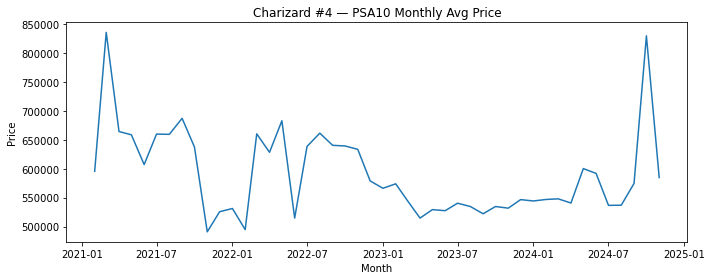

In [15]:

def plot_card(monthly_df, card, grade='PSA10'):
    sub = monthly_df[(monthly_df['card']==card) & (monthly_df['grade']==grade)].sort_values('year_month')
    if sub.empty:
        print(f"No data for {card} / {grade}")
        return
    plt.figure(figsize=(10,4))
    plt.plot(sub['year_month'], sub['price'])
    plt.title(f"{card} — {grade} Monthly Avg Price")
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

#you can change the card name to one you care about:
plot_card(monthly_ts, 'Charizard #4', 'PSA10')


In [16]:

#Export Cleaned Artifacts
monthly_ts.to_csv("clean_monthly_time_series.csv", index=False)
metrics.to_csv("card_metrics_cagr_volatility.csv", index=False)

#Save top tables for convenience
top_cagr.to_csv("top20_cagr.csv", index=False)
top_risk_adj.to_csv("top20_risk_adjusted.csv", index=False)

print("Saved:")
print("clean_monthly_time_series.csv")
print("card_metrics_cagr_volatility.csv")
print("top20_cagr.csv")
print("top20_risk_adjusted.csv")


Saved:
clean_monthly_time_series.csv
card_metrics_cagr_volatility.csv
top20_cagr.csv
top20_risk_adjusted.csv
